# PROJET: SCORING D'UN CLIENT POUR L'OCTROI D'UN CREDIT

In [47]:
import numpy as np 
import pandas as pd  
from scipy.stats import normaltest
import matplotlib.pyplot as plt 
%matplotlib inline
import scipy.stats as stats
import pandas as pd
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import pickle
import sklearn
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve, auc, adjusted_rand_score
from sklearn.preprocessing import LabelEncoder


## Bank of Germany

## PARTIE1: Feature Engineering

In [48]:
german_Bank = pd.read_csv("german.data",sep="\s+", header=None)


In [49]:
german_Bank.head(2)

0   1    2    3     4    5    6   7    8     9   ...    11  12    13  \
0  A11   6  A34  A43  1169  A65  A75   4  A93  A101  ...  A121  67  A143   
1  A12  48  A32  A43  5951  A61  A73   2  A92  A101  ...  A121  22  A143   

     14 15    16 17    18    19 20  
0  A152  2  A173  1  A192  A201  1  
1  A152  1  A173  1  A191  A201  2  

[2 rows x 21 columns]

In [50]:
#On va nommer les colonnes

In [51]:

Ne= ['Status','Duration','credit_history','Purpose','Credit_amount','Saving_account','YOJ','Installment_percentage','Status_SEX','debtors_guarantors','Present_residence','Property','Age_years','installment_plans','Housing','existing_credits','Job','people_maintenance','Telephone','Foreign_warker','Cost']

german_Bank = pd.read_table("german.data",sep=" ", header=None, names=Ne)
german_Bank .head()

/home/autonome/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: read_table is deprecated, use read_csv instead.
  This is separate from the ipykernel package so we can avoid doing imports until


Status  Duration credit_history Purpose  Credit_amount Saving_account  YOJ  \
0    A11         6            A34     A43           1169            A65  A75   
1    A12        48            A32     A43           5951            A61  A73   
2    A14        12            A34     A46           2096            A61  A74   
3    A11        42            A32     A42           7882            A61  A74   
4    A11        24            A33     A40           4870            A61  A73   

   Installment_percentage Status_SEX debtors_guarantors  ...  Property  \
0                       4        A93               A101  ...      A121   
1                       2        A92               A101  ...      A121   
2                       2        A93               A101  ...      A121   
3                       2        A93               A103  ...      A122   
4                       3        A93               A101  ...      A124   

  Age_years  installment_plans Housing existing_credits   Job  \
0        67               A143    A152                2  A173   
1        22               A143    A152                1  A173   
2        49               A143    A152                1  A172   
3        45               A143    A153                1  A173   
4        53               A143    A153                2  A173   

  people_maintenance  Telephone Foreign_warker Cost  
0                  1       A192           A201    1  
1                  1       A191           A201    2  
2                  2       A191           A201    1  
3                  2       A191           A201    1  
4                  2       A191           A201    2  

[5 rows x 21 columns]

In [52]:
german_Bank.isna().sum()
#On remarque que german_Bank ne contient aucune valeur manquante

Status                    0
Duration                  0
credit_history            0
Purpose                   0
Credit_amount             0
Saving_account            0
YOJ                       0
Installment_percentage    0
Status_SEX                0
debtors_guarantors        0
Present_residence         0
Property                  0
Age_years                 0
installment_plans         0
Housing                   0
existing_credits          0
Job                       0
people_maintenance        0
Telephone                 0
Foreign_warker            0
Cost                      0
dtype: int64

In [53]:
german_Bank.columns.unique()

Index(['Status', 'Duration', 'credit_history', 'Purpose', 'Credit_amount',
       'Saving_account', 'YOJ', 'Installment_percentage', 'Status_SEX',
       'debtors_guarantors', 'Present_residence', 'Property', 'Age_years',
       'installment_plans', 'Housing', 'existing_credits', 'Job',
       'people_maintenance', 'Telephone', 'Foreign_warker', 'Cost'],
      dtype='object')

In [54]:
dataNumeric = pd.read_csv("german.data-numeric",sep= "\s+",header=None)
dataNumeric.head()

0   1   2   3   4   5   6   7   8   9   ...  15  16  17  18  19  20  21  \
0   1   6   4  12   5   5   3   4   1  67  ...   0   0   1   0   0   1   0   
1   2  48   2  60   1   3   2   2   1  22  ...   0   0   1   0   0   1   0   
2   4  12   4  21   1   4   3   3   1  49  ...   0   0   1   0   0   1   0   
3   1  42   2  79   1   4   3   4   2  45  ...   0   0   0   0   0   0   0   
4   1  24   3  49   1   3   3   4   4  53  ...   1   0   1   0   0   0   0   

   22  23  24  
0   0   1   1  
1   0   1   2  
2   1   0   1  
3   0   1   1  
4   0   1   2  

[5 rows x 25 columns]

In [55]:
#Il faut qu'on fasse le OneHotEncoding pour rendre notre Dataset GermanBank1 numerique

In [79]:
# Pour la banque de German il n y a pas de données manquantes Donc on va faire directement l'encodage des variables qualitatifs(One Hot Encoder)
german_Bank_1=german_Bank
# one hot encoding
df1 = pd.get_dummies(german_Bank_1.Status)
df1.rename(columns = {'A11':'Status_A11','A12':'Status_A12','A13':'Status_A13','A14':'Status_A14'}, inplace = True)
df2 = pd.get_dummies(german_Bank_1.credit_history)
df2.rename(columns = {'A30':'CredHist_A30','A31':'CredHist_A31','A32':'CredHist_A32','A33':'CredHist_A33','A34':'CredHist_A34'}, inplace = True)
df3 = pd.get_dummies(german_Bank_1.Purpose)
df3.rename(columns = {'A40':'Purpose_A40','A41':'Purpose_A41','A42':'Purpose_A42','A43':'Purpose_A43','A44':'Purpose_A44','A45':'Purpose_A45','A46':'Purpose_A46','A47':'Purpose_A47','A48':'Purpose_A48','A49':'Purpose_A49','A410':'Purpose_A410'}, inplace = True)
df4 = pd.get_dummies(german_Bank_1.Saving_account)
df4.rename(columns = {'A61':'SaveAccount_A61','A62':'SaveAccount_A62','A63':'SaveAccount_A63','A64':'SaveAccount_A64','A65':'SaveAccount_A65'}, inplace = True)
df5 = pd.get_dummies(german_Bank_1.YOJ)
df5.rename(columns = {'A71':'YOJ_A71','A72':'YOJ_A72','A73':'YOJ_A73','A74':'YOJ_A74','A75':'YOJ_A75'}, inplace = True)
df6 = pd.get_dummies(german_Bank_1.Status_SEX)
df6.rename(columns = {'A91':'Status&Sex_A91','A92':'Status&Sex_A92','A93':'Status&Sex_A93','A94':'Status&Sex_A94','A95':'Status&Sex_A95'}, inplace = True)
df7 = pd.get_dummies(german_Bank_1.debtors_guarantors)
df7.rename(columns = {'A101':'DebGuarant_A101','A102':'DebGuarant_A102','A103':'DebGuarant_A103'}, inplace = True)
df9 = pd.get_dummies(german_Bank_1.Property)
df9.rename(columns = {'A121':'Property_A121','A122':'Property_A122','A123':'Property_A123','A124':'Property_A124'}, inplace = True)
df10 = pd.get_dummies(german_Bank_1.installment_plans)
df10.rename(columns = {'A141':'InstallPlan_A141','A142':'InstallPlan_A142','A143':'InstallPlan_A143'}, inplace = True)
df11 = pd.get_dummies(german_Bank_1.Housing)
df11.rename(columns = {'A151':'Housing_A151','A152':'Housing_A152','A153':'Housing_A153'}, inplace = True)
df12 = pd.get_dummies(german_Bank_1.Job)
df12.rename(columns = {'A171':'Job_A171','A172':'Job_A172','A173':'Job_A173','A174':'Job_A174'}, inplace = True)
df13 = pd.get_dummies(german_Bank_1.Telephone)
df13.rename(columns = {'A191':'Tel_None','A192':'Tel_Registred'}, inplace = True)
df14 = pd.get_dummies(german_Bank_1.Foreign_warker)
df14.rename(columns = {'A201':'ForeignWorker_Yes','A202':'ForeignWorker_No'}, inplace = True)

german_Bank_1 = pd.concat([german_Bank_1,df1,df2,df3,df4,df5,df6,df7,df9,df10,df11,df12,df13,df14], axis = 1)
german_Bank_1.drop(labels=['Status','credit_history','Purpose','Saving_account','YOJ','Status_SEX','debtors_guarantors','Property','installment_plans','Housing','Job','Telephone','Foreign_warker'], axis =1, inplace = True)

# Mettre la column cible dans un vecteur à part et la supprimer de la dataframe
german_Bank_Final=german_Bank_1.drop(labels=['Cost'], axis =1)

# DataFrame surlaquelle on va appliquer nos algorithmes:
german_Bank_Final.head(2)

Duration  Credit_amount  Installment_percentage  Present_residence  \
0         6           1169                       4                  4   
1        48           5951                       2                  2   

   Age_years  existing_credits  people_maintenance  Status_A11  Status_A12  \
0         67                 2                   1           1           0   
1         22                 1                   1           0           1   

   Status_A13  ...  Housing_A152  Housing_A153  Job_A171  Job_A172  Job_A173  \
0           0  ...             1             0         0         0         1   
1           0  ...             1             0         0         0         1   

   Job_A174  Tel_None  Tel_Registred  ForeignWorker_Yes  ForeignWorker_No  
0         0         0              1                  1                 0  
1         0         1              0                  1                 0  

[2 rows x 61 columns]

In [80]:
german_Bank_1.head()

Duration  Credit_amount  Installment_percentage  Present_residence  \
0         6           1169                       4                  4   
1        48           5951                       2                  2   
2        12           2096                       2                  3   
3        42           7882                       2                  4   
4        24           4870                       3                  4   

   Age_years  existing_credits  people_maintenance  Cost  Status_A11  \
0         67                 2                   1     1           1   
1         22                 1                   1     2           0   
2         49                 1                   2     1           0   
3         45                 1                   2     1           1   
4         53                 2                   2     2           1   

   Status_A12  ...  Housing_A152  Housing_A153  Job_A171  Job_A172  Job_A173  \
0           0  ...             1             0         0         0         1   
1           1  ...             1             0         0         0         1   
2           0  ...             1             0         0         1         0   
3           0  ...             0             1         0         0         1   
4           0  ...             0             1         0         0         1   

   Job_A174  Tel_None  Tel_Registred  ForeignWorker_Yes  ForeignWorker_No  
0         0         0              1                  1                 0  
1         0         1              0                  1                 0  
2         0         1              0                  1                 0  
3         0         1              0                  1                 0  
4         0         1              0                  1                 0  

[5 rows x 62 columns]

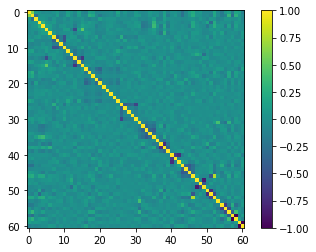

In [81]:
plt.imshow(german_Bank_Final.corr())
plt.colorbar()

In [59]:
#On remarque que la matrice de correlation est symetrique (le diagonale est parfaitement correle(couleur jaune)et les autres pas tres correlees(couleur vert))

In [82]:
#1:good, 2:bad (selon cost matrix)
#converting (1,2) to (0,1) in the columns for easier analysis. 
german_Bank_1.loc[(german_Bank_1['Cost'] == 1)] = 0
german_Bank_1.loc[(german_Bank_1['Cost'] == 2)] = 1
cible_german=german_Bank_1["Cost"]
german_Bank_1.head()

Duration  Credit_amount  Installment_percentage  Present_residence  \
0         0              0                       0                  0   
1         1              1                       1                  1   
2         0              0                       0                  0   
3         0              0                       0                  0   
4         1              1                       1                  1   

   Age_years  existing_credits  people_maintenance  Cost  Status_A11  \
0          0                 0                   0     0           0   
1          1                 1                   1     1           1   
2          0                 0                   0     0           0   
3          0                 0                   0     0           0   
4          1                 1                   1     1           1   

   Status_A12  ...  Housing_A152  Housing_A153  Job_A171  Job_A172  Job_A173  \
0           0  ...             0             0         0         0         0   
1           1  ...             1             1         1         1         1   
2           0  ...             0             0         0         0         0   
3           0  ...             0             0         0         0         0   
4           1  ...             1             1         1         1         1   

   Job_A174  Tel_None  Tel_Registred  ForeignWorker_Yes  ForeignWorker_No  
0         0         0              0                  0                 0  
1         1         1              1                  1                 1  
2         0         0              0                  0                 0  
3         0         0              0                  0                 0  
4         1         1              1                  1                 1  

[5 rows x 62 columns]

## Feature selection

In [87]:
#On va verifier l'hypothese de normalite entre les variables
german_Bank_1.head()

Duration  Credit_amount  Installment_percentage  Present_residence  \
0         0              0                       0                  0   
1         1              1                       1                  1   
2         0              0                       0                  0   
3         0              0                       0                  0   
4         1              1                       1                  1   

   Age_years  existing_credits  people_maintenance  Cost  Status_A11  \
0          0                 0                   0     0           0   
1          1                 1                   1     1           1   
2          0                 0                   0     0           0   
3          0                 0                   0     0           0   
4          1                 1                   1     1           1   

   Status_A12  ...  Housing_A152  Housing_A153  Job_A171  Job_A172  Job_A173  \
0           0  ...             0             0         0         0         0   
1           1  ...             1             1         1         1         1   
2           0  ...             0             0         0         0         0   
3           0  ...             0             0         0         0         0   
4           1  ...             1             1         1         1         1   

   Job_A174  Tel_None  Tel_Registred  ForeignWorker_Yes  ForeignWorker_No  
0         0         0              0                  0                 0  
1         1         1              1                  1                 1  
2         0         0              0                  0                 0  
3         0         0              0                  0                 0  
4         1         1              1                  1                 1  

[5 rows x 62 columns]

In [88]:
def testDeNormalite (x):
    a = german_Bank_1[x]
    stat, p = normaltest(a)
    print('stat=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        print('Probably Gaussian')
    else:
        print('Probably not Gaussian')

In [94]:
def normalitesDesColonnes():
    for i in german_Bank_1:
        testDeNormalite(i)
        print(i)
        print("__")
# normalitesDesColonnes()

In [74]:
#On remarque apres l'execution de la fct normalitesDesColonnes() ne suivent pas la loi normal
#Donc on passe au test de kendal

In [95]:
from scipy.stats import kendalltau
def testKendal (x1,x2):
    stat, p = kendalltau(x1, x2)
    print('stat=%.3f, p=%.3f' % (stat, p))
    if p > 0.005:
        print('Probably independent')
        return False
    else:
        print('Probably dependent')
        return True

In [97]:
#dimension
print(dataNumeric.shape) # (18, 6)
#nombre d'observations
n = dataNumeric.shape[0]
#nombre de variables
p = dataNumeric.shape[1]
#affichage des données

(1000, 25)


In [67]:
a = list(range(1, 10))
k =list(range(2,8)) 
a=[x for x in a if x not in k]
print(a)

[1, 8, 9]


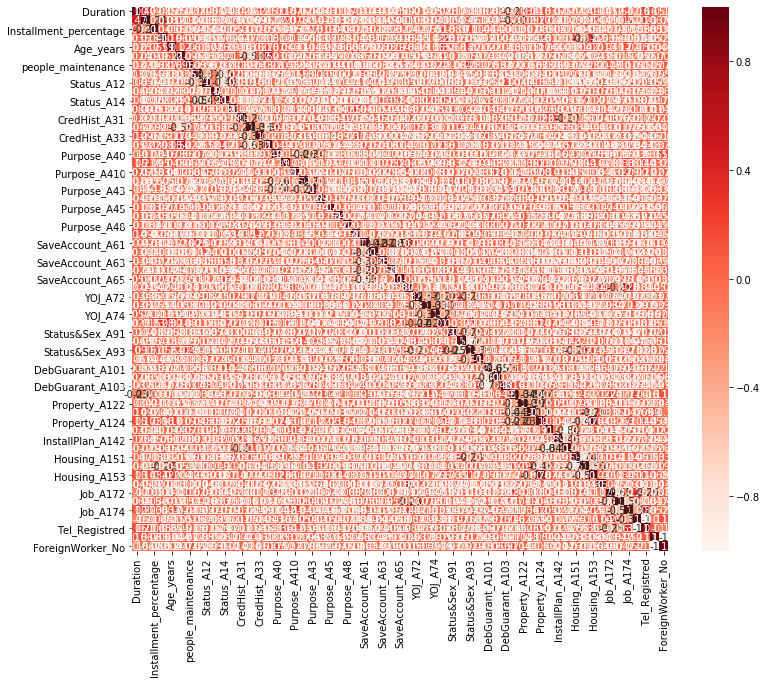

In [68]:
import seaborn as sns 
#Using Kendall Correlation (Matrice de correlation)
plt.figure(figsize=(12,10))
cor = german_Bank_Final.corr(method='kendall')
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [98]:
#Autre methode pour le calcul:On va tester la correlation entre les variables

In [101]:
for i in  range (german_Bank.shape[1]):
    for j in range (i+1 , german_Bank_Final.shape[1] ):
        corl = german_Bank_Final.iloc[:,i].corr(german_Bank_Final.iloc[:,j],method='kendall')
        if (corl >= 0.8):
            print(i)
            print(j)
            print(corl)

In [102]:
#ici la fct n'a rien donne donc les variables ne sont pas bien correlees entre elles

#### Rescaling

In [103]:
#classe pour standardisation
from sklearn.preprocessing import StandardScaler
#instanciation
sc = StandardScaler()
#transformation – centrage-réduction
Z = sc.fit_transform(dataNumeric)
print(Z)

[[-1.25456565 -1.23647786  1.34401408 ... -0.5         0.76635604
  -0.65465367]
 [-0.45902624  2.24819436 -0.50342796 ... -0.5         0.76635604
   1.52752523]
 [ 1.13205258 -0.73866754  1.34401408 ...  2.         -1.30487651
  -0.65465367]
 ...
 [ 1.13205258 -0.73866754 -0.50342796 ... -0.5         0.76635604
  -0.65465367]
 [-1.25456565  1.9992892  -0.50342796 ... -0.5         0.76635604
   1.52752523]
 [-0.45902624  1.9992892   1.34401408 ... -0.5         0.76635604
  -0.65465367]]


## Methode de ML Non Supervise (Descriptif):

### ACP (Analyse factorielle en composante principale)

In [104]:
#classe pour l'ACP
from sklearn.decomposition import PCA
#instanciation
acp = PCA(svd_solver='full')

In [105]:
#calculs
coord = acp.fit_transform(Z)
#nombre de composantes calculées
print(acp.n_components_)

25


In [106]:
#variance expliquée
print(acp.explained_variance_)

[2.55086882 2.2794142  1.85609381 1.73878409 1.65597403 1.35967065
 1.32117507 1.16783397 1.12509243 1.0145831  0.95244228 0.89273795
 0.86576642 0.8290517  0.79157939 0.70906166 0.64878089 0.60800583
 0.60365826 0.55903409 0.48935941 0.34073838 0.30661755 0.19987003
 0.158831  ]


In [107]:
#matrice de covariance
np.cov(coord)

array([[ 1.08458003, -0.38276844,  0.09255652, ...,  0.07751298,
        -0.2451111 , -0.27057592],
       [-0.38276844,  0.69407402, -0.25505863, ..., -0.11785188,
         0.26394998,  0.13884981],
       [ 0.09255652, -0.25505863,  0.81774994, ...,  0.07442749,
        -0.43835625, -0.30222231],
       ...,
       [ 0.07751298, -0.11785188,  0.07442749, ...,  0.44510693,
        -0.0230253 , -0.09666048],
       [-0.2451111 ,  0.26394998, -0.43835625, ..., -0.0230253 ,
         0.85479459,  0.24072663],
       [-0.27057592,  0.13884981, -0.30222231, ..., -0.09666048,
         0.24072663,  0.83190682]])

In [108]:
#rapport de varianvce
acp.explained_variance_ratio_

array([0.10193272, 0.09108539, 0.07416951, 0.06948181, 0.06617272,
       0.05433244, 0.05279416, 0.04666665, 0.04495869, 0.04054274,
       0.03805959, 0.03567381, 0.03459603, 0.03312891, 0.03163151,
       0.0283341 , 0.02592528, 0.02429591, 0.02412218, 0.022339  ,
       0.0195548 , 0.01361591, 0.01225244, 0.00798681, 0.00634689])

In [109]:
#valeur corrigée
eigval = (n-1)/n*acp.explained_variance_
print(eigval)

[2.54831795 2.27713479 1.85423772 1.7370453  1.65431806 1.35831098
 1.3198539  1.16666613 1.12396733 1.01356852 0.95148983 0.89184521
 0.86490066 0.82822265 0.79078781 0.7083526  0.64813211 0.60739783
 0.60305461 0.55847506 0.48887005 0.34039764 0.30631093 0.19967016
 0.15867217]


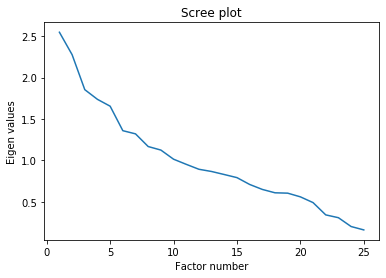

In [110]:
#scree plot
plt.plot(np.arange(1,p+1),eigval)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()

<BarContainer object of 25 artists>

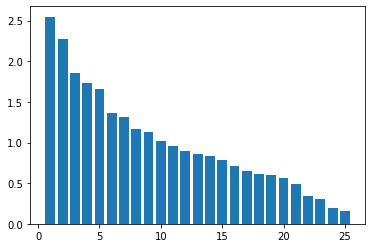

In [34]:
#Diagramme en baton des valeurs propres
plt.bar(np.arange(1,p+1),eigval)

In [35]:
#On remarque qu'il existe une casure au niveau de 3
#Donc on choisit que les deux premieres dimension (car seuls significatives)

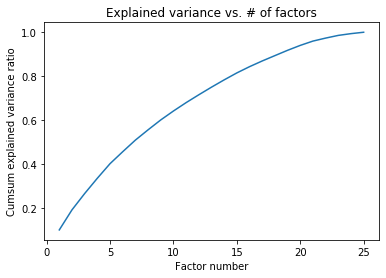

In [36]:
#cumul de variance expliquée
plt.plot(np.arange(1,p+1),np.cumsum(acp.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()


In [37]:
#La variance expliquée est une mesure du lien entre le facteur X et la mesure numérique Y ,
#pour apprécier comment Y dépend du fait d'appartenir à une sous-population ou à une autre

##### Test des « bâtons brisés » de Frontier (1976) et
Legendre-Legendre (1983) : si l’inertie était répartie
aléatoirement sur les axes, la distribution des v.p.
suivrait la loi des « bâtons brisés ».

In [38]:
#test des bâtons brisés
print(pd.DataFrame({'Val.Propre':eigval}))

    Val.Propre
0     2.548318
1     2.277135
2     1.854238
3     1.737045
4     1.654318
5     1.358311
6     1.319854
7     1.166666
8     1.123967
9     1.013569
10    0.951490
11    0.891845
12    0.864901
13    0.828223
14    0.790788
15    0.708353
16    0.648132
17    0.607398
18    0.603055
19    0.558475
20    0.488870
21    0.340398
22    0.306311
23    0.199670
24    0.158672


# Interprétation des dimensions  

In [39]:
# Selon les résultas obtenus dans Scree plot, cumul de variance expliquée et les valeurs propres 
# on a 10 dimensions PCA selon le critére de Kaiser (Eigenvalue > 1)

In [111]:
#contributions a la construction des  axes   
ctr = coord**2 
for j in range(p):    
    ctr[:,j] = ctr[:,j]/(n*eigval[j])     
print(pd.DataFrame({'id':dataNumeric.index,'CTR_1':ctr[:,0],'CTR_2':ctr[:,1]})) 

      id         CTR_1         CTR_2
0      0  1.707520e-04  3.876826e-03
1      1  2.260839e-04  9.726348e-04
2      2  2.574943e-03  9.254031e-04
3      3  1.065375e-03  3.149846e-04
4      4  9.039741e-04  1.979933e-05
5      5  1.695658e-03  2.945541e-04
6      6  9.511301e-07  1.288628e-03
7      7  3.404887e-03  3.832072e-04
8      8  1.165534e-03  4.737557e-04
9      9  8.681786e-06  1.639776e-04
10    10  1.698595e-06  4.618916e-03
11    11  1.879612e-03  4.447025e-03
12    12  5.279129e-05  8.174418e-05
13    13  3.362491e-04  2.121065e-04
14    14  7.404331e-05  2.158975e-03
15    15  3.169815e-04  1.261871e-03
16    16  1.809729e-05  4.178151e-03
17    17  7.572349e-04  9.059532e-06
18    18  6.343852e-03  1.422439e-05
19    19  9.403135e-05  1.192347e-03
20    20  8.586894e-05  3.019814e-03
21    21  5.464184e-05  5.616917e-04
22    22  3.093337e-03  7.242311e-04
23    23  6.398909e-06  5.318154e-04
24    24  1.575665e-03  1.046573e-03
25    25  1.620312e-03  1.667969e-04
2

In [112]:
#racine carrée des valeurs propres 
sqrt_eigval = np.sqrt(eigval)
#corrélation des variables avec les axes 
corvar = np.zeros((p,p)) 
 
for k in range(p):    
    corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]      
#afficher la matrice des corrélations variables x facteurs    
corvar;

In [113]:
X = german_Bank_1
y = german_Bank['Cost']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2)

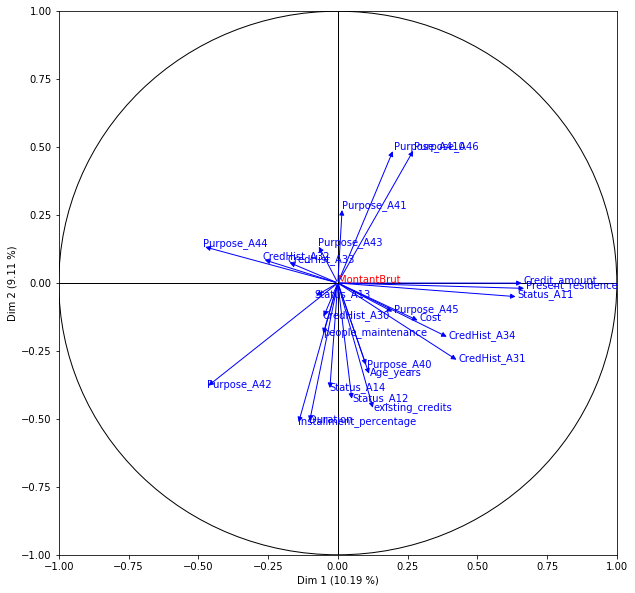

In [114]:
#cercle des corrélations de premier plan
fig, axes = plt.subplots(figsize=(10,10))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
#affichage des variables actives
for j in range(p):
    plt.annotate(X.columns[j],(corvar[j,0],corvar[j,1]),color='blue')
    plt.annotate("",
              xy=(0, 0), xycoords='data',
              xytext=(corvar[j,0],corvar[j,1]), textcoords='data',
              arrowprops=dict(color='blue',arrowstyle='<|-',
                              connectionstyle="arc3,rad=0."), 
              )
#affiche des variables illustratives (y)
plt.annotate('MontantBrut',(corSupp[0,0],corSupp[0,1]),color='red')
plt.annotate("",
              xy=(0, 0), xycoords='data',
              xytext=(corSupp[0,0],corSupp[0,1]), textcoords='data',
              arrowprops=dict(color='red',arrowstyle='<|-',
                              connectionstyle="arc3,rad=0."), 
              )
#ajouter les axes
plt.plot([-1,1],[0,0],color='black',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='black',linestyle='-',linewidth=1)
#ajouter un cercle
cercle = plt.Circle((0,0),1,color='black',fill=False)
axes.add_artist(cercle)
#affichage
plt.xlabel("Dim 1 (%0.2f %%)"% (acp.explained_variance_ratio_[0]*100))
plt.ylabel("Dim 2 (%0.2f %%)"% (acp.explained_variance_ratio_[1]*100))
plt.show()

In [115]:
#on affiche pour les deux premiers axes 
print(pd.DataFrame({'id':dataNumeric.columns,'COR_1':corvar[:,0],'COR_2':corvar[:,1],'COR_3':corvar[:,2],'COR_4':corvar[:,3],'COR_5':corvar[:,4]}))

    id     COR_1     COR_2     COR_3     COR_4     COR_5
0    0 -0.102424 -0.515444 -0.120934 -0.194591  0.044344
1    1  0.666387 -0.000475 -0.122386  0.376370 -0.043387
2    2 -0.142237 -0.519018  0.156681 -0.075525  0.252564
3    3  0.674817 -0.019942  0.022462  0.409111 -0.033382
4    4  0.114097 -0.340612  0.029397 -0.166758 -0.001569
5    5  0.127326 -0.466124  0.203516 -0.088547  0.205080
6    6 -0.054206 -0.192640  0.052167  0.142438  0.146398
7    7  0.292419 -0.140557  0.499568 -0.281722  0.126562
8    8  0.644444 -0.050629  0.072665  0.083194 -0.060848
9    9  0.050752 -0.433078  0.437700  0.144310  0.041336
10  10 -0.084361 -0.050277 -0.139450 -0.277642  0.078491
11  11 -0.029075 -0.393899  0.255821  0.053734  0.198803
12  12 -0.053460 -0.129765  0.376078  0.180512 -0.036711
13  13  0.431207 -0.286242  0.023238  0.120191 -0.000935
14  14 -0.268228  0.086866  0.152919  0.028643  0.189075
15  15 -0.179120  0.077673  0.258849  0.098196 -0.020009
16  16  0.396879 -0.200865  0.0

In [116]:
##### print(pd.DataFrame({'id':dataNumeric.columns,'COR_6':corvar[:,0],'COR_7':corvar[:,1],'COR_8':corvar[:,2],'COR_9':corvar[:,3],'COR_10':corvar[:,4]}))

In [117]:
german_Bank_Final.head();

In [118]:
X_bad = dataNumeric.iloc[:,0:-1]
X_bad.head()

0   1   2   3   4   5   6   7   8   9   ...  14  15  16  17  18  19  20  \
0   1   6   4  12   5   5   3   4   1  67  ...   1   0   0   1   0   0   1   
1   2  48   2  60   1   3   2   2   1  22  ...   1   0   0   1   0   0   1   
2   4  12   4  21   1   4   3   3   1  49  ...   1   0   0   1   0   0   1   
3   1  42   2  79   1   4   3   4   2  45  ...   1   0   0   0   0   0   0   
4   1  24   3  49   1   3   3   4   4  53  ...   1   1   0   1   0   0   0   

   21  22  23  
0   0   0   1  
1   0   0   1  
2   0   1   0  
3   0   0   1  
4   0   0   1  

[5 rows x 24 columns]

## Methode de ML supervisee (Predictif)

### Modéle KNN pour la DataFrame 'dataNumeric' (K-nearest Neighbors )

In [119]:
Y_bad= pd.factorize(german_Bank_1["Cost"])[0]

Text(0, 0.5, 'Erreur')

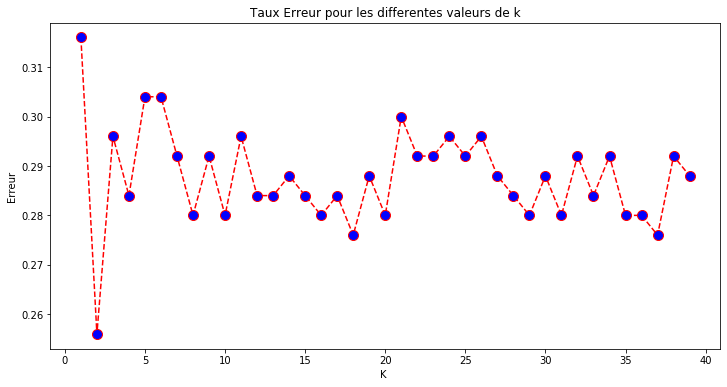

In [120]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_bad, Y_bad, random_state=0)
scaler = MinMaxScaler()
X_train1 = scaler.fit_transform(X_train1)
X_test1 = scaler.fit_transform(X_test1)

error = []
# Calculer l'erreur pour k entre 1 et 40 
#Pour chaque itération, l'erreur moyenne pour les valeurs prédites 
#de l'ensemble de test est calculée et sauvegardée ds la liste Erreur.
for i in range(1, 40):
    knn = KNeighborsClassifier(i)
    knn_model = knn.fit(X_train1, y_train1)
    pred_i = knn_model.predict(X_test1)
    error.append(np.mean(pred_i != y_test1))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Taux Erreur pour les differentes valeurs de k')
plt.xlabel('K ')
plt.ylabel('Erreur')

In [121]:
#On remarque que koptimal=2 qui correspond a la valeur qui a le moins taux d'erreurs minimal

In [122]:
#On va essayer avec la distance metric=Manhattan

In [123]:
knn = KNeighborsClassifier(2,metric='manhattan')
knn_model = knn.fit(X_train1, y_train1)
y_pred_knn = knn_model.predict(X_test1)

In [124]:
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train1, y_train1)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test1, y_test1)))

Accuracy of K-NN classifier on training set: 0.83
Accuracy of K-NN classifier on test set: 0.74


In [125]:
#It seems, there is a high accuracy 74% from testing set of our predictions are correct

## Methode de ML supervisee (Predictif)

### Modele CART (Classification And Regression Trees)

In [126]:
# CART
dtc = DecisionTreeClassifier()
dtc_model = dtc.fit(X_train1, y_train1)
y_pred_dtc = dtc_model.predict(X_test1)
print('Accuracy of CART classifier on training set: {:.2f}'
     .format(dtc.score(X_train1, y_train1)))
print('Accuracy of CART classifier on test set: {:.2f}'
     .format(dtc.score(X_test1, y_test1)))

Accuracy of CART classifier on training set: 1.00
Accuracy of CART classifier on test set: 0.65


In [127]:
#It seems, there is a high accuracy 68% from testing set of our predictions are correct

### EXPLOITER LES RESULTATS DE PCA DANS L'INPUT DU MODELE KNN (NOMBRE DE DIMENSION OPTIMAL=2)

In [128]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_bad)


Text(0, 0.5, 'Erreur')

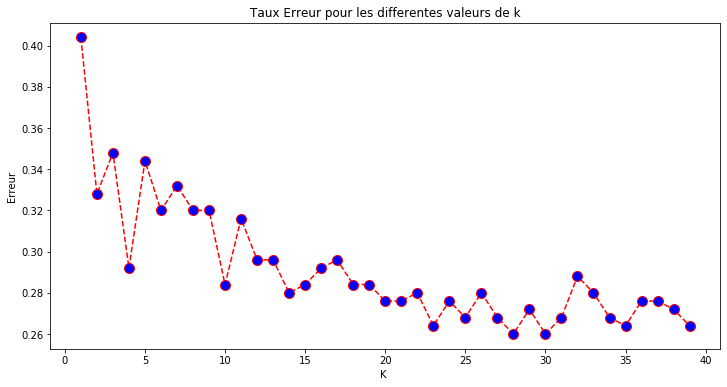

In [129]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(principalComponents, Y_bad, random_state=0)
scaler = MinMaxScaler()
X_train2 = scaler.fit_transform(X_train2)
X_test2 = scaler.fit_transform(X_test2)

error = []
# Calculer l'erreur pour k entre 1 et 40 
#Pour chaque itération, l'erreur moyenne pour les valeurs prédites 
#de l'ensemble de test est calculée et sauvegardée ds la liste Erreur.
for i in range(1, 40):
    knn = KNeighborsClassifier(i)
    knn_model = knn.fit(X_train2, y_train2)
    pred_i = knn_model.predict(X_test2)
    error.append(np.mean(pred_i != y_test2))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Taux Erreur pour les differentes valeurs de k')
plt.xlabel('K ')
plt.ylabel('Erreur')

In [130]:
#On remarque que koptimal=28 qui correspond a la valeur qui a le moins taux d'erreurs minimal

In [131]:
knn = KNeighborsClassifier(28,metric='manhattan')
knn_model = knn.fit(X_train2, y_train2)
y_pred_knn = knn_model.predict(X_test2)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train2, y_train2)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test2, y_test2)))

Accuracy of K-NN classifier on training set: 0.70
Accuracy of K-NN classifier on test set: 0.71


In [132]:
#It seems, there is a high accuracy 71% from testing set of our predictions are correct

### EXPLOITER LES RESULTATS DE PCA DANS L'INPUT DU MODELE KNN (NOMBRE DE DIMENSION OPTIMAL=8)

In [133]:
def pca_n_accuracy_knn(n):
    pca = PCA(n_components=n)
    principalComponents = pca.fit_transform(X_bad)

    X_train, X_test, y_train, y_test = train_test_split(principalComponents, Y_bad, random_state=0)
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)

    knn = KNeighborsClassifier(2,metric='manhattan')
    knn_model = knn.fit(X_train, y_train)
    y_pred_knn = knn_model.predict(X_test)
#     print('Accuracy of K-NN classifier on training set: {:.2f}'
#          .format(knn.score(X_train, y_train)))
#     print('Accuracy of K-NN classifier on test set: {:.2f}'
#          .format(knn.score(X_test, y_test)))
    return (knn.score(X_test, y_test))

In [134]:
accuracy = 0
nb_components = 0
for i in range (1,X_bad.shape[1]):
    acc = pca_n_accuracy_knn(i)
    if acc > accuracy :
        accuracy = acc 
        nb_components = i
print(accuracy)
print(nb_components)

0.756
8


In [135]:
#On remarque le meilleur nb de comp avec PCA pour appliquer le KNN Nous donne en fin 8 components , avec 0.756 accuracy

In [136]:
#It seems, there is a high accuracy 75% from testing set of our predictions are correct

### EXPLOITER LES RESULTATS DE PCA DANS L'INPUT DU MODELE CART (NOMBRE DE DIMENSION OPTIMAL=9)

In [137]:
# CART
dtc = DecisionTreeClassifier()
dtc_model = dtc.fit(X_train2, y_train2)
y_pred_dtc = dtc_model.predict(X_test2)
print('Accuracy of CART classifier on training set: {:.2f}'
     .format(dtc.score(X_train2, y_train2)))
print('Accuracy of CART classifier on test set: {:.2f}'
     .format(dtc.score(X_test2, y_test2)))

Accuracy of CART classifier on training set: 1.00
Accuracy of CART classifier on test set: 0.57


In [138]:
def pca_n_accuracy_cart(n):
    pca = PCA(n_components=n)
    principalComponents = pca.fit_transform(X_bad)

    X_train, X_test, y_train, y_test = train_test_split(principalComponents, Y_bad, random_state=0)
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)

    dtc = DecisionTreeClassifier()
    dtc_model = dtc.fit(X_train, y_train)
    y_pred_dtc = dtc_model.predict(X_test)
#     print('Accuracy of K-NN classifier on training set: {:.2f}'
#          .format(knn.score(X_train, y_train)))
#     print('Accuracy of K-NN classifier on test set: {:.2f}'
#          .format(knn.score(X_test, y_test)))
    return (dtc.score(X_test, y_test))

In [139]:
accuracy = 0
nb_components = 0
for i in range (1,X_bad.shape[1]):
    acc = pca_n_accuracy_cart(i)
    if acc > accuracy :
        accuracy = acc 
        nb_components = i
print(accuracy)
print(nb_components)


0.676
9


In [140]:
# on test le meilleur nb de comp avec PCA pour appliquer la CART Nous donne en fin 9 components , avec 0.668 accuracy

In [141]:
#It seems, there is a high accuracy 67% from testing set of our predictions are correct

### EXPLOITER LES RESULTATS DE PCA DANS L'INPUT DU MODELE RandomForest (NOMBRE DE DIMENSION OPTIMAL=6)

In [142]:
def pca_n_accuracy_rfc(n):
    pca = PCA(n_components=n)
    principalComponents = pca.fit_transform(X_bad)

    X_train, X_test, y_train, y_test = train_test_split(principalComponents, Y_bad, random_state=0)
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)

    rfc = RandomForestClassifier()
    rfc_model = rfc.fit(X_train, y_train)
    y_pred_rfc = rfc_model.predict(X_test)
#     print('Accuracy of K-NN classifier on training set: {:.2f}'
#          .format(knn.score(X_train, y_train)))
#     print('Accuracy of K-NN classifier on test set: {:.2f}'
#          .format(knn.score(X_test, y_test)))
    return (rfc.score(X_test, y_test))

In [147]:
accuracy = 0
nb_components = 0
for i in range (1,X_bad.shape[1]):
    acc = pca_n_accuracy_rfc(i)
    if acc > accuracy :
        accuracy = acc 
        nb_components = i
print(accuracy)
print(nb_components)


/home/autonome/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/autonome/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/autonome/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/autonome/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/autonome/anaconda3/lib/python3

0.768
15


/home/autonome/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/autonome/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/autonome/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/autonome/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [148]:
# on test le meilleur nb de comp avec PCA pour appliquer le FRC Nous donne en fin 12 components , avec 0.748 accuracy

In [149]:
#It seems, there is a high accuracy 75% from testing set of our predictions are correct

#### kernel principal component analysis (kernel PCA) [1] is an extension of principal component analysis (PCA) using techniques of kernel methods. 

## on va essayer avec PCA KERNEL

In [150]:
from sklearn.decomposition import KernelPCA

transformer = KernelPCA(n_components=7, kernel='rbf')
X_transformed = transformer.fit_transform(X_bad)
X_transformed.shape

(1000, 7)

In [151]:
def pcaKernel_n_accuracy_knn(n):
    transformer = KernelPCA(n_components=n, kernel='rbf')
    X_transformed = transformer.fit_transform(X_bad)


    X_train, X_test, y_train, y_test = train_test_split(X_transformed, Y_bad, random_state=0)
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)

    knn = KNeighborsClassifier(2,metric='manhattan')
    knn_model = knn.fit(X_train, y_train)
    y_pred_knn = knn_model.predict(X_test)
#     print('Accuracy of K-NN classifier on training set: {:.2f}'
#          .format(knn.score(X_train, y_train)))
#     print('Accuracy of K-NN classifier on test set: {:.2f}'
#          .format(knn.score(X_test, y_test)))
    return (knn.score(X_test, y_test))

In [152]:
accuracy = 0
nb_components = 0
for i in range (1,X_bad.shape[1]):
    acc = pcaKernel_n_accuracy_knn(i)
    if acc > accuracy :
        accuracy = acc 
        nb_components = i
print(accuracy)
print(nb_components)


0.692
3


In [153]:
#It seems, there is a low accuracy 69% from testing set 

## Supression des points abbérants en Utilisant la méthode de Z-score

### Affichage du Boxplot montrant les points abbérants

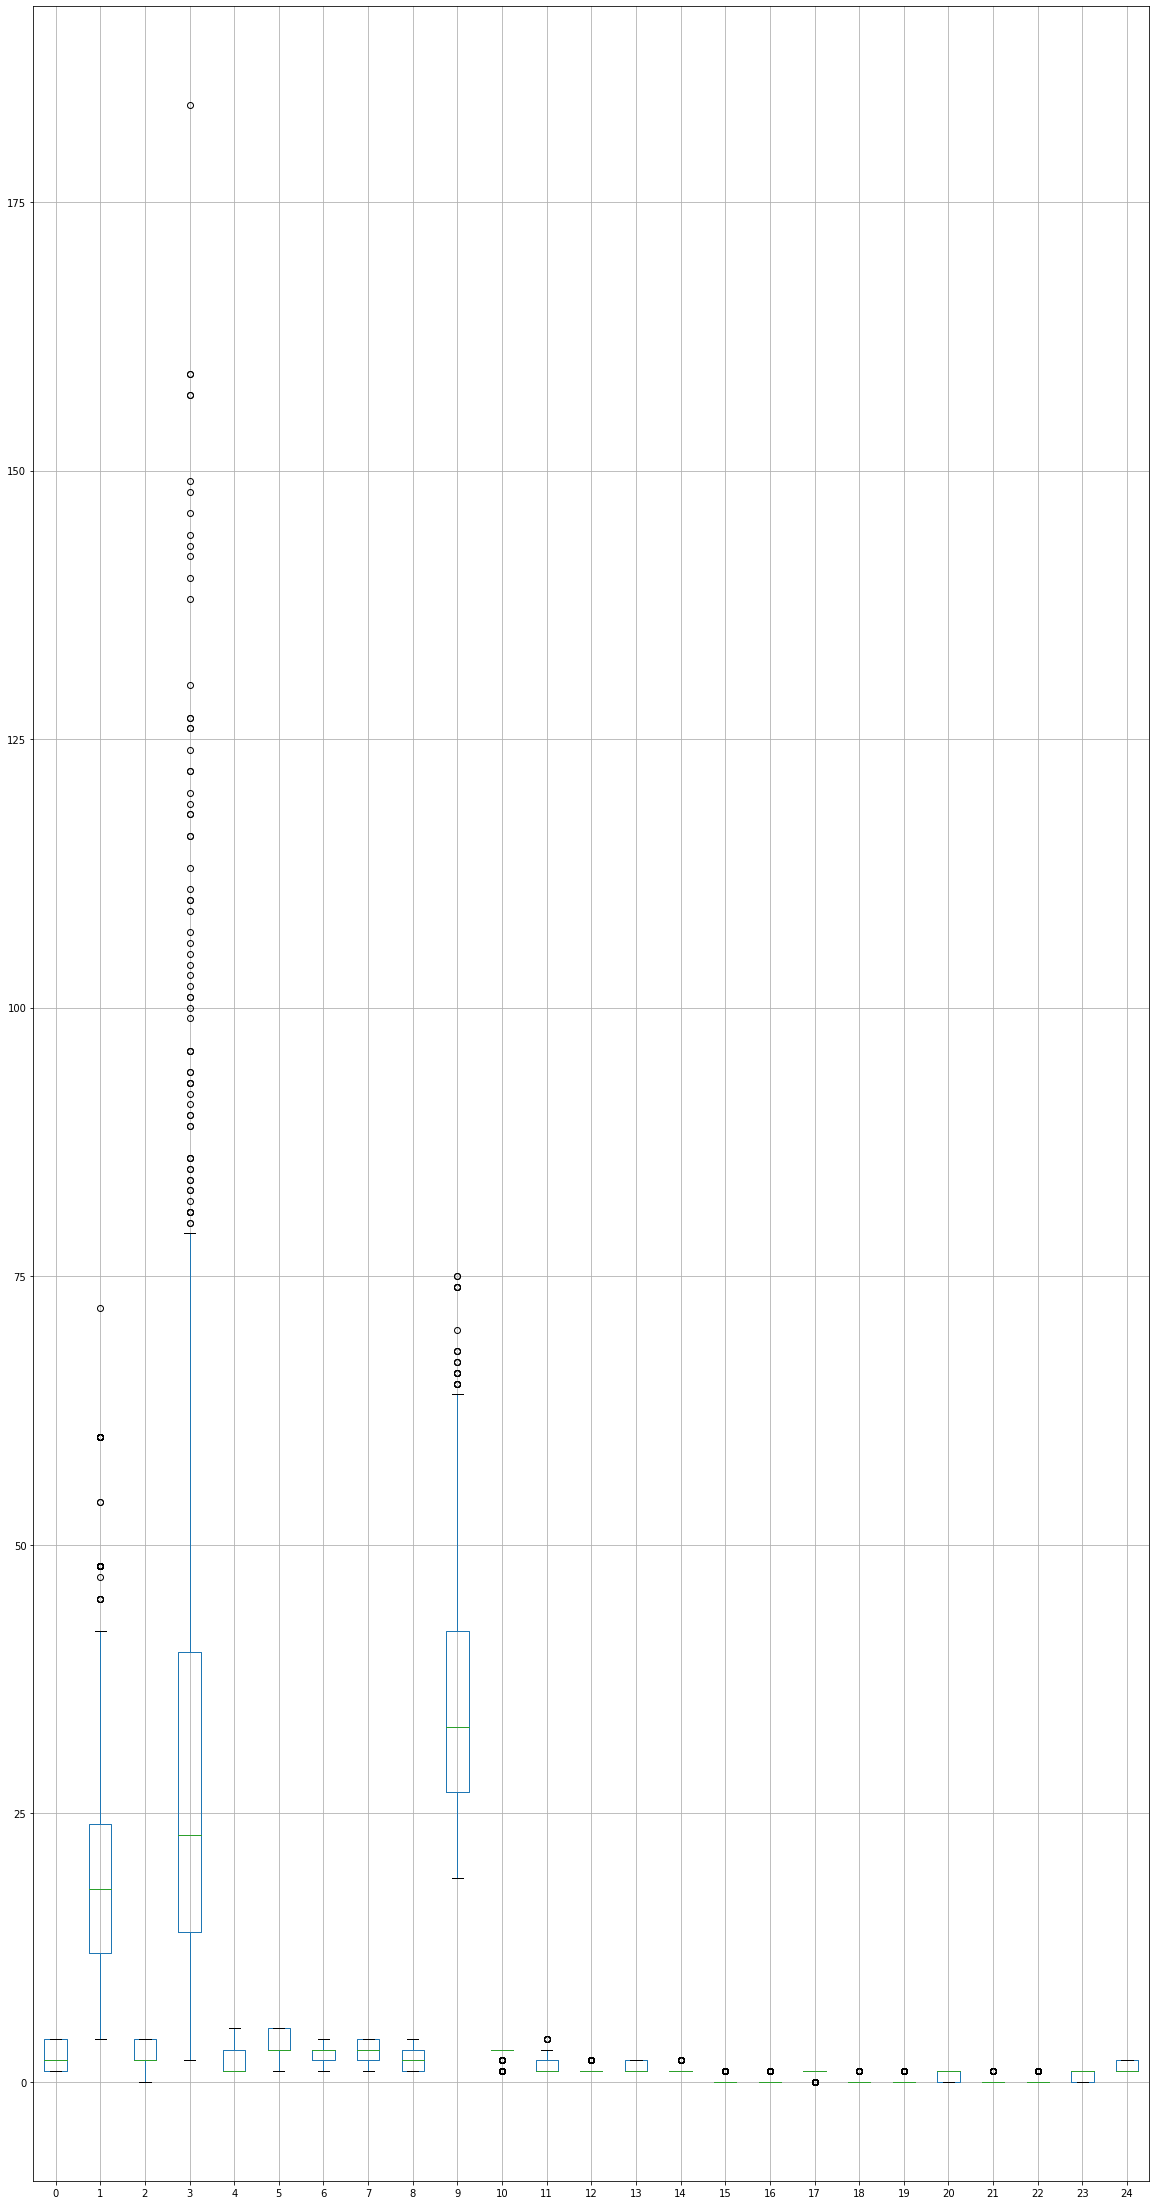

In [154]:
dataNumeric.boxplot(figsize=(20,40))

In [155]:
dataNumericPropre = dataNumeric.copy()

In [156]:
type(dataNumericPropre)

pandas.core.frame.DataFrame

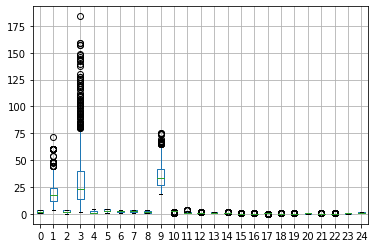

In [157]:
dataNumericPropre.boxplot()

In [158]:
#On remarque l'existance des points aberrants

In [159]:
#Pour enlever les points aberrants

In [160]:
from scipy import stats
import numpy as np  
dataNumericPropre.insert(25,"cible",cible_german)
print(len(dataNumericPropre.columns))
z = np.abs(stats.zscore(dataNumericPropre))
print(z)

26
[[1.25456565 1.23647786 1.34401408 ... 0.76635604 0.65465367 0.65465367]
 [0.45902624 2.24819436 0.50342796 ... 0.76635604 1.52752523 1.52752523]
 [1.13205258 0.73866754 1.34401408 ... 1.30487651 0.65465367 0.65465367]
 ...
 [1.13205258 0.73866754 0.50342796 ... 0.76635604 0.65465367 0.65465367]
 [1.25456565 1.9992892  0.50342796 ... 0.76635604 1.52752523 1.52752523]
 [0.45902624 1.9992892  1.34401408 ... 0.76635604 0.65465367 0.65465367]]


In [161]:
#Liste des points abbérants pour un seuil de 4
threshold = 3
np.where(z > 4);

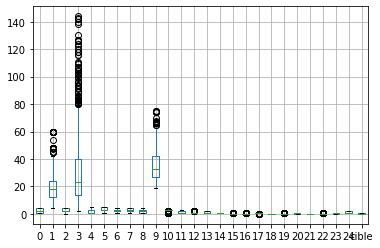

In [162]:
#dataframe aprés la suppression des points
dataNumericPropre1 = dataNumericPropre[(z < 4).all(axis=1)] 
dataNumericPropre1.boxplot()

In [163]:
dataNumericPropre1.shape

(896, 26)

In [164]:
#Séparer la cible de données aprés réduction des points abbérants
Newcible = dataNumericPropre1.iloc[:,25] 
dataNumericPropre1 = dataNumericPropre1.iloc[:,0:25]

In [165]:
print(dataNumericPropre1) 
print (Newcible)

     0   1   2    3   4   5   6   7   8   9   ...  15  16  17  18  19  20  21  \
0     1   6   4   12   5   5   3   4   1  67  ...   0   0   1   0   0   1   0   
1     2  48   2   60   1   3   2   2   1  22  ...   0   0   1   0   0   1   0   
2     4  12   4   21   1   4   3   3   1  49  ...   0   0   1   0   0   1   0   
3     1  42   2   79   1   4   3   4   2  45  ...   0   0   0   0   0   0   0   
4     1  24   3   49   1   3   3   4   4  53  ...   1   0   1   0   0   0   0   
5     4  36   2   91   5   3   3   4   4  35  ...   0   0   1   0   0   0   0   
6     4  24   2   28   3   5   3   4   2  53  ...   0   0   1   0   0   1   0   
7     2  36   2   69   1   3   3   2   3  35  ...   0   1   1   0   1   0   0   
8     4  12   2   31   4   4   1   4   1  61  ...   0   0   1   0   0   1   0   
9     2  30   4   52   1   1   4   2   3  28  ...   1   0   1   0   0   1   0   
10    2  12   2   13   1   2   2   1   3  25  ...   1   0   1   0   1   0   0   
11    1  48   2   43   1   2

### On vise a voir s'il y'a des correlations entre les variables dans la nouvelle dataset

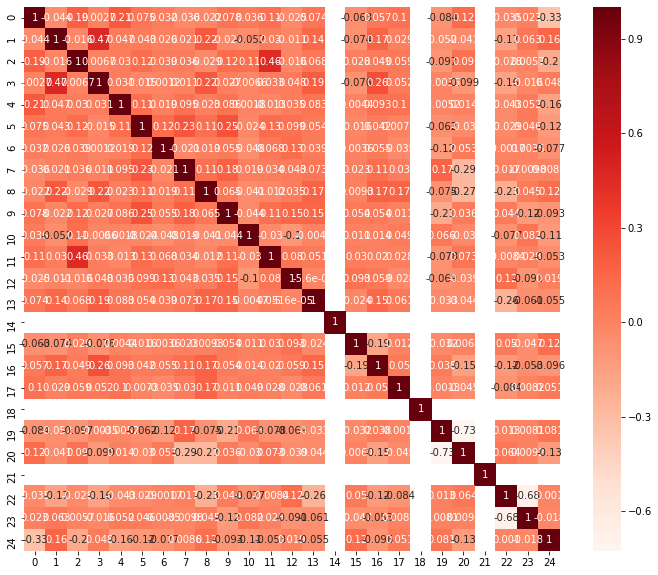

In [167]:
import seaborn as sns 
#Using KENDALL Correlation
plt.figure(figsize=(12,10))
cor = dataNumericPropre1.corr(method='kendall')
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [168]:
#On remarque qu'il ya pas une correlation forte entre les variables

In [169]:
for i in  range (dataNumericPropre1.shape[1]):
    for j in range (i+1 , dataNumericPropre1.shape[1] ):
        corl = dataNumericPropre1.iloc[:,i].corr(dataNumericPropre1.iloc[:,j],method='kendall')
        if (corl >= 0.8):
            print(i)
            print(j)
            print(corl)

In [170]:
X_bad1 = dataNumericPropre1
print(X_bad1.shape) 
Y_bad1= Newcible
transformer = KernelPCA(n_components=2, kernel='rbf')
X_transformed = transformer.fit_transform(X_bad1)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_transformed, Y_bad1[0:896], random_state=0)

(896, 25)


## Aprés Modification: 
## Exploiter le meilleur nb de comp avec PCA avec le RandomForest 

In [171]:
y_pred_rfc =[]
def pca_n_accuracy_rfc(n):
    pca = PCA(n_components=n)
    principalComponents = pca.fit_transform(X_bad1)
    global y_pred_rfc
    X_train, X_test, y_train, y_test = train_test_split(principalComponents, Y_bad1[0:896], random_state=0)
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)
    rfc = RandomForestClassifier()
    rfc_model = rfc.fit(X_train, y_train)
    y_pred_rfc = rfc_model.predict(X_test)
    return (rfc.score(X_test, y_test))

In [178]:
accuracy = 0
nb_components = 0 
while (accuracy < 0.99):
    for i in range (1,X_bad1
                    .shape[1]):
        acc = pca_n_accuracy_rfc(i)
        if acc > accuracy :
            accuracy = acc 
            nb_components = i
print(accuracy)
print(nb_components)
print (y_pred_rfc)

/home/autonome/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/autonome/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/autonome/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/autonome/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/autonome/anaconda3/lib/python3

0.9910714285714286
18
[0 1 1 0 0 1 1 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 0
 1 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0
 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0
 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 1 0 0 1
 0 0]


/home/autonome/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/autonome/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/autonome/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/autonome/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/autonome/anaconda3/lib/python3

In [179]:
##l'exploitation du meilleur nb de comp avec PCA pour appliquer le RandomForest et on a obtenu 18 composants avec une précision de 0.99

In [180]:
## Aprés Modification:

In [181]:
## Exploiter le meilleur nb du comp avec PCA avec le Dec Tree 

In [182]:
from sklearn.tree import DecisionTreeClassifier 
predictions_dt = []
def pca_n_accuracy_DecisionT(n):
    pca = PCA(n_components=n)
    principalComponents = pca.fit_transform(X_bad1)
    global predictions_dt
    X_train, X_test, y_train, y_test = train_test_split(principalComponents, Y_bad1[0:896], random_state=0)
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)
    decision_tree = DecisionTreeClassifier()
    decision_tree.fit(X_train, y_train)
    predictions_dt = decision_tree.predict(X_test)
    return (decision_tree.score(X_test, y_test))

In [183]:
accuracy = 0
nb_components = 0
for i in range (1,X_bad1.shape[1]):
    acc = pca_n_accuracy_DecisionT(i)
    if acc > accuracy :
        accuracy = acc 
        nb_components = i
print(accuracy)
print(nb_components)
print(len(X_train2)) 
print('ffffffff')
print(len(X_test2))
print (predictions_dt)

0.90625
18
750
ffffffff
250
[0 0 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1
 0 1]


In [ ]:
## on test le meilleur nb de comp avec PCA pour appliquer le RandomForest et on a obtenu 17 composants avec une précision de 0.96

## Aprés Modification: 

## On exploite le meilleur nb de comp avec PCA pour appliquer le knn 

In [189]:
y_pred_knn =[]
def pcaKernel_n_accuracy_knn(n):
    transformer = KernelPCA(n_components=n, kernel='rbf')
    X_transformed = transformer.fit_transform(X_bad1)


    X_train, X_test, y_train, y_test = train_test_split(X_transformed, Y_bad1[0:896], random_state=0)
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)
    global y_pred_knn
    knn = KNeighborsClassifier(2,metric='manhattan')
    knn_model = knn.fit(X_train, y_train)
    y_pred_knn = knn_model.predict(X_test)
    return (knn.score(X_test, y_test))


In [190]:
accuracy = 0
nb_components = 0
for i in range (1,X_bad1.shape[1]):
    acc = pcaKernel_n_accuracy_knn(i)
    if acc > accuracy :
        accuracy = acc 
        nb_components = i
print(accuracy)
print(nb_components)
print(y_pred_knn) 

0.7008928571428571
4
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1
 0 0]


In [ ]:
## On a obtenu 4 composants avec une précision de 0.70

## Aprés Modification: 
## La courbe ROC pour les données aprés suppression des points abbérants et application du PCA

In [191]:
fpr1, tpr1, threshold1 = roc_curve(y_test1, predictions_dt) 
roc_auc1 = auc(fpr1, tpr1)
fpr2, tpr2, threshold2 = roc_curve(y_test1, y_pred_rfc) 
roc_auc2 = auc(fpr2, tpr2)
fpr3, tpr3, threshold3 = roc_curve(y_test1, y_pred_knn)
roc_auc3 = auc(fpr3, tpr3)

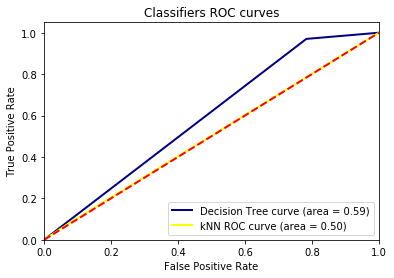

In [192]:
plt.figure() 
plt.plot(fpr1, tpr1, color='navy', lw=2, label='Decision Tree curve (area = %0.2f)'% roc_auc1)
plt.plot(fpr3, tpr3, color='yellow', lw=2, label='kNN ROC curve (area = %0.2f)'% roc_auc3)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--') 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Classifiers ROC curves') 
plt.legend(loc = "lower right")
plt.show()

## Sans exploiter les resultats de l' ACP

#### On va entrainer la modéle avec la dataframe initiale en eliminant les points abbérants 

In [193]:
### Supression des points abérants   
###Insertion du cible et faire la réduction puis séparation

In [194]:
from scipy import stats
import numpy as np 
dataNumeric.insert(25,"cible",cible_german)
print(len(dataNumeric.columns))
z = np.abs(stats.zscore(dataNumeric))
print(z)

26
[[1.25456565 1.23647786 1.34401408 ... 0.76635604 0.65465367 0.65465367]
 [0.45902624 2.24819436 0.50342796 ... 0.76635604 1.52752523 1.52752523]
 [1.13205258 0.73866754 1.34401408 ... 1.30487651 0.65465367 0.65465367]
 ...
 [1.13205258 0.73866754 0.50342796 ... 0.76635604 0.65465367 0.65465367]
 [1.25456565 1.9992892  0.50342796 ... 0.76635604 1.52752523 1.52752523]
 [0.45902624 1.9992892  1.34401408 ... 0.76635604 0.65465367 0.65465367]]


In [210]:
#Liste des points abbérants pour un seuil de 3 
threshold = 3
np.where(z > 3);

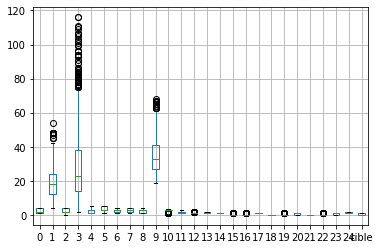

In [211]:
#dataframe aprés la suppression des points
dataNumericPropre1 = dataNumeric[(z < 3).all(axis=1)]
dataNumericPropre1.boxplot()

In [212]:
dataNumericPropre.shape

(1000, 26)

In [213]:
dataNumericPropre1.shape

(821, 26)

In [214]:
#Séparer la cible de données aprés réduction des points abbérants
Newcible = dataNumericPropre1.iloc[:,25] 
dataNumericPropre1 = dataNumericPropre1.iloc[:,0:25]

In [215]:
print(dataNumericPropre1) 
print (Newcible)

     0   1   2   3   4   5   6   7   8   9   ...  15  16  17  18  19  20  21  \
0     1   6   4  12   5   5   3   4   1  67  ...   0   0   1   0   0   1   0   
1     2  48   2  60   1   3   2   2   1  22  ...   0   0   1   0   0   1   0   
2     4  12   4  21   1   4   3   3   1  49  ...   0   0   1   0   0   1   0   
4     1  24   3  49   1   3   3   4   4  53  ...   1   0   1   0   0   0   0   
5     4  36   2  91   5   3   3   4   4  35  ...   0   0   1   0   0   0   0   
6     4  24   2  28   3   5   3   4   2  53  ...   0   0   1   0   0   1   0   
7     2  36   2  69   1   3   3   2   3  35  ...   0   1   1   0   1   0   0   
8     4  12   2  31   4   4   1   4   1  61  ...   0   0   1   0   0   1   0   
9     2  30   4  52   1   1   4   2   3  28  ...   1   0   1   0   0   1   0   
10    2  12   2  13   1   2   2   1   3  25  ...   1   0   1   0   1   0   0   
11    1  48   2  43   1   2   2   4   2  24  ...   0   0   1   0   1   0   0   
12    2  12   2  16   1   3   2   1   3 

In [216]:
##Appliquer KNN Aprés suppresion des Points abbérants. 

In [217]:
X_bad = german_Bank_Final.iloc[:,0:-1]
X_bad.shape

(1000, 60)

## Modéle KNN pour la DataFrame 'dataNumeric'

In [218]:
Y_bad= german_Bank.iloc[:,20]
Y_bad

0      1
1      2
2      1
3      1
4      2
5      1
6      1
7      1
8      1
9      2
10     2
11     2
12     1
13     2
14     1
15     2
16     1
17     1
18     2
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     2
      ..
970    1
971    1
972    2
973    2
974    1
975    1
976    1
977    1
978    2
979    2
980    2
981    2
982    1
983    2
984    1
985    1
986    1
987    1
988    1
989    1
990    1
991    1
992    1
993    1
994    1
995    1
996    1
997    1
998    2
999    1
Name: Cost, Length: 1000, dtype: int64

Text(0, 0.5, 'Erreur')

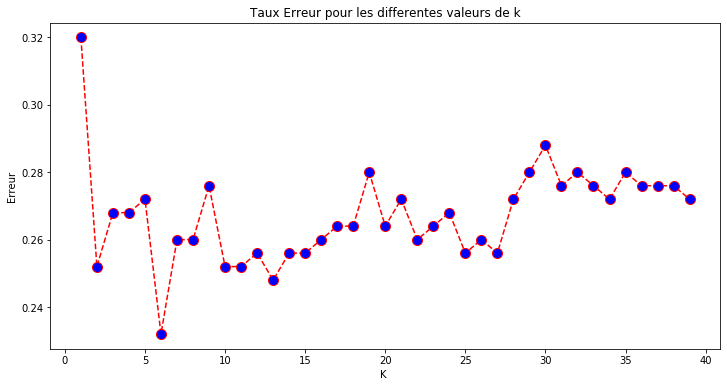

In [219]:
#choisir K pour le modéle
X_train4, X_test4, y_train4, y_test4 = train_test_split(X_bad, Y_bad, random_state=0)
scaler = MinMaxScaler()
X_train4 = scaler.fit_transform(X_train4)
X_test4 = scaler.fit_transform(X_test4)

error = []
# Calculer l'erreur pour k entre 1 et 40 
#Pour chaque itération, l'erreur moyenne pour les valeurs prédites 
#de l'ensemble de test est calculée et sauvegardée ds la liste Erreur.
for i in range(1, 40):
    knn = KNeighborsClassifier(i)
    knn_model = knn.fit(X_train4, y_train4)
    pred_i = knn_model.predict(X_test4)
    error.append(np.mean(pred_i != y_test4))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Taux Erreur pour les differentes valeurs de k')
plt.xlabel('K ')
plt.ylabel('Erreur')

In [220]:
#On essaye avec la distance Manhattan

In [221]:
knn = KNeighborsClassifier(2,metric='manhattan')
knn_model = knn.fit(X_train4, y_train4)
y_pred_knn = knn_model.predict(X_test4)

In [222]:
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train4, y_train4)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test4, y_test4)))

Accuracy of K-NN classifier on training set: 0.83
Accuracy of K-NN classifier on test set: 0.74


In [223]:
#It seems, there is a high accuracy 74% from testing set of our predictions are correct

## Modelisation with the best algorithm

In [224]:
#saving model 
pickle.dump(knn , open('model.pkl','wb'))

In [225]:
# Loading model to compare the results
model = pickle.load(open('model.pkl','rb'))

In [226]:
dataNumericPropre1.head()

0   1   2   3   4   5   6   7   8   9   ...  15  16  17  18  19  20  21  \
0   1   6   4  12   5   5   3   4   1  67  ...   0   0   1   0   0   1   0   
1   2  48   2  60   1   3   2   2   1  22  ...   0   0   1   0   0   1   0   
2   4  12   4  21   1   4   3   3   1  49  ...   0   0   1   0   0   1   0   
4   1  24   3  49   1   3   3   4   4  53  ...   1   0   1   0   0   0   0   
5   4  36   2  91   5   3   3   4   4  35  ...   0   0   1   0   0   0   0   

   22  23  24  
0   0   1   1  
1   0   1   2  
2   1   0   1  
4   0   1   2  
5   1   0   1  

[5 rows x 25 columns]

# Costumer Scoring 

### Kmeans Pour faire le clustering et trouver les variables significatives

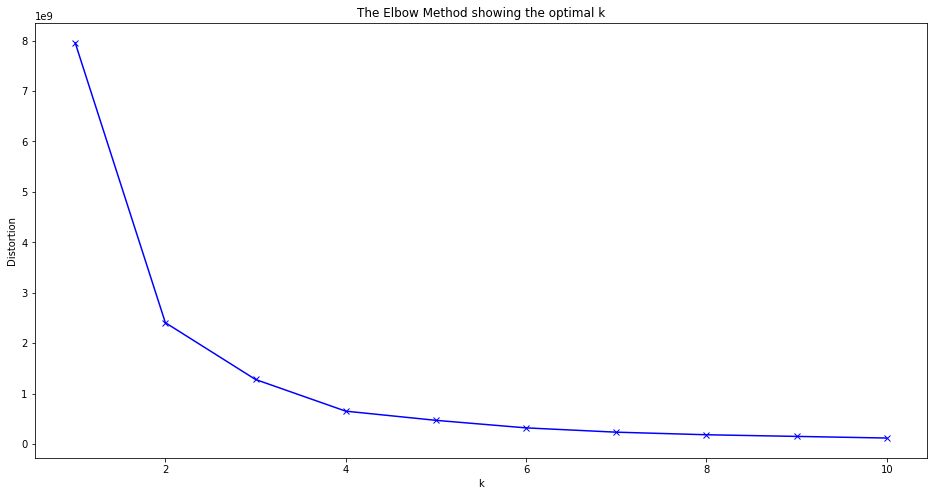

In [227]:
from sklearn.cluster import KMeans
# kmeans
distortions = []
K = range(1,11)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(german_Bank_Final)
    distortions.append(kmeanModel.inertia_)
    
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [228]:
# K optimal = 2 (d'apres la methode Elbow)
kmeans = KMeans(n_clusters=2)
kmeans.fit(german_Bank_Final)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

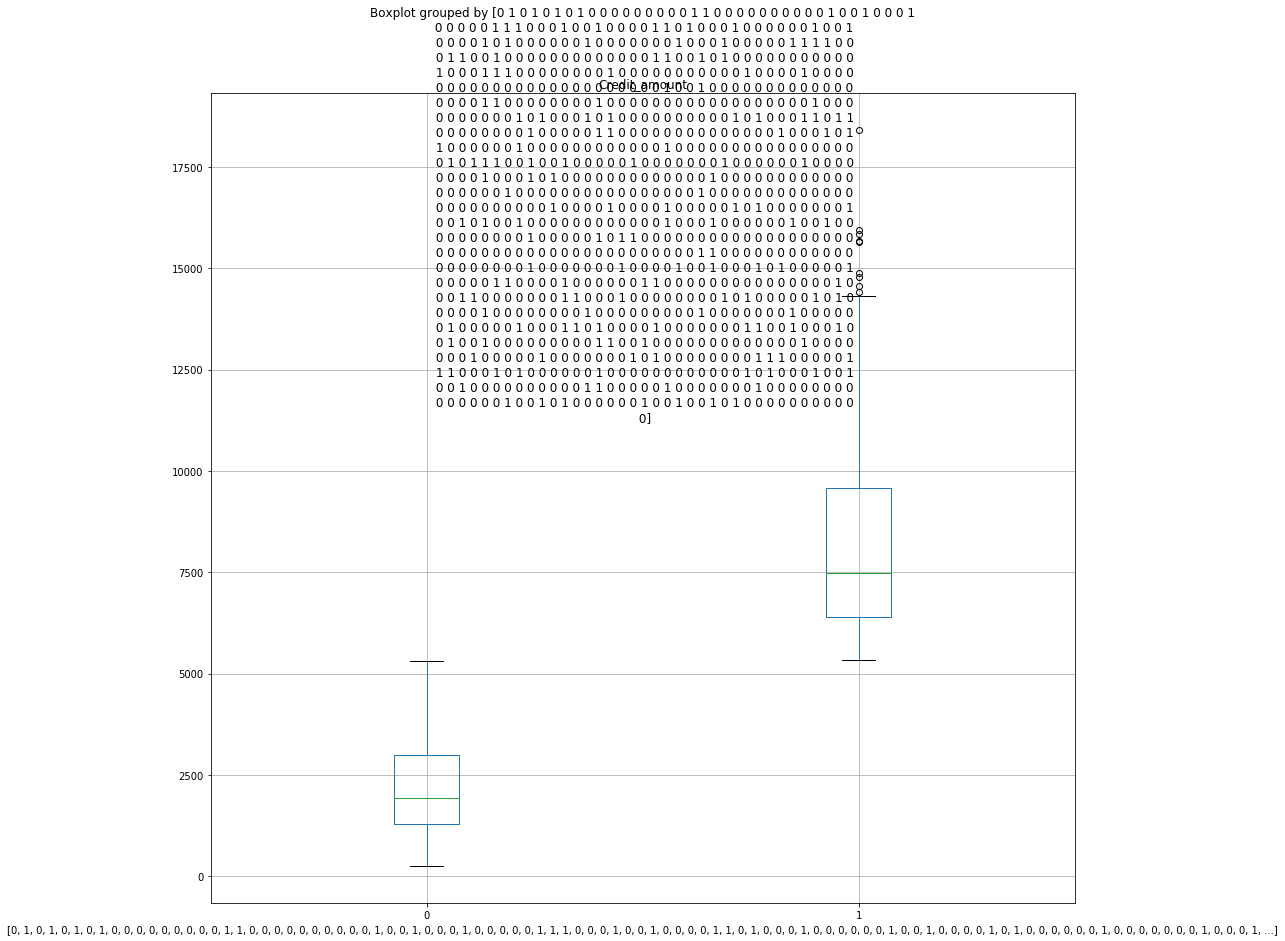

In [229]:
# La distribution de cluster 0 est entre 600-5500 et la distribution de cluster 1 est entre 5500-14000 pour la variable Credit_amount
# => La vairiable Credit_amount est significative 
german_Bank_Final.boxplot(column=['Credit_amount'],by=kmeans.labels_,figsize=(15,15));

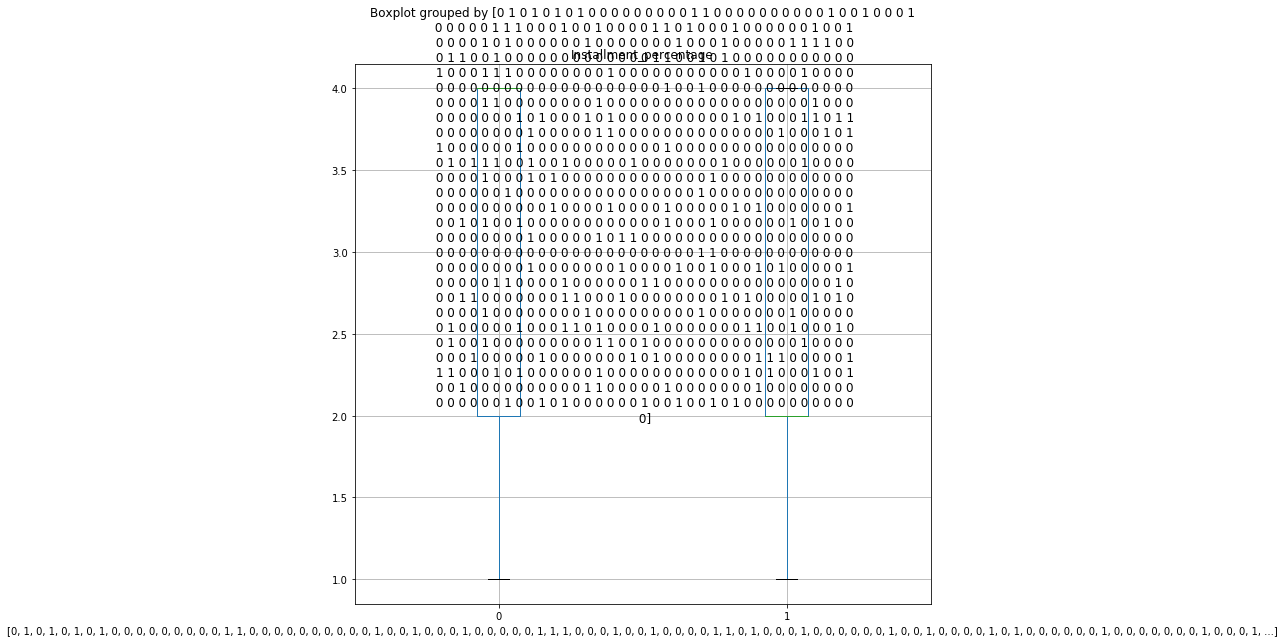

In [231]:
#La distribution de cluster 0 de cluster 1 est entre 1 et 4 pour la variable Installment_percentage
# => La vairiable Installment_percentage est non significative 
german_Bank_Final.boxplot(column=['Installment_percentage'],by=kmeans.labels_,figsize=(10,10));

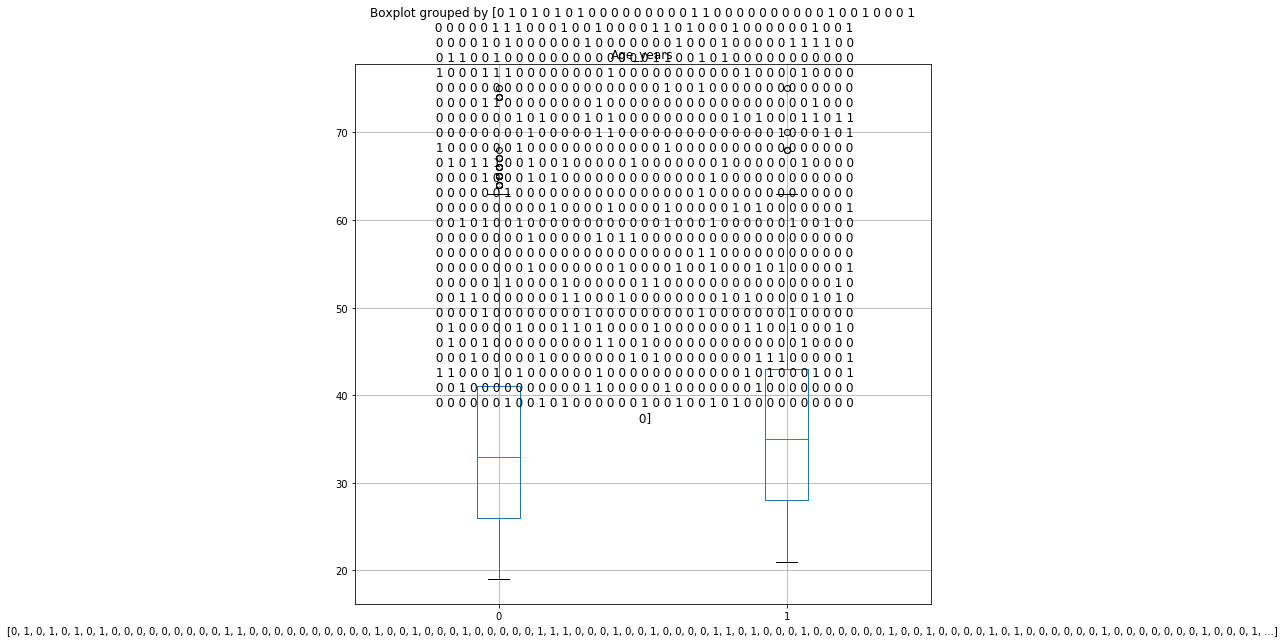

In [232]:
#La distribution de cluster 0 est entre 15 et 65 et cluster 1 entre 22 et 65 pour la variable Installment_percentage
# => La vairiable Age_years est non significative 
german_Bank_Final.boxplot(column=['Age_years'],by=kmeans.labels_,figsize=(10,10));

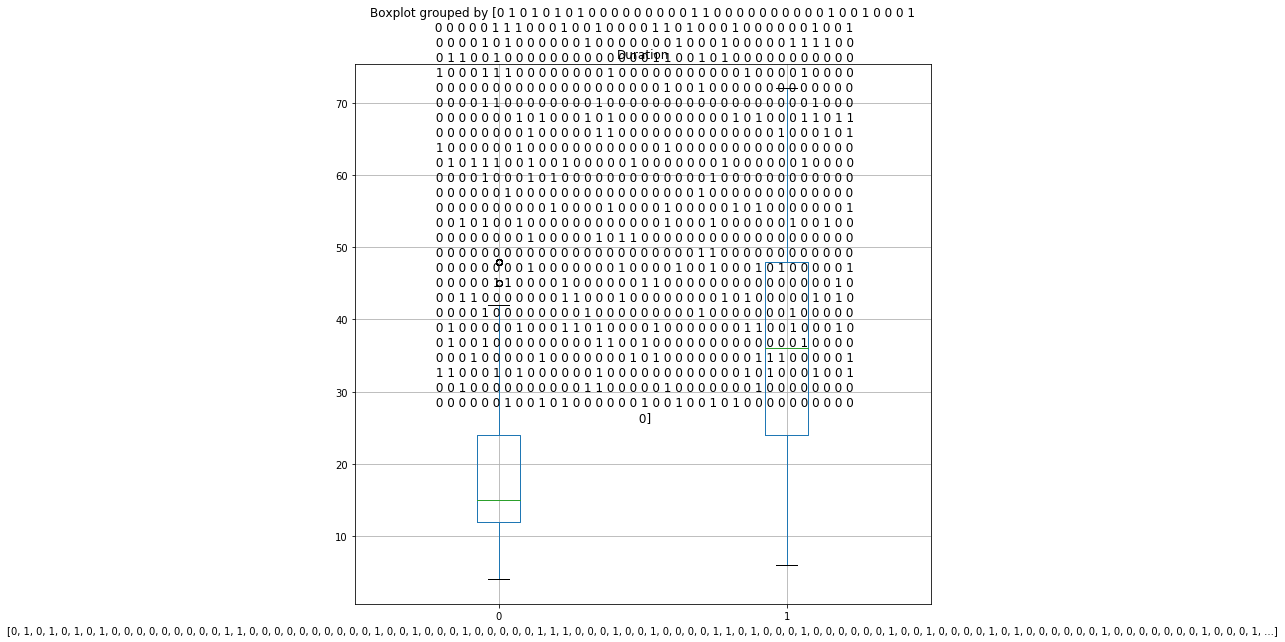

In [233]:
#La distribution de cluster 0 est entre 5 et 44 et cluster 1 entre 7 et 75 pour la variable Duration
# => La vairiable Duration est  significative pour une valeur plus que 44
german_Bank_Final.boxplot(column=['Duration'],by=kmeans.labels_,figsize=(10,10));

In [234]:
st=[] 
pur=[] 
job=[] 
house=[]

In [235]:
#st2 est la meilleur catégorie avec length 64 et ausi str4 avec len de 63 
st1 = len(german_Bank_Final.loc[(kmeans.labels_==1) & (german_Bank_Final.Status_A11==1)])
st2 = len(german_Bank_Final.loc[(kmeans.labels_==1) & (german_Bank_Final.Status_A12==1)])
st3 = len(german_Bank_Final.loc[(kmeans.labels_==1) & (german_Bank_Final.Status_A13==1)])
st4 = len(german_Bank_Final.loc[(kmeans.labels_==1) & (german_Bank_Final.Status_A14==1)])   
st.extend([st1,st2,st3,st4]) 
st

[44, 64, 2, 63]

In [236]:
#pur2 est la meilleur catégorie avec length 47
#on met alors un score de 4 pour purpose_A41
pur1 = len(german_Bank_Final.loc[(kmeans.labels_==1) & (german_Bank_Final.Purpose_A40==1)])
pur2 = len(german_Bank_Final.loc[(kmeans.labels_==1) & (german_Bank_Final.Purpose_A41==1)])
pur3 = len(german_Bank_Final.loc[(kmeans.labels_==1) & (german_Bank_Final.Purpose_A42==1)])
pur4 = len(german_Bank_Final.loc[(kmeans.labels_==1) & (german_Bank_Final.Purpose_A43==1)])
pur5 = len(german_Bank_Final.loc[(kmeans.labels_==1) & (german_Bank_Final.Purpose_A44==1)])
pur6 = len(german_Bank_Final.loc[(kmeans.labels_==1) & (german_Bank_Final.Purpose_A45==1)])
pur7 = len(german_Bank_Final.loc[(kmeans.labels_==1) & (german_Bank_Final.Purpose_A46==1)])
pur9 = len(german_Bank_Final.loc[(kmeans.labels_==1) & (german_Bank_Final.Purpose_A48==1)])
pur10 = len(german_Bank_Final.loc[(kmeans.labels_==1) & (german_Bank_Final.Purpose_A49==1)])
pur11 = len(german_Bank_Final.loc[(kmeans.labels_==1) & (german_Bank_Final.Purpose_A410==1)]) 

In [237]:
#Job3 est la meilleur catégorie avec length 94 
#on met alors un score de 8 pour Job_A173

job1 = len(german_Bank_Final.loc[(kmeans.labels_==1) & (german_Bank_Final.Job_A171==1)])
job2 = len(german_Bank_Final.loc[(kmeans.labels_==1) & (german_Bank_Final.Job_A172==1)])
job3 = len(german_Bank_Final.loc[(kmeans.labels_==1) & (german_Bank_Final.Job_A173==1)]) 
job4 = len(german_Bank_Final.loc[(kmeans.labels_==1) & (german_Bank_Final.Job_A174==1)])

In [238]:
#house2 est la meilleur catégorie avec length 102 
#on met alors un score de 8 pour Housing_A152

house1 = len(german_Bank_Final.loc[(kmeans.labels_==1) & (german_Bank_Final.Housing_A151==1)])
house2 = len(german_Bank_Final.loc[(kmeans.labels_==1) & (german_Bank_Final.Housing_A152==1)])
house3 = len(german_Bank_Final.loc[(kmeans.labels_==1) & (german_Bank_Final.Housing_A153==1)])


In [239]:
len(german_Bank_Final.columns)

61

In [240]:
### La fonction ci-dessous calcul une score pour chaque compte en basant sur les crités précidentes 
### Pour une catégorie Purpose_A41 on affecte 4
### Pour une catégorie Job_A173 on affecte 8
### Pour les catégories Status_A12 et Status_A14 on affecte 4 
### Si le crédit_amount >5500 alors on affecte 10 et Pour duration >44 on affecte 8
### Le score est sur 42.

In [241]:
def PredictScore():
    german_Bank_FinalScr= german_Bank_Final.copy()
    score=[0] * 1000
    german_Bank_FinalScr.insert(61,"Score",score) 
    german_Bank_FinalScr.loc[german_Bank_FinalScr.Purpose_A41==1, 'Score'] += 4
    german_Bank_FinalScr.loc[german_Bank_FinalScr.Job_A173==1, 'Score'] += 8
    german_Bank_FinalScr.loc[(german_Bank_FinalScr.Status_A12==1) | (german_Bank_Final.Status_A14==1), 'Score'] += 4
    german_Bank_FinalScr.loc[german_Bank_FinalScr.Housing_A152==1, 'Score'] += 8
    german_Bank_FinalScr.loc[german_Bank_FinalScr.Credit_amount >5500, 'Score'] += 10
    german_Bank_FinalScr.loc[german_Bank_FinalScr.Duration >44, 'Score'] += 8 
    return german_Bank_FinalScr

    
    

In [242]:
PredictScore()

Duration  Credit_amount  Installment_percentage  Present_residence  \
0           6           1169                       4                  4   
1          48           5951                       2                  2   
2          12           2096                       2                  3   
3          42           7882                       2                  4   
4          24           4870                       3                  4   
5          36           9055                       2                  4   
6          24           2835                       3                  4   
7          36           6948                       2                  2   
8          12           3059                       2                  4   
9          30           5234                       4                  2   
10         12           1295                       3                  1   
11         48           4308                       3                  4   
12         12           1567                       1                  1   
13         24           1199                       4                  4   
14         15           1403                       2                  4   
15         24           1282                       4                  2   
16         24           2424                       4                  4   
17         30           8072                       2                  3   
18         24          12579                       4                  2   
19         24           3430                       3                  2   
20          9           2134                       4                  4   
21          6           2647                       2                  3   
22         10           2241                       1                  3   
23         12           1804                       3                  4   
24         10           2069                       2                  1   
25          6           1374                       1                  2   
26          6            426                       4                  4   
27         12            409                       3                  3   
28          7           2415                       3                  2   
29         60           6836                       3                  4   
..        ...            ...                     ...                ...   
970        15           1514                       4                  2   
971        24           7393                       1                  4   
972        24           1193                       1                  4   
973        60           7297                       4                  4   
974        30           2831                       4                  2   
975        24           1258                       3                  3   
976         6            753                       2                  3   
977        18           2427                       4                  2   
978        24           2538                       4                  4   
979        15           1264                       2                  2   
980        30           8386                       2                  2   
981        48           4844                       3                  2   
982        21           2923                       1                  1   
983        36           8229                       2                  2   
984        24           2028                       2                  2   
985        15           1433                       4                  3   
986        42           6289                       2                  1   
987        13           1409                       2                  4   
988        24           6579                       4                  2   
989        24           1743                       4                  2   
990        12           3565                       2                  1   
991        15           1569  

### Bank of Taiwan

In [243]:
credit= pd.read_excel("default of credit card clients.xls",header=1)


In [244]:
credit.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0         0                           1  
1      1000         0      2000                           1  
2      1000      1000      5000                           0  
3      1100      1069      1000                           0  
4      9000       689       679                           0  

[5 rows x 25 columns]

In [245]:
credit.shape

(30000, 25)

In [246]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [247]:
credit.describe()

ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     -0.016700     -0.133767     -0.166200     -0.220667   
std        9.217904      1.123802      1.197186      1.196868      1.169139   
min       21.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       28.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%       34.000000      0.000000      0.000000      0.000000      0.000000   
75%       41.000000      0.000000      0.000000      0.000000      0.000000   
max       79.000000      8.000000      8.000000      8.000000      8.000000   

       ...      BILL_AMT4      BILL_AMT5      BILL_AMT6       PAY_AMT1  \
count  ...   30000.000000   30000.000000   30000.000000   30000.000000   
mean   ...   43262.948967   40311.400967   38871.760400    5663.580500   
std    ...   64332.856134   60797.155770   59554.107537   16563.280354   
min    ... -170000.000000  -81334.000000 -339603.000000       0.000000   
25%    ...    2326.750000    1763.000000    1256.000000    1000.000000   
50%    ...   19052.000000   18104.500000   17071.000000    2100.000000   
75%    ...   54506.000000   50190.500000   49198.250000    5006.000000   
max    ...  891586.000000  927171.000000  961664.000000  873552.000000   

           PAY_AMT2      PAY_AMT3       PAY_AMT4       PAY_AMT5  \
count  3.000000e+04   30000.00000   30000.000000   30000.000000   
mean   5.921163e+03    5225.68150    4826.076867    4799.387633   
std    2.304087e+04   17606.96147   15666.159744   15278.305679   
min    0.000000e+00       0.00000       0.000000       0.000000   
25%    8.330000e+02     390.00000     296.000000     252.500000   
50%    2.009000e+03    1800.00000    1500.000000    1500.000000   
75%    5.000000e+03    4505.00000    4013.250000    4031.500000   
max    1.684259e+06  896040.00000  621000.000000  426529.000000   

            PAY_AMT6  default payment next month  
count   30000.000000                30000.000000  
mean     5215.502567                    0.221200  
std     17777.465775                    0.415062  
min         0.000000                    0.000000  
25%       117.750000                    0.000000  
50%      1500.000000                    0.000000  
75%      4000.000000                    0.000000  
max    528666.000000                    1.000000  

[8 rows x 25 columns]

In [248]:
credit.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [249]:
credit.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

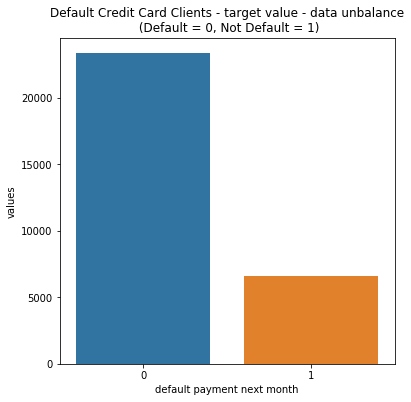

In [250]:
temp = credit["default payment next month"].value_counts()
df = pd.DataFrame({'default payment next month': temp.index,'values': temp.values})
plt.figure(figsize = (6,6))
plt.title('Default Credit Card Clients - target value - data unbalance\n (Default = 0, Not Default = 1)')
sns.set_color_codes("pastel")
sns.barplot(x = 'default payment next month', y="values", data=df)
locs, labels = plt.xticks()
plt.show()

# Payment le mois prochain par defaut en fonction de la valeur
#A number of 6,636 out of 30,000 (or 22%) of clients will default next month.

## Amount of credit limit¶


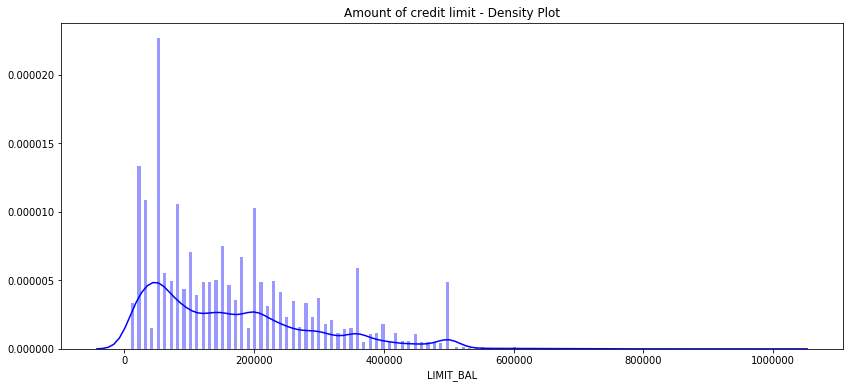

In [251]:
plt.figure(figsize = (14,6))
plt.title('Amount of credit limit - Density Plot')
sns.set_color_codes("pastel")
sns.distplot(credit['LIMIT_BAL'],kde=True,bins=200, color="blue")
plt.show()

Largest group of amount of credit limit is apparently for amount of 50K. Let's verify this.

In [252]:
credit['LIMIT_BAL'].value_counts().shape
credit['LIMIT_BAL'].value_counts().head(5)


50000     3365
20000     1976
30000     1610
80000     1567
200000    1528
Name: LIMIT_BAL, dtype: int64

Indeed, the largest number of credit cards are with limit of 50,000 (3365), followed by 20,000 (1976) and 30,000 (1610).

## Payment Amount :


In [253]:
credit[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe()


PAY_AMT1      PAY_AMT2      PAY_AMT3       PAY_AMT4  \
count   30000.000000  3.000000e+04   30000.00000   30000.000000   
mean     5663.580500  5.921163e+03    5225.68150    4826.076867   
std     16563.280354  2.304087e+04   17606.96147   15666.159744   
min         0.000000  0.000000e+00       0.00000       0.000000   
25%      1000.000000  8.330000e+02     390.00000     296.000000   
50%      2100.000000  2.009000e+03    1800.00000    1500.000000   
75%      5006.000000  5.000000e+03    4505.00000    4013.250000   
max    873552.000000  1.684259e+06  896040.00000  621000.000000   

            PAY_AMT5       PAY_AMT6  
count   30000.000000   30000.000000  
mean     4799.387633    5215.502567  
std     15278.305679   17777.465775  
min         0.000000       0.000000  
25%       252.500000     117.750000  
50%      1500.000000    1500.000000  
75%      4031.500000    4000.000000  
max    426529.000000  528666.000000

## Bill Amount :

In [254]:
credit[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe()


BILL_AMT1      BILL_AMT2     BILL_AMT3      BILL_AMT4  \
count   30000.000000   30000.000000  3.000000e+04   30000.000000   
mean    51223.330900   49179.075167  4.701315e+04   43262.948967   
std     73635.860576   71173.768783  6.934939e+04   64332.856134   
min   -165580.000000  -69777.000000 -1.572640e+05 -170000.000000   
25%      3558.750000    2984.750000  2.666250e+03    2326.750000   
50%     22381.500000   21200.000000  2.008850e+04   19052.000000   
75%     67091.000000   64006.250000  6.016475e+04   54506.000000   
max    964511.000000  983931.000000  1.664089e+06  891586.000000   

           BILL_AMT5      BILL_AMT6  
count   30000.000000   30000.000000  
mean    40311.400967   38871.760400  
std     60797.155770   59554.107537  
min    -81334.000000 -339603.000000  
25%      1763.000000    1256.000000  
50%     18104.500000   17071.000000  
75%     50190.500000   49198.250000  
max    927171.000000  961664.000000

###  Visualizing the Data:

In [255]:
data = credit.drop('default payment next month',axis=1)


In [256]:
def calculate_percentage(default_count, total_count,label):
    print("Percentage of {} is {} %".format(label,((total_count * 100) / default_count)))
def getColumnsNames(prefix):
    return [prefix+str(x) for x in range(1,7)]

No handles with labels found to put in legend.


Percentage of Graduate school Default is 19.23476617855456 %
Percentage of University Default is 23.734853884533145 %
Percentage of High school Default is 25.157616432784216 %
Percentage of Others Default is 5.691056910569106 %


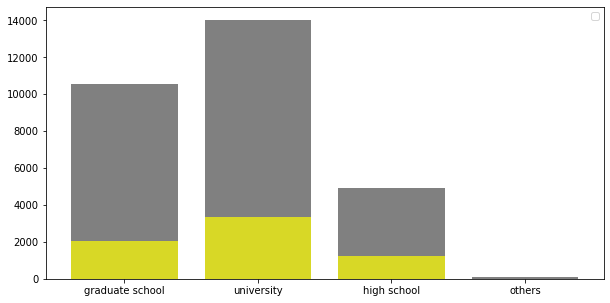

In [257]:
#(1 = graduate school; 2 = university; 3 = high school; 4 = others)
# preparing the vairable for the diagram
_EDUCATION_RANGE= [1,2,3,4]
plt.figure(figsize=(10,5))

school= credit['EDUCATION'][data['EDUCATION']==1].count()
school_default = credit['EDUCATION'][(credit['EDUCATION']==1)&(credit['default payment next month'])].count()

university= credit['EDUCATION'][data['EDUCATION']==2].count()
university_default = credit['EDUCATION'][(credit['EDUCATION']==2)&(credit['default payment next month'])].count()

high_school= credit['EDUCATION'][data['EDUCATION']==3].count()
high_school_default = credit['EDUCATION'][(credit['EDUCATION']==3)&(credit['default payment next month'])].count()

others= credit['EDUCATION'][data['EDUCATION']==4].count()
others_default = credit['EDUCATION'][(credit['EDUCATION']==4)&(credit['default payment next month'])].count()

education_total = [school,university,high_school,others]
default_education_total=  [school_default,university_default,high_school_default,others_default] 


plt.bar(_EDUCATION_RANGE , education_total,color='grey')
plt.bar(_EDUCATION_RANGE , default_education_total,color='yellow', alpha = 0.7)
plt.xticks(_EDUCATION_RANGE,['graduate school','university','high school','others'])
calculate_percentage(school,school_default,"Graduate school Default")
calculate_percentage(university,university_default,"University Default")
calculate_percentage(high_school,high_school_default,"High school Default")
calculate_percentage(others,others_default,"Others Default")


plt.legend()
plt.show()

No handles with labels found to put in legend.


Gender / Default


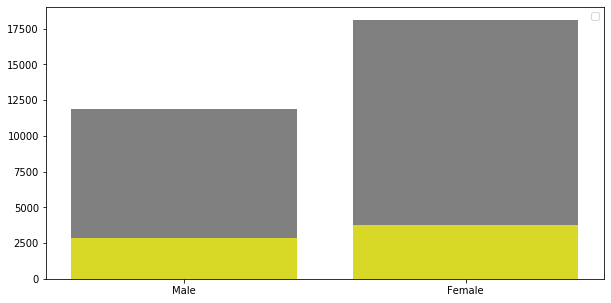

Percentage of Male Default is 24.167227456258413 %
Percentage of Female Default is 20.776280918727917 %


In [258]:
print("Gender / Default")
plt.figure(figsize=(10,5))
_GENDER_RANGE= [0,1]

male= credit['SEX'][data['SEX']==1].count()
male_default = credit['SEX'][(credit['SEX']==1)&(credit['default payment next month']==1)].count()

female=credit['SEX'][data['SEX']==2].count()
female_default = credit['SEX'][(credit['SEX']==2)&(credit['default payment next month']==1)].count()

gender_total = [male,female]
default_gender_total = [male_default,female_default]

plt.bar(_GENDER_RANGE,gender_total, color='grey')
plt.bar(_GENDER_RANGE,default_gender_total, color='yellow',alpha = 0.7)
plt.xticks([0,1],['Male','Female'])

plt.legend()
plt.show()
calculate_percentage(male,male_default,"Male Default")
calculate_percentage(female,female_default,"Female Default")

Marriage / Default


No handles with labels found to put in legend.


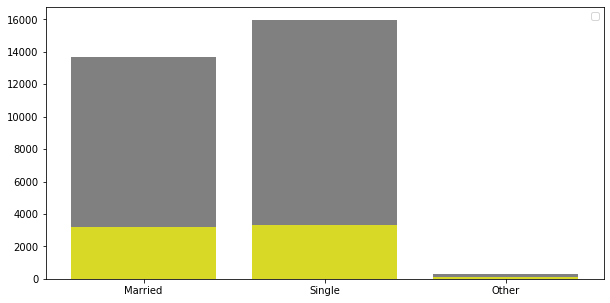

Percentage of Married Default is 23.471703638626547 %
Percentage of Single Default is 20.928338762214985 %
Percentage of Others Default is 26.006191950464395 %


In [259]:
# 1=married, 2=single, 3=others
# preparing the vairable for the diagram
print("Marriage / Default")
_MARRIAGE_RANGE= [1,2,3]
plt.figure(figsize=(10,5))

married= credit['MARRIAGE'][data['MARRIAGE']==1].count()
married_default = credit['MARRIAGE'][(credit['MARRIAGE']==1)&(credit['default payment next month']==1)].count()

single=credit['MARRIAGE'][data['MARRIAGE']==2].count()
single_default = credit['MARRIAGE'][(credit['MARRIAGE']==2)&(credit['default payment next month']==1)].count()

others=credit['MARRIAGE'][data['MARRIAGE']==3].count()
others_default = credit['MARRIAGE'][(credit['MARRIAGE']==3)&(credit['default payment next month']==1)].count()


marriage_total = [married,single,others]
default_marriage_total = [married_default,single_default,others_default]

plt.bar(_MARRIAGE_RANGE,marriage_total, color='grey')
plt.bar(_MARRIAGE_RANGE,default_marriage_total, color='yellow',alpha = 0.7)
plt.xticks([1,2,3],['Married','Single','Other'])
plt.legend()
plt.show()

calculate_percentage(married,married_default,"Married Default")
calculate_percentage(single,single_default,"Single Default")
calculate_percentage(others,others_default,"Others Default")

Age / Default


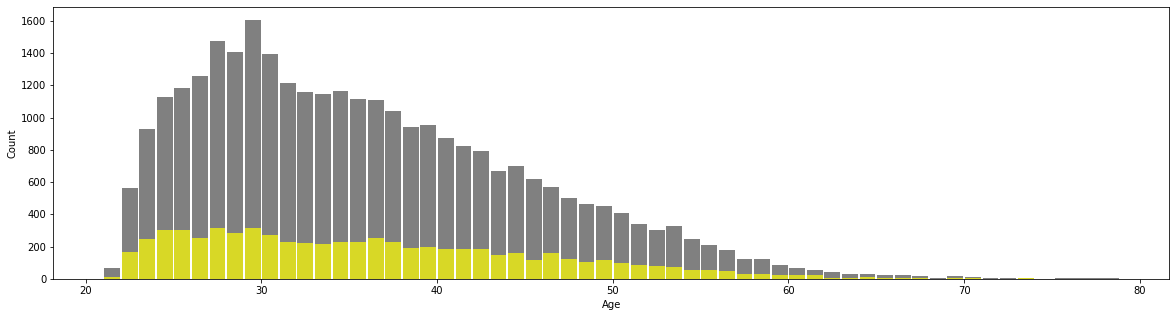

Percentage of 21 is 20.895522388059703 %
Percentage of 22 is 30.178571428571427 %
Percentage of 23 is 26.53061224489796 %
Percentage of 24 is 26.619343389529725 %
Percentage of 25 is 25.463743676222595 %
Percentage of 26 is 20.143312101910826 %
Percentage of 27 is 21.19160460392688 %
Percentage of 28 is 20.298083747338538 %
Percentage of 29 is 19.501557632398754 %
Percentage of 30 is 19.6415770609319 %
Percentage of 31 is 18.816762530813477 %
Percentage of 32 is 19.430051813471504 %
Percentage of 33 is 18.760907504363 %
Percentage of 34 is 19.879518072289155 %
Percentage of 35 is 20.305480682839175 %
Percentage of 36 is 22.924187725631768 %
Percentage of 37 is 21.998078770413063 %
Percentage of 38 is 20.550847457627118 %
Percentage of 39 is 20.859538784067087 %
Percentage of 40 is 21.49425287356322 %
Percentage of 41 is 22.45145631067961 %
Percentage of 42 is 23.299748110831235 %
Percentage of 43 is 22.388059701492537 %
Percentage of 44 is 23.142857142857142 %
Percentage of 45 is 18.80

In [260]:
print("Age / Default")
plt.figure(figsize=(20,5))
plt.hist(data['AGE'], sorted(data['AGE'].unique()),rwidth=0.9, color ='grey')
plt.hist(credit['AGE'][(credit['default payment next month']==1)], sorted(data['AGE'].unique()),rwidth=0.9,color='yellow',alpha = 0.7)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

age_persentage_dataframe = pd.DataFrame(columns=['Age', 'Percentage'])

for x in sorted(data['AGE'].unique()):
    calculate_percentage(
                         credit['AGE'][credit['AGE']==x ].count(),credit['AGE'][(credit['AGE']==x )&(credit['default payment next month']==1)].count(), x
                               )


Limit Balance / Default


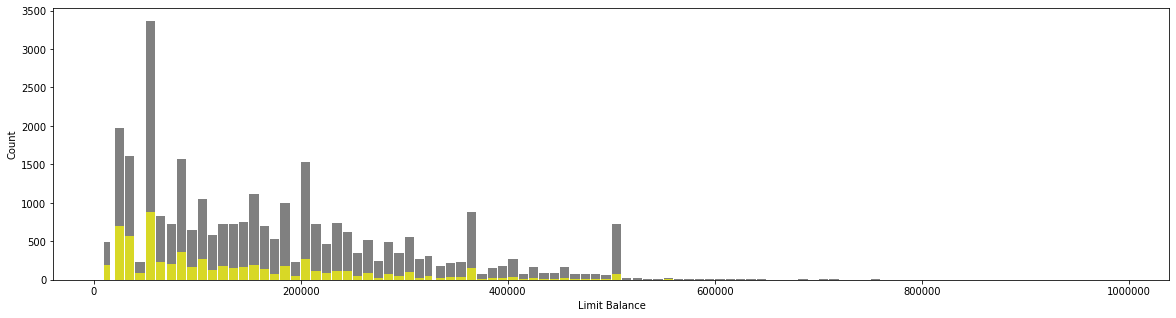

<Figure size 1440x72 with 0 Axes>

In [261]:
#LIMIT_BAL

print("Limit Balance / Default")
plt.figure(figsize=(20,5))
plt.hist(data['LIMIT_BAL'], sorted(data['LIMIT_BAL'].unique()),rwidth=0.9, color ='grey')
plt.hist(credit['LIMIT_BAL'][(credit['default payment next month']==1)], sorted(credit['LIMIT_BAL'].unique()),rwidth=0.9,color='yellow',alpha = 0.7)
plt.xlabel('Limit Balance')
plt.ylabel('Count')
plt.figure(figsize=(20,1))
plt.show()

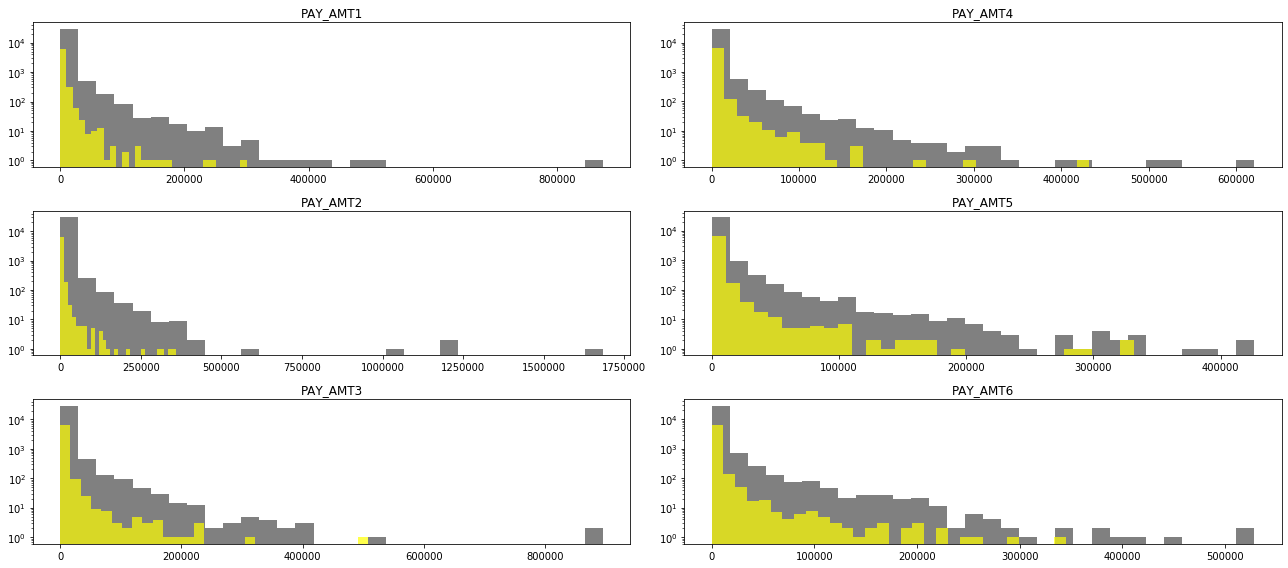

In [262]:
#pay_AMT
pay_amt_columns = getColumnsNames('PAY_AMT')
figure, ax = plt.subplots(3,2)
figure.set_size_inches(18,8)


for i in range(len(pay_amt_columns)):
    row,col =  i%3, int(i/3)
   
    ax[row,col].hist(credit[pay_amt_columns[i]], 30, color ='grey')
    ax[row,col].hist(credit[pay_amt_columns[i]][(credit['default payment next month']==1)],30,color='yellow',alpha = 0.7)
    ax[row,col].set_title(pay_amt_columns[i])
    #adding scaling to make the graph more helpful
    ax[row,col].set_yscale('log', nonposy='clip')
plt.tight_layout()
plt.show()
# for i in range(0,1):
    
#     plt.hist(dataset[pay_status_columns[i]], sorted(dataset[pay_status_columns[i]].unique()),rwidth=0.9, color ='grey')
#     plt.show()

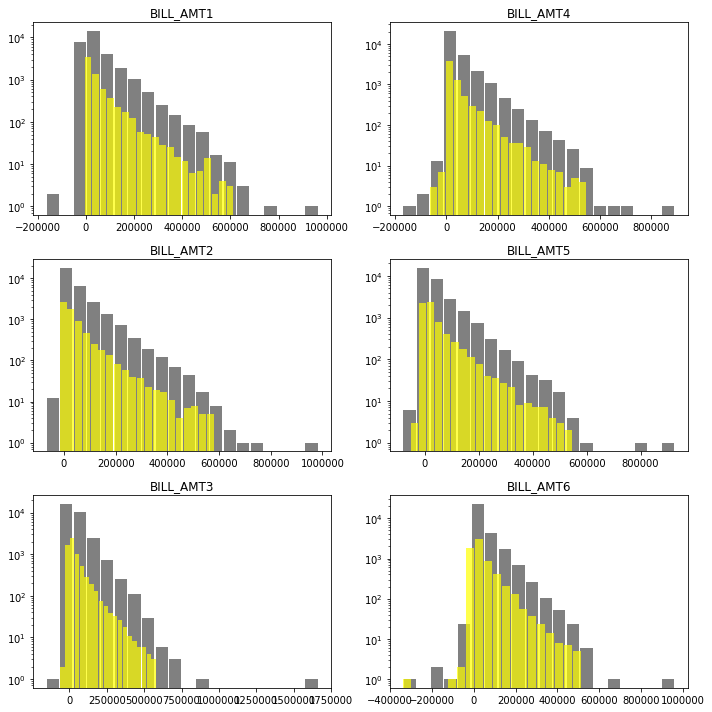

In [263]:

# BILL_AMT1 , PAY_2 , PAY_3 , PAY_4 , PAY_5, PAY_6
#(-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
bill_atm_columns =  getColumnsNames('BILL_AMT')
figure, ax = plt.subplots(3,2)
figure.set_size_inches(10,10)


for i in range(len(bill_atm_columns)):
    row,col =  i%3, int(i/3)
   
    ax[row,col].hist(credit[bill_atm_columns[i]], 20,rwidth=0.9, color ='grey')
    ax[row,col].hist(credit[bill_atm_columns[i]][(credit['default payment next month']==1)],20,rwidth=0.9,color='yellow',alpha = 0.7)
    ax[row,col].set_title(bill_atm_columns[i])
    #adding scaling to make the graph more helpful
    ax[row,col].set_yscale('log', nonposy='clip')
plt.tight_layout()
plt.show()

after looking at the result from the heat map it's clearly showing corelation between pay column and also between bill amount column...so , we create a new feature for both of them that will have the average. will go with this approache if i need better performance while trainning ( instead of trainning for 12 i would train for 2 features) I was expecting to see some corrletion between (AGE/MARRIAGE/SEX) but that was not the case

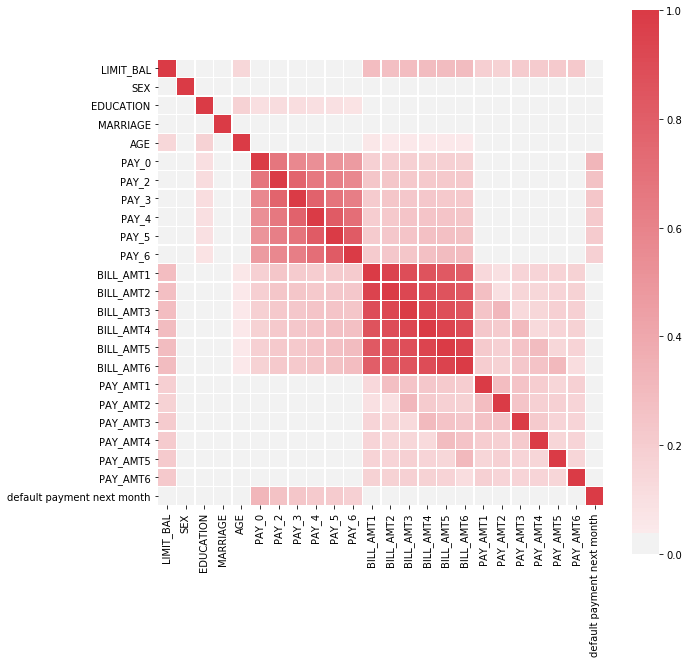

In [264]:
corr = credit.drop('ID',axis=1).corr()
f, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmin=0,vmax=1, center=0,
            square=True, linewidths=.5)


## Clustering K-Means

In [265]:
credit1 = credit.drop(columns=['ID','AGE','SEX','EDUCATION','MARRIAGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6'])
outcome = credit['default payment next month']

In [266]:
credit1.head()


LIMIT_BAL  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
0      20000       3913       3102        689          0          0   
1     120000       2682       1725       2682       3272       3455   
2      90000      29239      14027      13559      14331      14948   
3      50000      46990      48233      49291      28314      28959   
4      50000       8617       5670      35835      20940      19146   

   BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
0          0         0       689         0         0         0         0   
1       3261         0      1000      1000      1000         0      2000   
2      15549      1518      1500      1000      1000      1000      5000   
3      29547      2000      2019      1200      1100      1069      1000   
4      19131      2000     36681     10000      9000       689       679   

   default payment next month  
0                           1  
1                           1  
2                           0  
3                           0  
4                           0

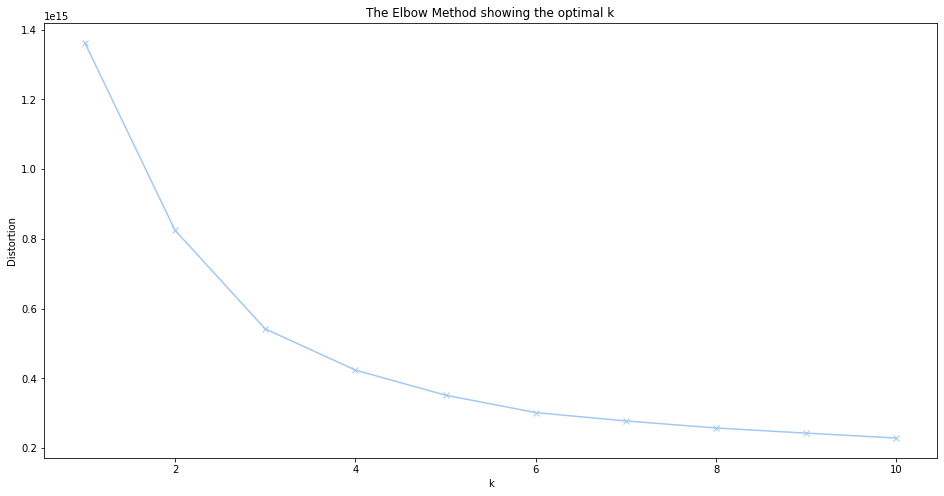

In [267]:
from sklearn.cluster import KMeans
distortions = []
K = range(1,11)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(credit1.iloc[:,0:15])
    distortions.append(kmeanModel.inertia_)
    
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [268]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(credit1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [269]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [270]:
pd.crosstab(credit1.iloc[:,-1],kmeans.labels_)

col_0                           0     1
default payment next month             
0                           19991  3373
1                            5864   772

On ne peut pas tirer une conclusion 

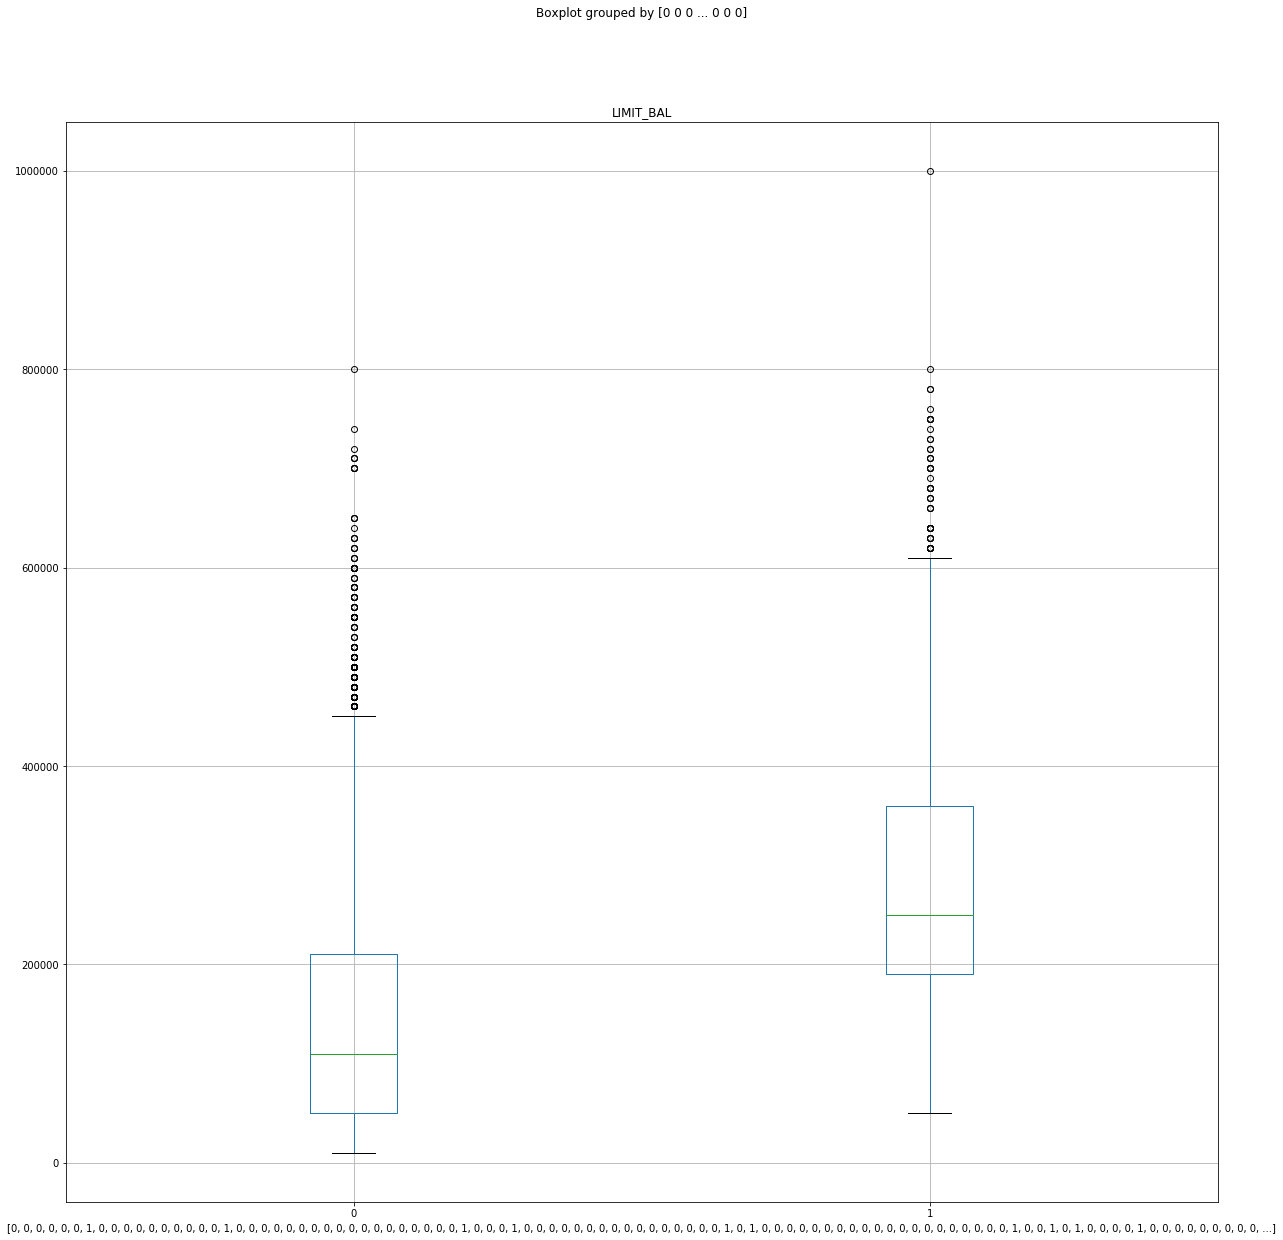

In [271]:
credit1.boxplot(column=['LIMIT_BAL'],by=kmeans.labels_,figsize=(20,20));

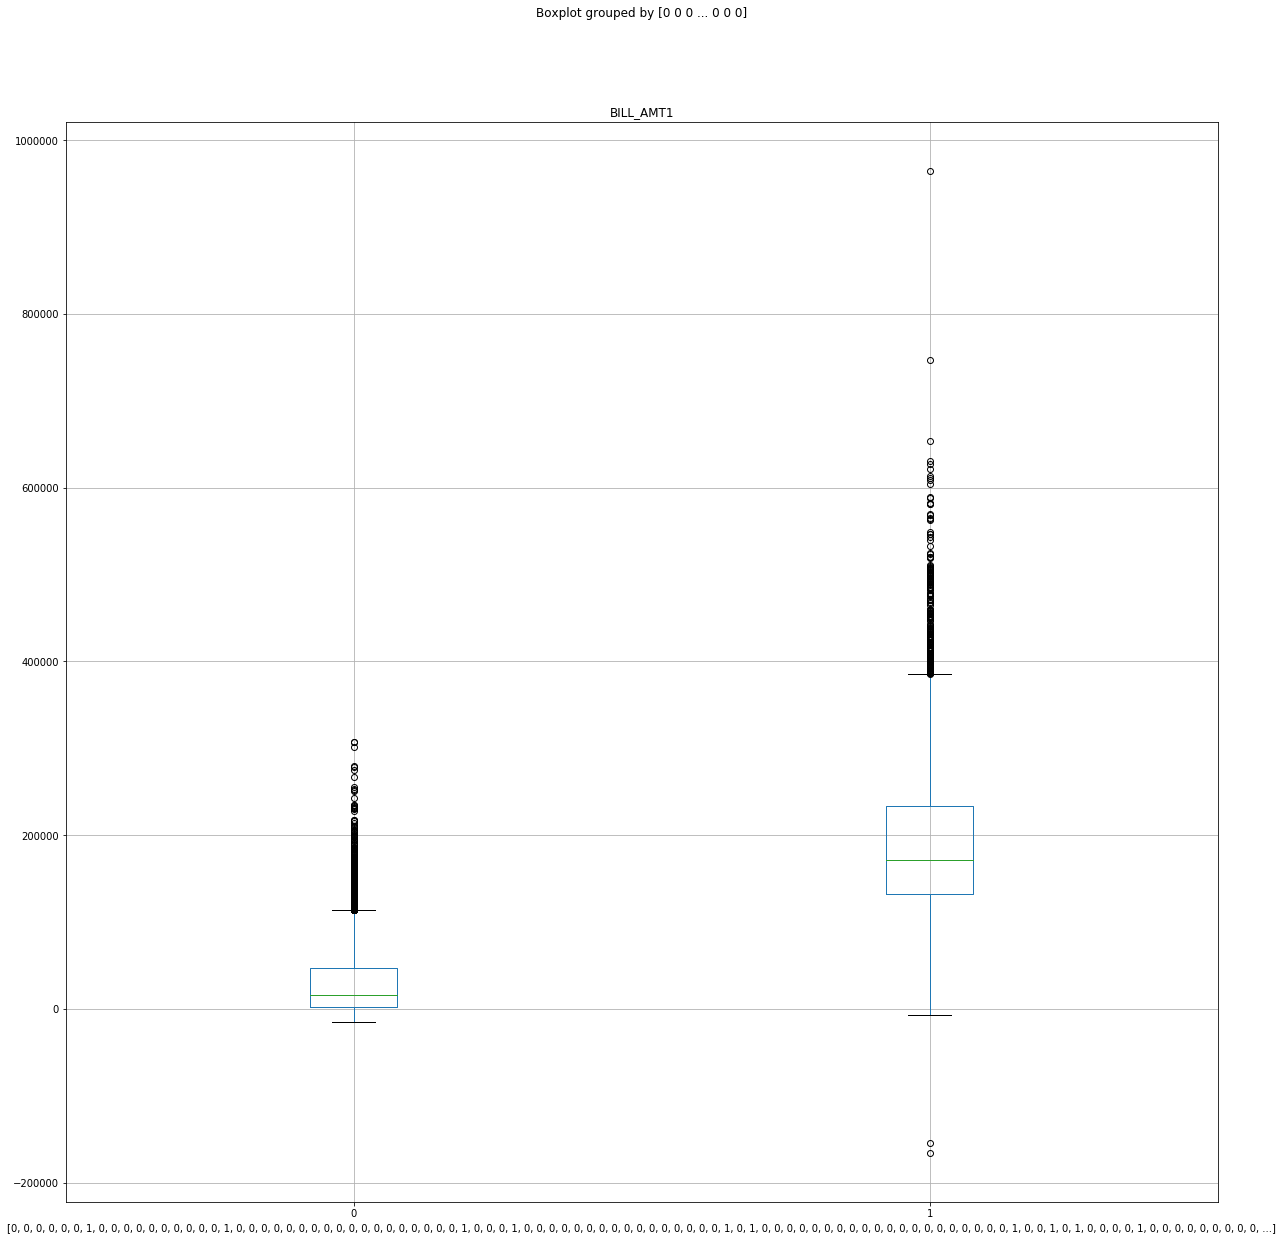

In [272]:
credit1.boxplot(column=['BILL_AMT1'],by=kmeans.labels_,figsize=(20,20));

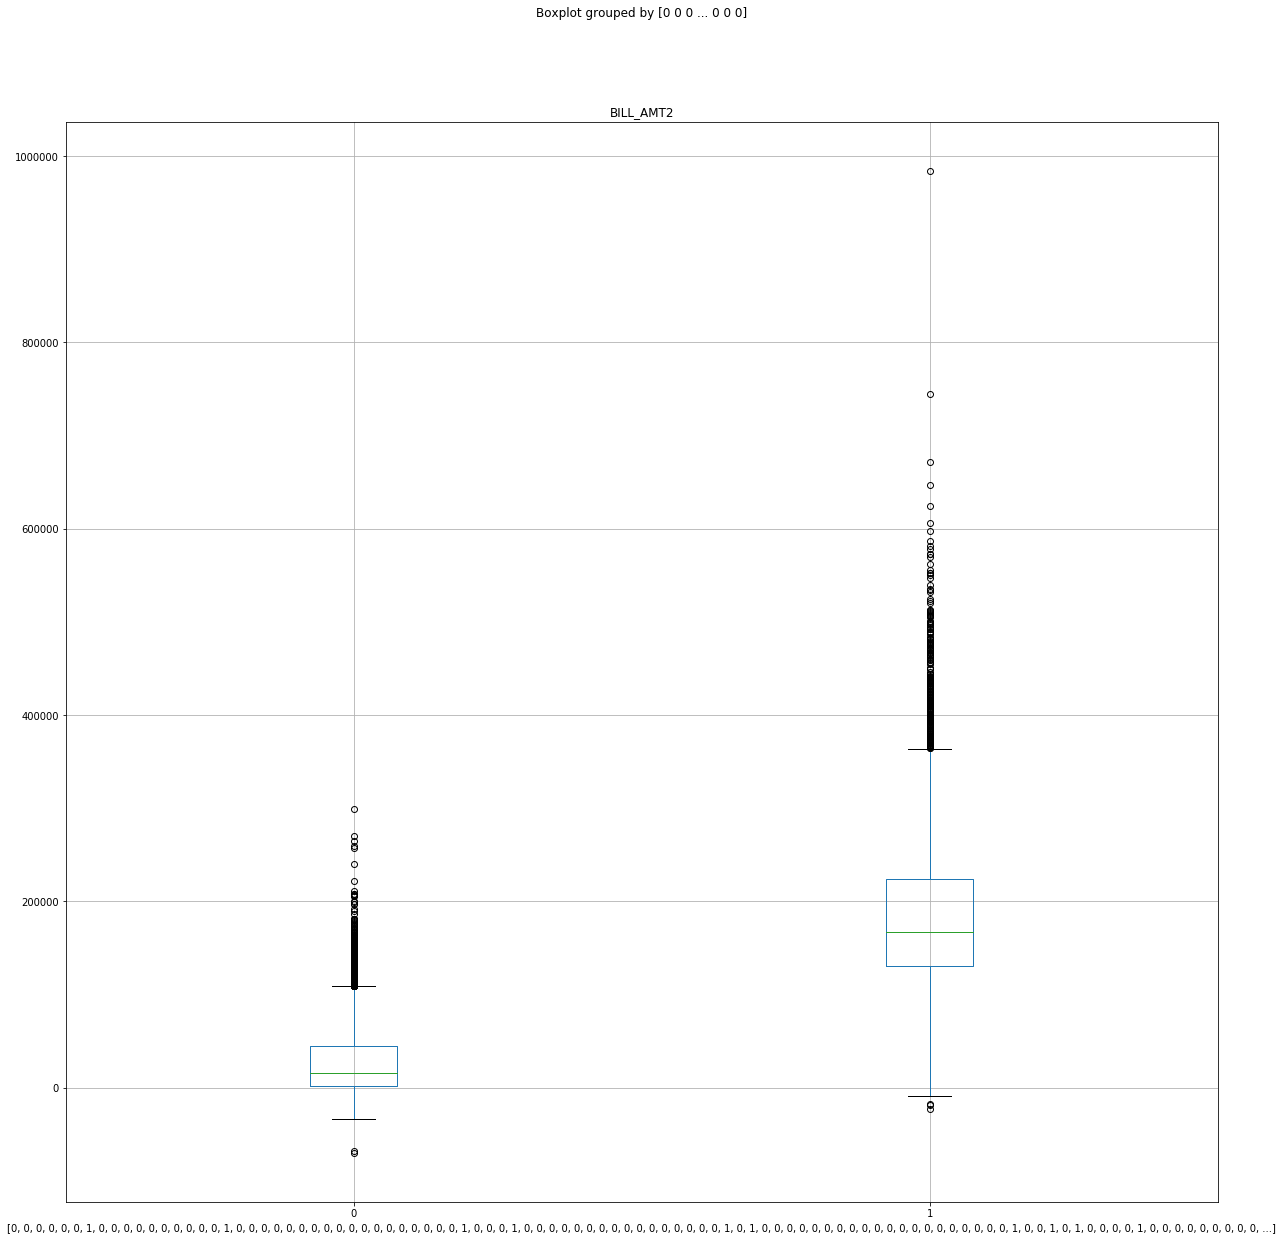

In [273]:
credit1.boxplot(column=['BILL_AMT2'],by=kmeans.labels_,figsize=(20,20));

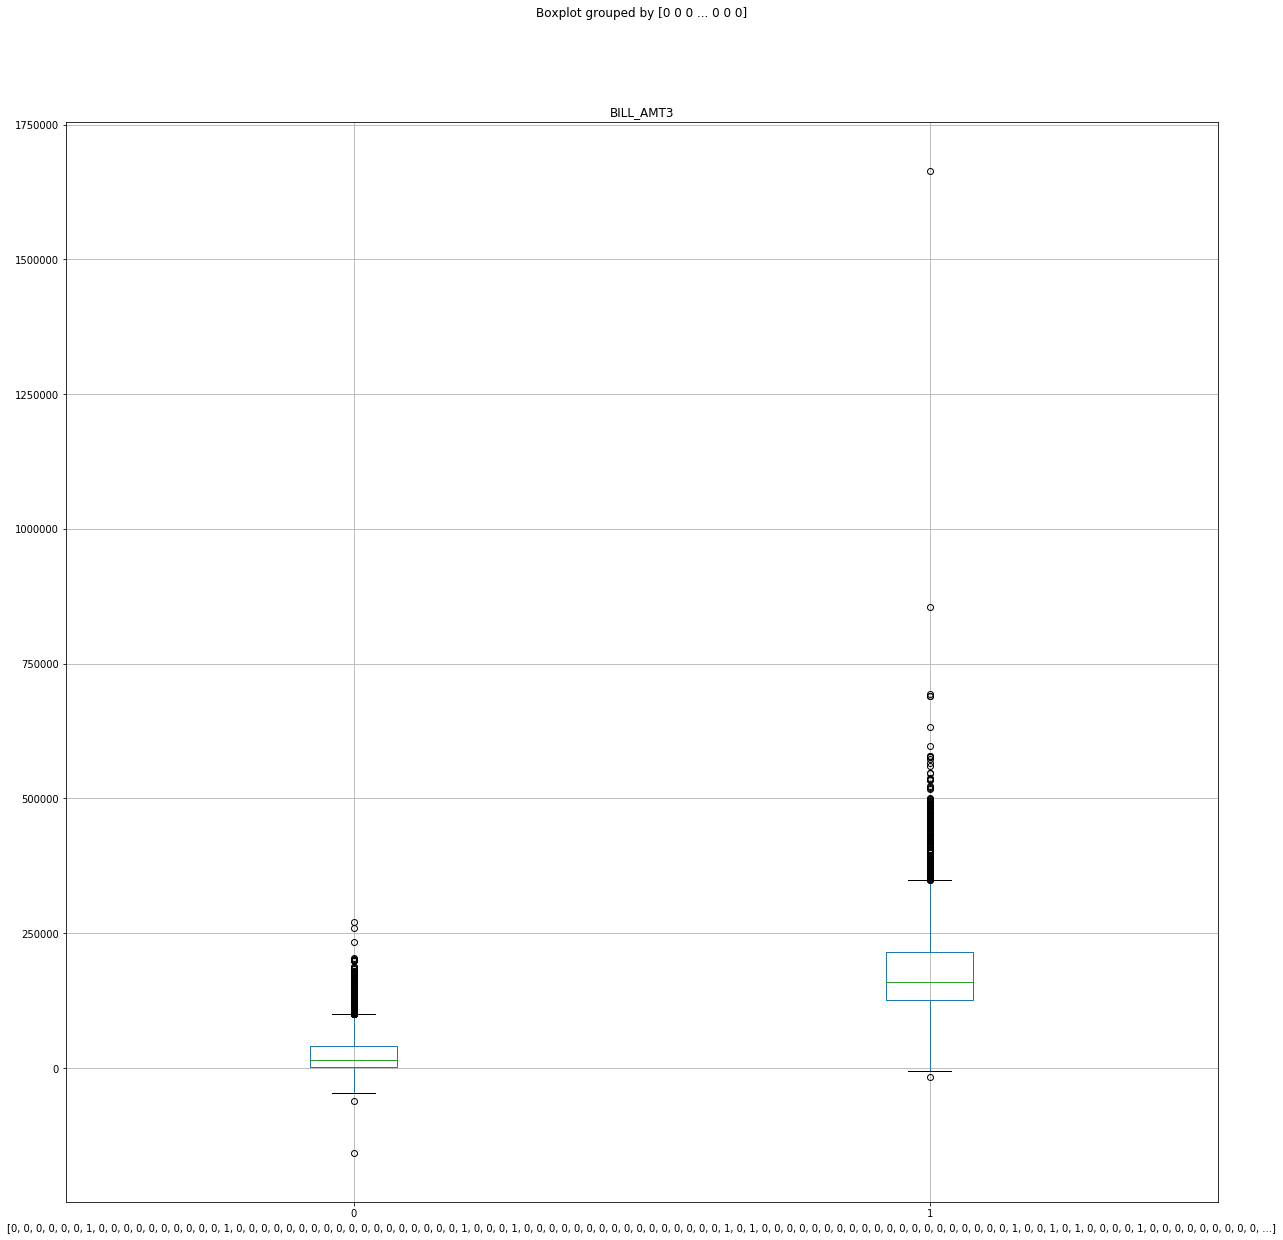

In [274]:
credit1.boxplot(column=['BILL_AMT3'],by=kmeans.labels_,figsize=(20,20));

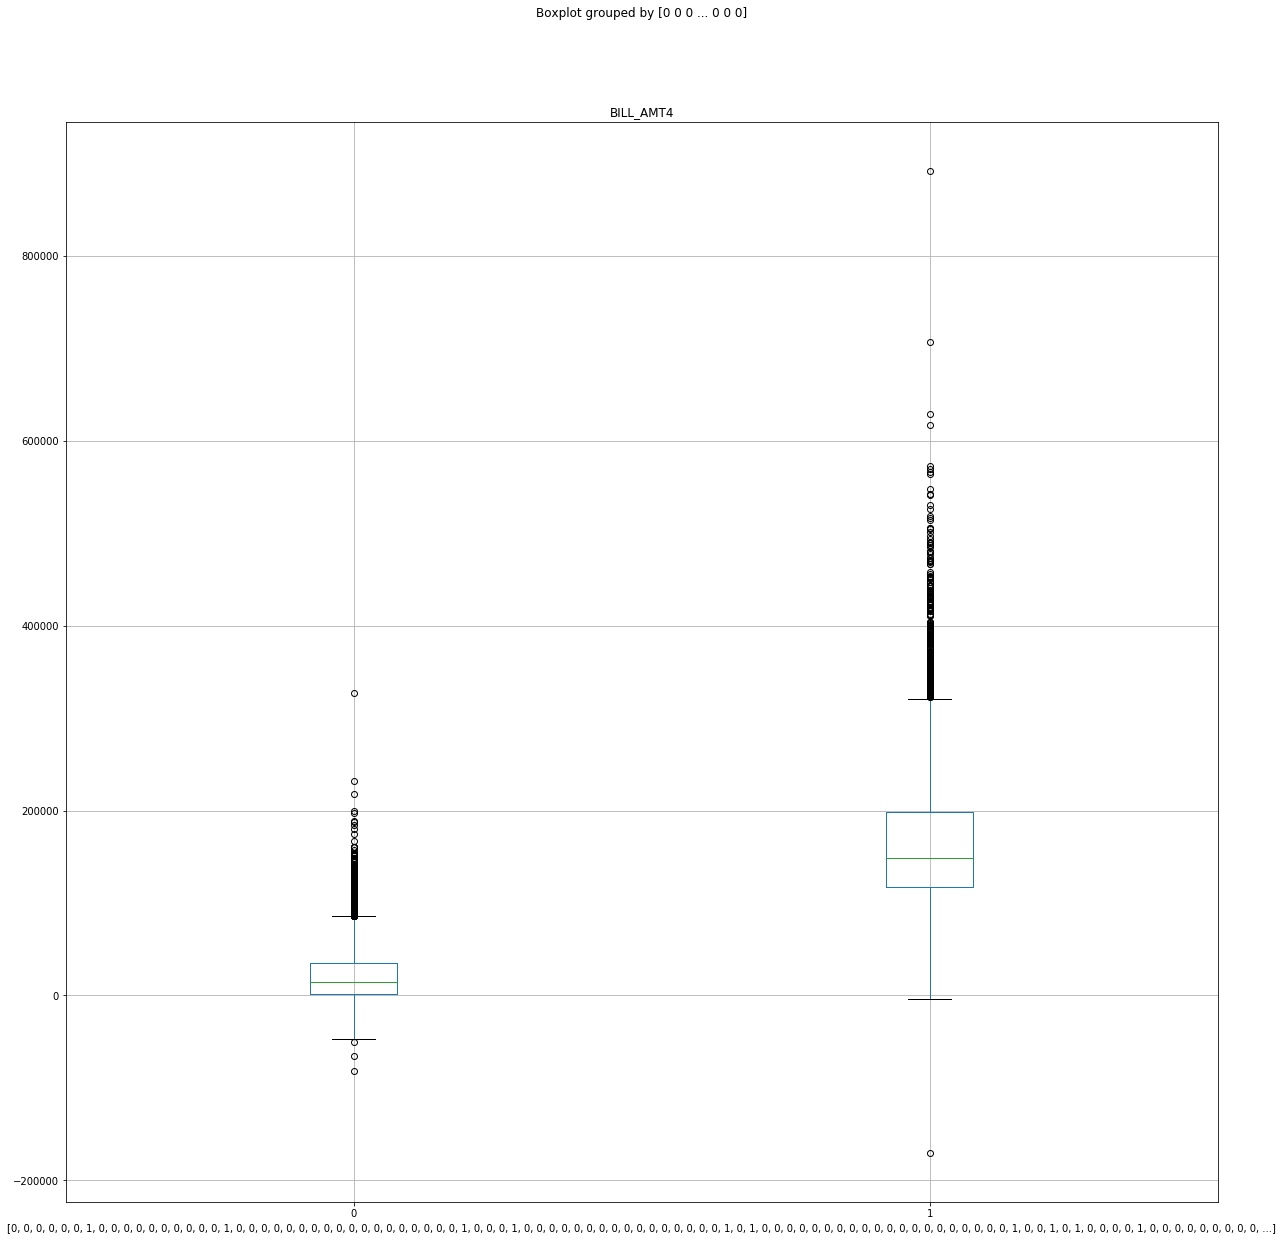

In [275]:
credit1.boxplot(column=['BILL_AMT4'],by=kmeans.labels_,figsize=(20,20));

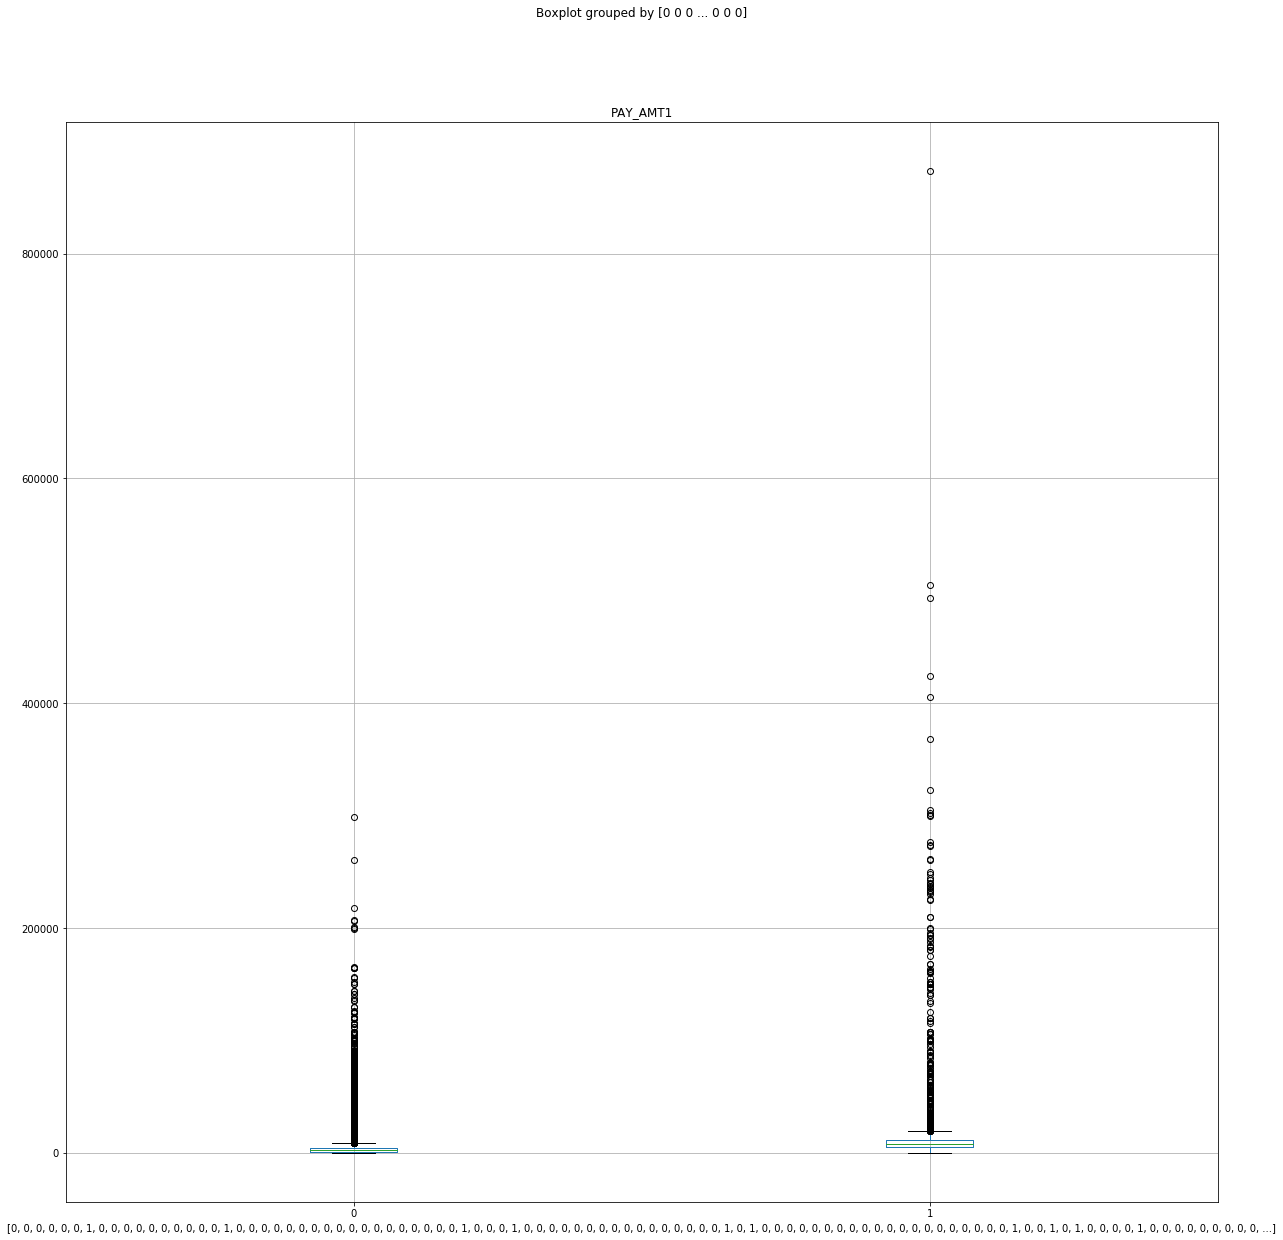

In [276]:
credit1.boxplot(column=['PAY_AMT1'],by=kmeans.labels_,figsize=(20,20));

In [277]:
from sklearn.metrics import roc_curve, auc, adjusted_rand_score
adjusted_rand_score(credit1.iloc[:,-1],kmeans.labels_)

-0.01818867416854098

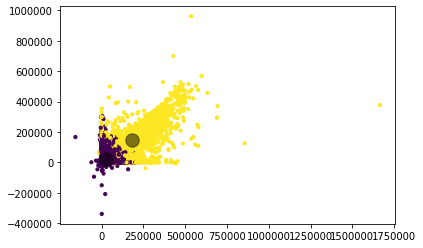

In [278]:
plt.scatter(credit1["BILL_AMT3"], credit1["BILL_AMT6"], c=kmeans.labels_, s=10, cmap='viridis');
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 3], centers[:, 6], c='black', s=180, alpha=0.5);

## ACP

In [279]:
#classe pour standardisation
from sklearn.preprocessing import StandardScaler
#instanciation
sc = StandardScaler()
#transformation–centrage-réduction
Z = sc.fit_transform(credit1)
print(Z)

[[-1.13672015 -0.64250107 -0.64739923 ... -0.31413612 -0.29338206
   1.87637834]
 [-0.3659805  -0.65921875 -0.66674657 ... -0.31413612 -0.18087821
   1.87637834]
 [-0.59720239 -0.29855966 -0.49389911 ... -0.24868274 -0.01212243
  -0.53294156]
 ...
 [-1.05964618 -0.64722711 -0.64383044 ... -0.18322937 -0.11900109
   1.87637834]
 [-0.67427636 -0.71798186  0.41026929 ...  3.15253642 -0.19190359
   1.87637834]
 [-0.90549825 -0.04473888 -0.00385085 ... -0.24868274 -0.23713013
   1.87637834]]


In [280]:
#moyenne
print(np.mean(Z,axis=0))

[-6.06329801e-17 -1.23160741e-17 -3.78956126e-17  6.25277607e-17
  5.87381995e-17 -2.36847579e-17  1.13686838e-17 -4.73695157e-18
  1.37371596e-17  2.08425869e-17  1.80004160e-17 -1.96583490e-17
 -1.78819922e-17 -8.24229573e-17]


In [281]:
#écart-type
print(np.std(Z,axis=0,ddof=0))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [282]:
#classe pour l'ACP
from sklearn.decomposition import PCA
#instanciation
acp = PCA(svd_solver='full')

In [283]:
#affichage des paramètres
print(acp)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='full', tol=0.0, whiten=False)


In [284]:
#calculs
coord = acp.fit_transform(Z)
#nombre de composantes calculées
print(acp.n_components_) 


14


## Valeurs propres et scree plot

In [285]:
#variance expliquée
print(acp.explained_variance_)

[5.91587405 1.74854649 1.01582747 0.92043107 0.88266053 0.87269435
 0.78123222 0.72636921 0.71217184 0.26401113 0.07101343 0.04105046
 0.02534347 0.02324096]


In [286]:
#valeur corrigée
n = credit1.shape[0]#nombre d'observations
p = credit1.shape[1]#nombre de variables
eigval = (n-1)/n*acp.explained_variance_
print(eigval)

[5.91567685 1.7484882  1.01579361 0.92040039 0.88263111 0.87266526
 0.78120618 0.726345   0.7121481  0.26400233 0.07101106 0.04104909
 0.02534263 0.02324019]


In [287]:
#ou bien en passant par les valeurs singulières
print(acp.singular_values_**2/n)

[5.91567685 1.7484882  1.01579361 0.92040039 0.88263111 0.87266526
 0.78120618 0.726345   0.7121481  0.26400233 0.07101106 0.04104909
 0.02534263 0.02324019]


In [288]:
#proportion de variance expliquée
print(acp.explained_variance_ratio_)

[0.42254835 0.12489201 0.07255669 0.06574289 0.06304508 0.06233323
 0.05580044 0.05188179 0.05086772 0.01885731 0.00507222 0.00293208
 0.00181019 0.00166001]


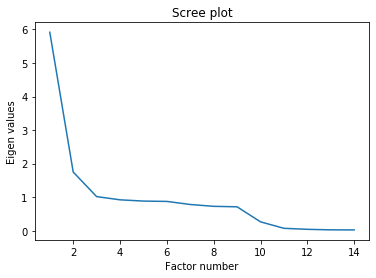

In [289]:
#scree plot
plt.plot(np.arange(1,p+1),eigval)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()

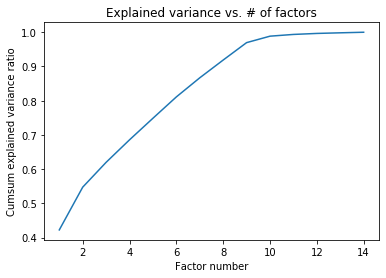

In [290]:
#cumul de variance expliquée
plt.plot(np.arange(1,p+1),np.cumsum(acp.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()

#### Détermination du nombre de facteur à retenir

In [291]:
#seuils pour test des bâtons brisés
bs = 1/np.arange(p,0,-1)
bs = np.cumsum(bs)
bs = bs[::-1]

In [292]:
#test des bâtons brisés
print(pd.DataFrame({'Val.Propre':eigval,'Seuils':bs}))

    Val.Propre    Seuils
0     5.915677  3.251562
1     1.748488  2.251562
2     1.015794  1.751562
3     0.920400  1.418229
4     0.882631  1.168229
5     0.872665  0.968229
6     0.781206  0.801562
7     0.726345  0.658705
8     0.712148  0.533705
9     0.264002  0.422594
10    0.071011  0.322594
11    0.041049  0.231685
12    0.025343  0.148352
13    0.023240  0.071429


#### Représentation des individus –Outils pour l’interprétation

In [305]:
#positionnement des individus dans le premier plan
fig, axes = plt.subplots(figsize=(40,40))
axes.set_xlim(-6,6) #même limites en abscisse
axes.set_ylim(-6,6) #et en ordonnée
#placement des étiquettes des observations
for i in range(n):
    plt.annotate(credit1.index[i],(coord[i,0],coord[i,1]))

#ajouter les axes
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)
#affichage
plt.show()

In [306]:
#contribution des individus dans l'inertie totale
di = np.sum(Z**2,axis=1)
print(pd.DataFrame({'ID':credit1.index,'d_i':di}))

          ID         d_i
0          0    7.945265
1          1    6.465205
2          2    2.014853
3          3    1.524202
4          4    4.303192
5          5    1.844035
6          6  267.004130
7          7    3.463393
8          8    2.258613
9          9    4.514510
10        10    2.823810
11        11    4.435228
12        12   15.174313
13        13    4.652376
14        14    1.198326
15        15    1.728913
16        16    6.176255
17        17  208.328506
18        18    5.775300
19        19    3.582959
20        20    4.139722
21        21    6.850222
22        22    4.428737
23        23   11.604451
24        24    2.955678
25        25    1.551636
26        26    7.435677
27        27    2.370460
28        28    6.150309
29        29    2.578121
...      ...         ...
29970  29970   19.059424
29971  29971    1.823236
29972  29972   94.430748
29973  29973    7.042586
29974  29974    6.965156
29975  29975    2.461192
29976  29976    4.845564
29977  29977   17.250576


In [307]:
#qualité de représentation des individus -COS2
cos2 = coord**2
for j in range(p):
    cos2[:,j] = cos2[:,j]/di

print(pd.DataFrame({'id':credit1.index,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1]}))

          id    COS2_1    COS2_2
0          0  0.480785  0.090425
1          1  0.467459  0.045378
2          2  0.725574  0.011813
3          3  0.188658  0.203330
4          4  0.194412  0.100478
5          5  0.153624  0.194943
6          6  0.949126  0.002514
7          7  0.882479  0.001582
8          8  0.835157  0.000353
9          9  0.620843  0.000868
10        10  0.777970  0.009312
11        11  0.095223  0.485016
12        12  0.040489  0.149299
13        13  0.001521  0.301433
14        14  0.323968  0.024499
15        15  0.321123  0.164059
16        16  0.285676  0.135126
17        17  0.199051  0.146724
18        18  0.399360  0.040155
19        19  0.852817  0.000881
20        20  0.179576  0.048504
21        21  0.498820  0.048408
22        22  0.021951  0.239395
23        23  0.109880  0.031876
24        24  0.814476  0.005565
25        25  0.257008  0.181359
26        26  0.503412  0.065811
27        27  0.619801  0.046515
28        28  0.307229  0.044221
29        

In [308]:
#vérifions la théorie -somme en ligne des cos2 = 1
print(np.sum(cos2,axis=1))

[1. 1. 1. ... 1. 1. 1.]


In [309]:
#contributions aux axes
ctr = coord**2
for j in range(p):
    ctr[:,j] = ctr[:,j]/(n*eigval[j])

print(pd.DataFrame({'id':credit1.index,'CTR_1':ctr[:,0],'CTR_2':ctr[:,1]}))

          id         CTR_1         CTR_2
0          0  2.152453e-05  1.369663e-05
1          1  1.702945e-05  5.593008e-06
2          2  8.237572e-06  4.537358e-07
3          3  1.620291e-06  5.908254e-06
4          4  4.713977e-06  8.242839e-06
5          5  1.596254e-06  6.853194e-06
6          6  1.427961e-03  1.279899e-05
7          7  1.722187e-05  1.044454e-07
8          8  1.062879e-05  1.519769e-08
9          9  1.579307e-05  7.468476e-08
10        10  1.237863e-05  5.013086e-07
11        11  2.379755e-06  4.100983e-05
12        12  3.461921e-06  4.318974e-05
13        13  3.987307e-08  2.673508e-05
14        14  2.187518e-06  5.596852e-07
15        15  3.128377e-06  5.407402e-06
16        16  9.941988e-06  1.591038e-05
17        17  2.336619e-04  5.827290e-04
18        18  1.299611e-05  4.421108e-06
19        19  1.721757e-05  6.015295e-08
20        20  4.188833e-06  3.827914e-06
21        21  1.925407e-05  6.321775e-06
22        22  5.477759e-07  2.021205e-05
23        23  7.

In [310]:
#vérifions la théorie
print(np.sum(ctr,axis=0))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


#### Représentation des variables

In [311]:
#le champ components_ de l'objet ACP
print(acp.components_)

[[ 1.65308804e-01  3.72505607e-01  3.83331795e-01  3.88355470e-01
   3.91652601e-01  3.88599718e-01  3.80761961e-01  1.35433766e-01
   1.17035969e-01  1.28282878e-01  1.17152925e-01  1.14006103e-01
   1.05726458e-01 -1.92785191e-02]
 [ 3.06628850e-01 -1.85462548e-01 -1.70729399e-01 -1.25485325e-01
  -1.19928741e-01 -1.06447322e-01 -9.51673533e-02  3.74784516e-01
   3.95738905e-01  3.79643815e-01  3.40274955e-01  2.97540007e-01
   3.16233329e-01 -2.15392149e-01]
 [-3.54270770e-01 -8.05989898e-02 -4.02090984e-02  1.56843911e-02
   2.75899431e-02  3.03203626e-02  8.94525675e-03  2.17354988e-01
   2.93371640e-01  2.32644971e-01  1.01325412e-01 -8.54124896e-02
  -7.80483140e-02  8.08260627e-01]
 [-1.81699565e-01 -3.76347218e-02  3.33672963e-02  7.55346366e-02
   7.66276491e-02  3.22465980e-02 -8.18019751e-02  3.62044071e-01
   3.01786707e-01  1.65394525e-01 -1.49497328e-01 -6.27321899e-01
  -3.22397297e-01 -4.19306723e-01]
 [ 2.18166535e-02  3.73616888e-02  7.58129612e-02  1.13798025e-01
  

In [312]:
#racine carrée des valeurs propres
sqrt_eigval = np.sqrt(eigval)

In [313]:
#corrélation des variables avec les axes
corvar = np.zeros((p,p))
for k in range(p):
    corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]

#afficher la matrice des corrélations variables x facteurs 
print(corvar)

[[ 4.02066792e-01  4.05456593e-01 -3.57057417e-01 -1.74318020e-01
   2.04964077e-02 -8.04683734e-02  1.53388078e-01  1.34338755e-01
  -6.83678463e-01 -1.31213965e-02 -1.60389764e-03  3.02805369e-03
  -1.02415601e-04  4.95716564e-04]
 [ 9.06014264e-01 -2.45237892e-01 -8.12329707e-02 -3.61058113e-02
   3.51007272e-02 -3.99455554e-02  3.59091239e-03  4.58055526e-03
   2.27213832e-02  2.90758384e-01  1.10857878e-01 -8.77469835e-02
  -2.92234966e-02 -4.82991294e-02]
 [ 9.32345897e-01 -2.25756188e-01 -4.05253778e-02  3.20117499e-02
   7.12251013e-02 -2.71659685e-02 -3.17046120e-02 -1.15471295e-01
  -7.59405114e-03  1.98692989e-01  1.02450202e-02  6.98418215e-02
   5.23814320e-02  9.84133032e-02]
 [ 9.44564561e-01 -1.65929763e-01  1.58077624e-02  7.24660421e-02
   1.06911480e-01  8.90151205e-02 -1.05361016e-01  8.30569488e-02
   9.64572571e-04  6.30345161e-02 -1.29151492e-01  1.00497298e-01
  -1.36929815e-02 -8.04309700e-02]
 [ 9.52583899e-01 -1.58582270e-01  2.78069620e-02  7.35146509e-02
  

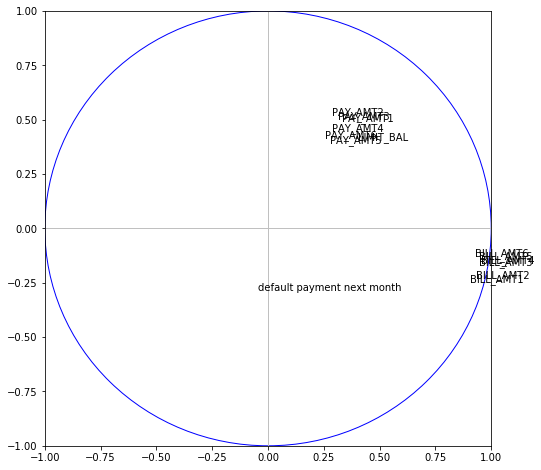

In [314]:
#cercle des corrélations
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
#affichage des étiquettes(noms des variables)
for j in range(p):
    plt.annotate(credit1.columns[j],(corvar[j,0],corvar[j,1]))

#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)
#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)
#affichage
plt.show()

#### Qualité  de  représentation  des  variables  (COS²).  

In [315]:
#cosinus carré des variables
cos2var = corvar**2
print(pd.DataFrame({'id':credit1.columns,'COS2_1':cos2var[:,0],'COS2_2':cos2var[:,1]}))

                            id    COS2_1    COS2_2
0                    LIMIT_BAL  0.161658  0.164395
1                    BILL_AMT1  0.820862  0.060142
2                    BILL_AMT2  0.869269  0.050966
3                    BILL_AMT3  0.892202  0.027533
4                    BILL_AMT4  0.907416  0.025148
5                    BILL_AMT5  0.893325  0.019812
6                    BILL_AMT6  0.857653  0.015836
7                     PAY_AMT1  0.108507  0.245599
8                     PAY_AMT2  0.081029  0.273829
9                     PAY_AMT3  0.097351  0.252009
10                    PAY_AMT4  0.081192  0.202452
11                    PAY_AMT5  0.076888  0.154794
12                    PAY_AMT6  0.066126  0.174855
13  default payment next month  0.002199  0.081119


#### Contribution des variables aux axes (CTR)

In [316]:
#contributions
ctrvar = cos2var
for k in range(p):
    ctrvar[:,k] = ctrvar[:,k]/eigval[k]
#on n'affiche que pour les deux premiers axes
print(pd.DataFrame({'id':credit1.columns,'CTR_1':ctrvar[:,0],'CTR_2':ctrvar[:,1]}))

                            id     CTR_1     CTR_2
0                    LIMIT_BAL  0.027327  0.094021
1                    BILL_AMT1  0.138760  0.034396
2                    BILL_AMT2  0.146943  0.029149
3                    BILL_AMT3  0.150820  0.015747
4                    BILL_AMT4  0.153392  0.014383
5                    BILL_AMT5  0.151010  0.011331
6                    BILL_AMT6  0.144980  0.009057
7                     PAY_AMT1  0.018342  0.140463
8                     PAY_AMT2  0.013697  0.156609
9                     PAY_AMT3  0.016456  0.144129
10                    PAY_AMT4  0.013725  0.115787
11                    PAY_AMT5  0.012997  0.088530
12                    PAY_AMT6  0.011178  0.100004
13  default payment next month  0.000372  0.046394


## Supervised learning

In [317]:
#on choisi les variable non corrélées
y = credit.drop(columns=['ID','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5'
                        ,'BILL_AMT6','default payment next month'],axis=1 )
y;

In [318]:
X_train, X_test, y_train, y_test = train_test_split(y, outcome, random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

Text(0, 0.5, 'Erreur')

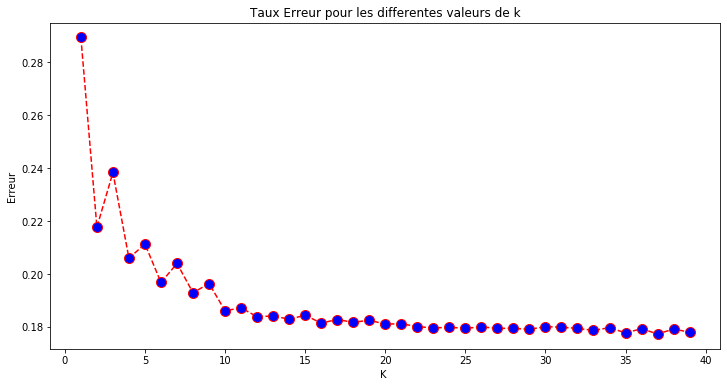

In [319]:
from sklearn.neighbors import KNeighborsClassifier
error = []
# Calculer l'erreur pour k entre 1 et 40 
#Pour chaque itération, l'erreur moyenne pour les valeurs prédites 
#de l'ensemble de test est calculée et sauvegardée ds la liste Erreur.
for i in range(1, 40):
    knn = KNeighborsClassifier(i)
    knn_model = knn.fit(X_train, y_train)
    pred_i = knn_model.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Taux Erreur pour les differentes valeurs de k')
plt.xlabel('K ')
plt.ylabel('Erreur')

K optimal =37

In [320]:
knn = KNeighborsClassifier(37)
knn_model = knn.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

In [321]:
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.82
Accuracy of K-NN classifier on test set: 0.82


In [322]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_knn))

[[5666  202]
 [1128  504]]


In [323]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89      5868
           1       0.71      0.31      0.43      1632

    accuracy                           0.82      7500
   macro avg       0.77      0.64      0.66      7500
weighted avg       0.81      0.82      0.79      7500



In [324]:
#Les arbres de décision: Appliquer CART et Random Forest

In [325]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc_model = DecisionTreeClassifier().fit(X_train, y_train)
y_pred_dtc = dtc_model.predict(X_test)

In [326]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc_model = rfc.fit(X_train, y_train)
y_pred_rfc = rfc_model.predict(X_test)

/home/autonome/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [327]:
print('Accuracy of Random Forest classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of Random Forest classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of Random Forest classifier on training set: 0.82
Accuracy of Random Forest classifier on test set: 0.82


In [328]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_rfc))

[[5653  215]
 [1386  246]]


In [329]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.80      0.96      0.88      5868
           1       0.53      0.15      0.24      1632

    accuracy                           0.79      7500
   macro avg       0.67      0.56      0.56      7500
weighted avg       0.74      0.79      0.74      7500



In [330]:
#Affichage avec la bibliothèque graphique intégrée à Notebook
%matplotlib inline

from sklearn.metrics import roc_curve, auc

In [331]:
fpr1, tpr1, threshold1 = roc_curve(y_test, y_pred_dtc) 
roc_auc1 = auc(fpr1, tpr1)
fpr2, tpr2, threshold2 = roc_curve(y_test, y_pred_rfc) 
roc_auc2 = auc(fpr2, tpr2)
fpr3, tpr3, threshold3 = roc_curve(y_test, y_pred_knn)
roc_auc3 = auc(fpr3, tpr3)

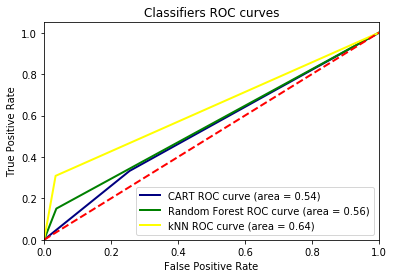

In [332]:
plt.figure() 
plt.plot(fpr1, tpr1, color='navy', lw=2, label='CART ROC curve (area = %0.2f)'% roc_auc1)
plt.plot(fpr2, tpr2, color='green', lw=2, label='Random Forest ROC curve (area = %0.2f)'% roc_auc2)
plt.plot(fpr3, tpr3, color='yellow', lw=2, label='kNN ROC curve (area = %0.2f)'% roc_auc3)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--') 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Classifiers ROC curves') 
plt.legend(loc = "lower right")
plt.show()

## Random Forest


In [333]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
X = data
Y = outcome

x_train,x_test,y_train,y_test = train_test_split(data,outcome,test_size=0.25,random_state=0)
clf = RandomForestClassifier(random_state=41)
clf.fit(x_train,y_train)
score = clf.score(x_test,y_test)
print ("Score : %{} using {}".format(score*100, 'RandomForestClassifier'))

clf = GradientBoostingClassifier(random_state=41,n_estimators=10,max_depth=4)
clf.fit(x_train,y_train)
score = clf.score(x_test,y_test)
print ("Score : %{} using {}".format(score*100, 'GradientBoostingClassifier'))

clf = AdaBoostClassifier(random_state=41,n_estimators=15)
clf.fit(x_train,y_train)
score = clf.score(x_test,y_test)
print ("Score : %{} using {}".format(score*100, 'AdaBoostClassifier'))

# adding setting the max_leaf_nodes imporved the acccuracy from 78 to 82 
clf = DecisionTreeClassifier(random_state=41,max_leaf_nodes=3)
clf.fit(x_train,y_train)
score = clf.score(x_test,y_test)
print ("Score : %{} using {}".format(score*100, 'DecisionTreeClassifier'))

/home/autonome/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Score : %81.10666666666667 using RandomForestClassifier
Score : %81.92 using GradientBoostingClassifier
Score : %82.13333333333334 using AdaBoostClassifier
Score : %82.69333333333333 using DecisionTreeClassifier


Dropping one month at a time : To see how much the enhancment that the 6 month data bring to the algorithim so i decide to drop all the data that belong to the 6th month and run Ada Boost Classifier... the accuracy dropped in 0.3% only that was better than what i was expected and that was due to the correlation we found earlier...after that i decide to have a loop and remove month on each loop and the algorithm did fine because my target to see from 2 or 3 month .

In [334]:
from sklearn.model_selection import GridSearchCV
columns_to_drop =['PAY_AMT', 'BILL_AMT','PAY_']

parameters = {'n_estimators':[5,10,15,20], 'learning_rate':[0.3, 0.5,0.75,1]}
X = data.drop(['ID'],axis=1)
for i in range(6,2,-1):
    for x in range(0,len(columns_to_drop)):
        X = X.drop(columns_to_drop[x]+str(i),axis=1)
adaboost = AdaBoostClassifier(random_state=41)
clf = GridSearchCV(adaboost, parameters)
clf.fit(x_train, y_train)
clf.score(x_test,y_test)
clf.best_params_

/home/autonome/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'learning_rate': 0.75, 'n_estimators': 15}

In [335]:
adaboost = AdaBoostClassifier(random_state=41,learning_rate=0.3,n_estimators=5)
adaboost.fit(x_train, y_train)
adaboost.score(x_test,y_test)

0.8154666666666667

Result : I think the model did pretty well with having data only from the first two month and was able to predict with 82.6% accuracy and that what i was targetting

### Logistic Regression

In [336]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [337]:
from sklearn.model_selection import train_test_split


all_X = credit
all_y = outcome

train_X, test_X, train_y, test_y = train_test_split(
   all_X, all_y, test_size=0.2,random_state=0)

In [338]:
from sklearn.model_selection import cross_val_score
import numpy as np

lr = LogisticRegression()
scores = cross_val_score(lr, all_X, all_y, cv=10)
np.mean(scores)

/home/autonome/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/autonome/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/autonome/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/autonome/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/autonome/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed

0.7788000247851878

## Bank of America

In [339]:
Bank_America = pd.read_csv("Bank_of_America_data.csv")

In [340]:
Bank_America.head()

BAD  LOAN  MORTDUE     VALUE   REASON     JOB   YOJ  DEROG  DELINQ  \
0    1  1100  25860.0   39025.0  HomeImp   Other  10.5    0.0     0.0   
1    1  1300  70053.0   68400.0  HomeImp   Other   7.0    0.0     2.0   
2    1  1500  13500.0   16700.0  HomeImp   Other   4.0    0.0     0.0   
3    1  1500      NaN       NaN      NaN     NaN   NaN    NaN     NaN   
4    0  1700  97800.0  112000.0  HomeImp  Office   3.0    0.0     0.0   

        CLAGE  NINQ  CLNO  DEBTINC  
0   94.366667   1.0   9.0      NaN  
1  121.833333   0.0  14.0      NaN  
2  149.466667   1.0  10.0      NaN  
3         NaN   NaN   NaN      NaN  
4   93.333333   0.0  14.0      NaN

thresh=6 requires that a column has at least 6 non-NaNs to survive

In [341]:
Bank_America_1=Bank_America.dropna(thresh=6)  
Bank_America_1

BAD   LOAN   MORTDUE     VALUE   REASON      JOB   YOJ  DEROG  DELINQ  \
0       1   1100   25860.0   39025.0  HomeImp    Other  10.5    0.0     0.0   
1       1   1300   70053.0   68400.0  HomeImp    Other   7.0    0.0     2.0   
2       1   1500   13500.0   16700.0  HomeImp    Other   4.0    0.0     0.0   
4       0   1700   97800.0  112000.0  HomeImp   Office   3.0    0.0     0.0   
5       1   1700   30548.0   40320.0  HomeImp    Other   9.0    0.0     0.0   
6       1   1800   48649.0   57037.0  HomeImp    Other   5.0    3.0     2.0   
7       1   1800   28502.0   43034.0  HomeImp    Other  11.0    0.0     0.0   
8       1   2000   32700.0   46740.0  HomeImp    Other   3.0    0.0     2.0   
9       1   2000       NaN   62250.0  HomeImp    Sales  16.0    0.0     0.0   
11      1   2000   20627.0   29800.0  HomeImp   Office  11.0    0.0     1.0   
12      1   2000   45000.0   55000.0  HomeImp    Other   3.0    0.0     0.0   
13      0   2000   64536.0   87400.0      NaN      Mgr   2.5    0.0     0.0   
14      1   2100   71000.0   83850.0  HomeImp    Other   8.0    0.0     1.0   
15      1   2200   24280.0   34687.0  HomeImp    Other   NaN    0.0     1.0   
16      1   2200   90957.0  102600.0  HomeImp      Mgr   7.0    2.0     6.0   
18      1   2300   28192.0   40150.0  HomeImp    Other   4.5    0.0     0.0   
19      0   2300  102370.0  120953.0  HomeImp   Office   2.0    0.0     0.0   
20      1   2300   37626.0   46200.0  HomeImp    Other   3.0    0.0     1.0   
21      1   2400   50000.0   73395.0  HomeImp  ProfExe   5.0    1.0     0.0   
22      1   2400   28000.0   40800.0  HomeImp      Mgr  12.0    0.0     0.0   
23      1   2400   18000.0       NaN  HomeImp      Mgr  22.0    NaN     2.0   
24      1   2400       NaN   17180.0  HomeImp    Other   NaN    0.0     0.0   
25      1   2400   34863.0   47471.0  HomeImp      Mgr  12.0    0.0     0.0   
26      0   2400   98449.0  117195.0  HomeImp   Office   4.0    0.0     0.0   
27      1   2500   15000.0   20200.0  HomeImp      NaN  18.0    0.0     0.0   
28      1   2500   25116.0   36350.0  HomeImp    Other  10.0    1.0     2.0   
29      0   2500    7229.0   44516.0  HomeImp     Self   NaN    0.0     0.0   
30      0   2500   71408.0   78600.0  HomeImp  ProfExe   8.0    0.0     0.0   
31      1   2800   50795.0   63100.0  HomeImp     Self  26.0    2.0    15.0   
32      1   2800    4000.0   60850.0  HomeImp    Other  16.0    4.0     0.0   
...   ...    ...       ...       ...      ...      ...   ...    ...     ...   
5930    1  72300       NaN   85000.0  DebtCon    Other   1.0    0.0     0.0   
5931    1  75400       NaN   89609.0  DebtCon    Other   1.0    0.0     0.0   
5932    1  76500   38206.0   90000.0  DebtCon    Other  12.0    0.0     0.0   
5933    1  77200   83962.0  215000.0  HomeImp     Self   8.0    1.0     2.0   
5934    1  77400   87651.0  224630.0  HomeImp     Self   9.0    0.0     2.0   
5935    0  78400   13900.0  102910.0  HomeImp      NaN  27.0    0.0     1.0   
5936    0  78700   22762.0  102997.0  HomeImp      NaN  25.0    0.0     0.0   
5937    0  79100   23553.0  103807.0  HomeImp      NaN  25.0    0.0     1.0   
5938    0  79200   21694.0  103143.0  HomeImp      NaN  26.0    0.0     1.0   
5939    0  79200   22940.0  110114.0  HomeImp      NaN  28.0    0.0     1.0   
5940    0  79900   18363.0  109675.0  HomeImp      NaN  27.0    0.0     1.0   
5941    0  80300   20370.0  109127.0  HomeImp      NaN  27.0    0.0     1.0   
5942    0  80600   16337.0  109370.0  HomeImp      NaN  28.0    0.0     0.0   
5943    0  81200   18834.0  108355.0  HomeImp      NaN  28.0    0.0     0.0   
5944    0  81400   22344.0  108280.0  HomeImp      NaN  25.0    0.0     0.0   
5945    0  81400   21041.0  111304.0  HomeImp      NaN  26.0    0.0     0.0   
5946    0  82200   16097.0  111287.0  HomeImp      NaN  26.0    0.0     0.0   
5947    0  82200   23197.0  110481.0  HomeImp      NaN  26.0    0.0     1.0   
5948    0  86000   47355.0   85000.0  DebtCon    Other  

In [342]:
Bank_America_1['JOB'].value_counts()

Other      2384
ProfExe    1274
Office      948
Mgr         767
Self        193
Sales       109
Name: JOB, dtype: int64

In [343]:
values = {'JOB': 'Other'}
Bank_America_1=Bank_America_1.fillna(value=values)    #We will replace the missing values with the Other job other = 2384 

In [344]:
25860.0/39025.0

0.6626521460602178

In [345]:
30548.0/40320.0

0.7576388888888889

In [346]:
70053.0/68400.0

1.0241666666666667

In [347]:
97800.0/112000.0

0.8732142857142857

In [348]:
13500.0/16700.0

0.8083832335329342

In [349]:
50370.0/91861.0

0.5483284527710345

We are going to replace the missing values of the MORTDUE column by 0.7 * the value of the VALUE column of the same line (because we noticed that this is almost the case for the other present values)

In [350]:
Bank_America_1['MORTDUE'] = Bank_America_1['MORTDUE'].fillna(value=Bank_America_1['VALUE']*0.7)

We will replace the missing values in the VALUE column with 1.3 * the value in the MORTDUE column of the same line (because we noticed that this is almost the case for the other values present)

In [351]:
Bank_America_1['VALUE'] = Bank_America_1['VALUE'].fillna(value=Bank_America_1['MORTDUE']*1.3) 


In [352]:
Bank_America_1.isnull().sum(axis = 0)

BAD           0
LOAN          0
MORTDUE      15
VALUE        15
REASON      167
JOB           0
YOJ         418
DEROG       607
DELINQ      479
CLAGE       207
NINQ        409
CLNO        121
DEBTINC    1244
dtype: int64

We are going to delete the 15 rows that we could not replace their MORTDUE and VALUE columns since these two columns have neither a value in MORTDUE nor in VALUE

In [353]:
Bank_America_1.dropna(subset=["MORTDUE"],inplace=True)
Bank_America_1.dropna(subset=["VALUE"],inplace=True)

In [354]:
Bank_America_1.isnull().sum(axis = 0)

BAD           0
LOAN          0
MORTDUE       0
VALUE         0
REASON      165
JOB           0
YOJ         418
DEROG       603
DELINQ      476
CLAGE       206
NINQ        408
CLNO        121
DEBTINC    1233
dtype: int64

Profiling : We will do a processing that will allow us to fill in the missing REASON values and this by looking for the majority of customers with a profile similar to this customer's profile and then we assign the REASON value of the majority to this empty field

In [355]:
for index,row in Bank_America_1.iterrows():
    if (pd.isnull(row["REASON"])):
        x=Bank_America_1["LOAN"][index]
        y=Bank_America_1["MORTDUE"][index]
        z=Bank_America_1["VALUE"][index]
        d=Bank_America_1.loc[(Bank_America_1["LOAN"]<x*1.3)&(x*0.7<Bank_America_1["LOAN"])&(Bank_America_1["MORTDUE"]<y*1.3)&(y*0.7<Bank_America_1["MORTDUE"])&(Bank_America_1["VALUE"]<z*1.3)&(z*0.7<Bank_America_1["VALUE"])]
        d1=d.loc[(d["REASON"]=="HomeImp")]
        s1=d1.shape[0]
        d2=d.loc[(d["REASON"]=="DebtCon")]
        s2=d2.shape[0]
        if(s1>s2):
            Bank_America_1["REASON"][index]=d1.iloc[0]["REASON"]
        elif (s2>s1):
            Bank_America_1["REASON"][index]=d2.iloc[0]["REASON"]

/home/autonome/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/home/autonome/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [356]:
Bank_America_1.isnull().sum(axis = 0)

BAD           0
LOAN          0
MORTDUE       0
VALUE         0
REASON        0
JOB           0
YOJ         418
DEROG       603
DELINQ      476
CLAGE       206
NINQ        408
CLNO        121
DEBTINC    1233
dtype: int64


We will do a processing that will allow us to fill in the missing values of YOJ and this by looking for the majority of customers with a profile similar to the profile of this customer and we calculate their median then we assign the value of the median to this empty field

In [357]:
for index,row in Bank_America_1.iterrows():
    if (pd.isnull(row["YOJ"])):
        x=Bank_America_1["LOAN"][index]
        y=Bank_America_1["MORTDUE"][index]
        z=Bank_America_1["VALUE"][index]
        t=Bank_America_1["REASON"][index]
        v=Bank_America_1["JOB"][index]
        d=Bank_America_1.loc[(pd.notna(Bank_America_1["YOJ"]))&(Bank_America_1["JOB"]==v)&(Bank_America_1["REASON"]==t)&(Bank_America_1["LOAN"]<x*1.3)&(x*0.7<Bank_America_1["LOAN"])&(Bank_America_1["MORTDUE"]<y*1.3)&(y*0.7<Bank_America_1["MORTDUE"])&(Bank_America_1["VALUE"]<z*1.3)&(z*0.7<Bank_America_1["VALUE"])]
        l=np.median(d["YOJ"])
        
        if np.isnan(l):
            l=2.0
        Bank_America_1["YOJ"][index]=round(l, 1)

/home/autonome/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/home/autonome/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/autonome/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [358]:
Bank_America_1.isnull().sum(axis = 0)

BAD           0
LOAN          0
MORTDUE       0
VALUE         0
REASON        0
JOB           0
YOJ           0
DEROG       603
DELINQ      476
CLAGE       206
NINQ        408
CLNO        121
DEBTINC    1233
dtype: int64

In [359]:
Bank_America_1['DEROG'].value_counts()

0.0     4519
1.0      434
2.0      158
3.0       58
4.0       23
6.0       15
5.0       15
7.0        8
8.0        6
9.0        3
10.0       2
Name: DEROG, dtype: int64

In [360]:
# Meme principe que la précédente
for index,row in Bank_America_1.iterrows():
    if (pd.isnull(row["DEROG"])):
        x=Bank_America_1["LOAN"][index]
        y=Bank_America_1["MORTDUE"][index]
        z=Bank_America_1["VALUE"][index]
        t=Bank_America_1["REASON"][index]
        v=Bank_America_1["JOB"][index]
        d=Bank_America_1.loc[(pd.notna(Bank_America_1["DEROG"]))&(Bank_America_1["JOB"]==v)&(Bank_America_1["REASON"]==t)&(Bank_America_1["LOAN"]<x*1.3)&(x*0.7<Bank_America_1["LOAN"])&(Bank_America_1["MORTDUE"]<y*1.3)&(y*0.7<Bank_America_1["MORTDUE"])&(Bank_America_1["VALUE"]<z*1.3)&(z*0.7<Bank_America_1["VALUE"])]
        if len(d)!=0:
            l=d["DEROG"].iloc[0]
            
        else:
            l=0.0 
        Bank_America_1["DEROG"][index]=round(l, 1)

/home/autonome/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [361]:
Bank_America_1.isnull().sum(axis = 0)

BAD           0
LOAN          0
MORTDUE       0
VALUE         0
REASON        0
JOB           0
YOJ           0
DEROG         0
DELINQ      476
CLAGE       206
NINQ        408
CLNO        121
DEBTINC    1233
dtype: int64

In [362]:
l=np.median(d["DELINQ"])
l

0.0

In [363]:

l=np.median(d["CLNO"])
l

30.5

In [364]:
l=np.median(d["CLAGE"])
l

220.62557585000002

In [365]:

l=np.median(d["DEBTINC"])
l

/home/autonome/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3405: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


nan

In [366]:

        
# Meme principe que la précédente       
for index,row in Bank_America_1.iterrows():
    if (pd.isnull(row["DELINQ"])):
        x=Bank_America_1["LOAN"][index]
        y=Bank_America_1["MORTDUE"][index]
        z=Bank_America_1["VALUE"][index]
        t=Bank_America_1["REASON"][index]
        v=Bank_America_1["JOB"][index]
        w=Bank_America_1["YOJ"][index]
        d=Bank_America_1.loc[(pd.notna(Bank_America_1["DELINQ"]))&(Bank_America_1["JOB"]==v)&(Bank_America_1["REASON"]==t)&(Bank_America_1["LOAN"]<x*1.5)&(x*0.5<Bank_America_1["LOAN"])&(Bank_America_1["MORTDUE"]<y*1.5)&(y*0.5<Bank_America_1["MORTDUE"])&(Bank_America_1["VALUE"]<z*1.5)&(z*0.5<Bank_America_1["VALUE"])]
        if len(d)!=0:
            l=d["DELINQ"].iloc[0]
        else:
            l=0.0 
        Bank_America_1["DELINQ"][index]=round(l, 1)
        
# Meme principe que la précédente 
for index,row in Bank_America_1.iterrows():
    if (pd.isnull(row["CLAGE"])):
        x=Bank_America_1["LOAN"][index]
        y=Bank_America_1["MORTDUE"][index]
        z=Bank_America_1["VALUE"][index]
        t=Bank_America_1["REASON"][index]
        v=Bank_America_1["JOB"][index]
        w=Bank_America_1["YOJ"][index]
        d=Bank_America_1.loc[(pd.notna(Bank_America_1["CLAGE"]))&(Bank_America_1["JOB"]==v)&(Bank_America_1["REASON"]==t)&(Bank_America_1["LOAN"]<x*1.5)&(x*0.5<Bank_America_1["LOAN"])&(Bank_America_1["MORTDUE"]<y*1.5)&(y*0.5<Bank_America_1["MORTDUE"])&(Bank_America_1["VALUE"]<z*1.5)&(z*0.5<Bank_America_1["VALUE"])]
        if len(d)!=0:
            l=np.median(d["CLAGE"])
        else:
            l=173.466667 
        Bank_America_1["CLAGE"][index]=round(l, 6)

# Meme principe que la précédente        
for index,row in Bank_America_1.iterrows():
    if (pd.isnull(row["CLNO"])):
        x=Bank_America_1["LOAN"][index]
        y=Bank_America_1["MORTDUE"][index]
        z=Bank_America_1["VALUE"][index]
        t=Bank_America_1["REASON"][index]
        v=Bank_America_1["JOB"][index]
        d=Bank_America_1.loc[(pd.notna(Bank_America_1["CLNO"]))&(Bank_America_1["JOB"]==v)&(Bank_America_1["REASON"]==t)&(Bank_America_1["LOAN"]<x*1.5)&(x*0.5<Bank_America_1["LOAN"])&(Bank_America_1["MORTDUE"]<y*1.5)&(y*0.5<Bank_America_1["MORTDUE"])&(Bank_America_1["VALUE"]<z*1.5)&(z*0.5<Bank_America_1["VALUE"])]
        if len(d)!=0:
            l=np.median(d["CLNO"])
        else:
            l=20.0
        Bank_America_1["CLNO"][index]=round(l, 1)

# Meme principe que la précédente                
for index,row in Bank_America_1.iterrows():
    if (pd.isnull(row["NINQ"])):
        x=Bank_America_1["LOAN"][index]
        y=Bank_America_1["MORTDUE"][index]
        z=Bank_America_1["VALUE"][index]
        t=Bank_America_1["REASON"][index]
        v=Bank_America_1["JOB"][index]
        d=Bank_America_1.loc[(pd.notna(Bank_America_1["NINQ"]))&(Bank_America_1["JOB"]==v)&(Bank_America_1["REASON"]==t)&(Bank_America_1["LOAN"]<x*1.5)&(x*0.5<Bank_America_1["LOAN"])&(Bank_America_1["MORTDUE"]<y*1.5)&(y*0.5<Bank_America_1["MORTDUE"])&(Bank_America_1["VALUE"]<z*1.5)&(z*0.5<Bank_America_1["VALUE"])]
        if len(d)!=0:
            l=np.median(d["NINQ"])
        else:
            l=1.0
        Bank_America_1["NINQ"][index]=round(l, 1)
        
# Meme principe que la précédente
for index,row in Bank_America_1.iterrows():
    if (pd.isnull(row["DEBTINC"])):
        x=Bank_America_1["LOAN"][index]
        y=Bank_America_1["MORTDUE"][index]
        z=Bank_America_1["VALUE"][index]
        t=Bank_America_1["REASON"][index]
        v=Bank_America_1["JOB"][index]
        d=Bank_America_1.loc[(pd.notna(Bank_America_1["DEBTINC"]))&(Bank_America_1["JOB"]==v)&(Bank_America_1["REASON"]==t)&(Bank_America_1["LOAN"]<x*1.5)&(x*0.5<Bank_America_1["LOAN"])&(Bank_America_1["MORTDUE"]<y*1.5)&(y*0.5<Bank_America_1["MORTDUE"])&(Bank_America_1["VALUE"]<z*1.5)&(z*0.5<Bank_America_1["VALUE"])]
        if len(d)!=0:
            l=np.median(d["DEBTINC"])
        else:
            l=34.898413
        Bank_America_1["DEBTINC"][index]=round(l, 6)


/home/autonome/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/home/autonome/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/autonome/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/autonome/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: S

In [367]:
Bank_America_1.isnull().sum(axis = 0)

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

In [368]:
        
# one hot encoding       
df1 = pd.get_dummies(Bank_America_1.REASON)
df2 = pd.get_dummies(Bank_America_1.JOB)
Bank_America_After_Encoding=pd.concat([Bank_America_1,df1,df2],axis=1)
Bank_America_After_Encoding.drop(labels=['REASON','JOB'], axis =1, inplace = True)


# Mettre la column cible dans un vecteur à part et la supprimer de la dataframe
cible_America=Bank_America_After_Encoding["BAD"]
Bank_America_Final=Bank_America_After_Encoding.drop(labels=['BAD'], axis =1)

# DataFrame surlaquelle on va appliquer nos algorithmes:
Bank_America_Final

LOAN   MORTDUE     VALUE   YOJ  DEROG  DELINQ       CLAGE  NINQ  CLNO  \
0      1100   25860.0   39025.0  10.5    0.0     0.0   94.366667   1.0   9.0   
1      1300   70053.0   68400.0   7.0    0.0     2.0  121.833333   0.0  14.0   
2      1500   13500.0   16700.0   4.0    0.0     0.0  149.466667   1.0  10.0   
4      1700   97800.0  112000.0   3.0    0.0     0.0   93.333333   0.0  14.0   
5      1700   30548.0   40320.0   9.0    0.0     0.0  101.466002   1.0   8.0   
6      1800   48649.0   57037.0   5.0    3.0     2.0   77.100000   1.0  17.0   
7      1800   28502.0   43034.0  11.0    0.0     0.0   88.766030   0.0   8.0   
8      2000   32700.0   46740.0   3.0    0.0     2.0  216.933333   1.0  12.0   
9      2000   43575.0   62250.0  16.0    0.0     0.0  115.800000   0.0  13.0   
11     2000   20627.0   29800.0  11.0    0.0     1.0  122.533333   1.0   9.0   
12     2000   45000.0   55000.0   3.0    0.0     0.0   86.066667   2.0  25.0   
13     2000   64536.0   87400.0   2.5    0.0     0.0  147.133333   0.0  24.0   
14     2100   71000.0   83850.0   8.0    0.0     1.0  123.000000   0.0  16.0   
15     2200   24280.0   34687.0   9.5    0.0     1.0  300.866667   0.0   8.0   
16     2200   90957.0  102600.0   7.0    2.0     6.0  122.900000   1.0  22.0   
18     2300   28192.0   40150.0   4.5    0.0     0.0   54.600000   1.0  16.0   
19     2300  102370.0  120953.0   2.0    0.0     0.0   90.992533   0.0  13.0   
20     2300   37626.0   46200.0   3.0    0.0     1.0  122.266667   1.0  14.0   
21     2400   50000.0   73395.0   5.0    1.0     0.0  253.182301   1.0   0.0   
22     2400   28000.0   40800.0  12.0    0.0     0.0   67.200000   2.0  22.0   
23     2400   18000.0   23400.0  22.0    0.0     2.0  121.733333   0.0  10.0   
24     2400   12026.0   17180.0   3.0    0.0     0.0   14.566667   3.0   4.0   
25     2400   34863.0   47471.0  12.0    0.0     0.0   70.491080   1.0  21.0   
26     2400   98449.0  117195.0   4.0    0.0     0.0   93.811775   0.0  13.0   
27     2500   15000.0   20200.0  18.0    0.0     0.0  136.066667   1.0  19.0   
28     2500   25116.0   36350.0  10.0    1.0     2.0  276.966667   0.0   9.0   
29     2500    7229.0   44516.0   2.0    0.0     0.0  208.000000   0.0  12.0   
30     2500   71408.0   78600.0   8.0    0.0     0.0  255.733333   0.0  12.0   
31     2800   50795.0   63100.0  26.0    2.0    15.0  145.633333   3.0  45.0   
32     2800    4000.0   60850.0  16.0    4.0     0.0  112.633333   2.0   9.0   
...     ...       ...       ...   ...    ...     ...         ...   ...   ...   
5930  72300   59500.0   85000.0   1.0    0.0     0.0  117.166667   9.0  23.0   
5931  75400   62726.3   89609.0   1.0    0.0     0.0  115.763534   9.0  23.0   
5932  76500   38206.0   90000.0  12.0    0.0     0.0  134.900000   0.0  26.0   
5933  77200   83962.0  215000.0   8.0    1.0     2.0   71.533132   3.0  14.0   
5934  77400   87651.0  224630.0   9.0    0.0     2.0   73.469630   3.0  13.0   
5935  78400   13900.0  102910.0  27.0    0.0     1.0  138.000000   0.0  14.0   
5936  78700   22762.0  102997.0  25.0    0.0     0.0  146.632842   0.0  13.0   
5937  79100   23553.0  103807.0  25.0    0.0     1.0  142.193458   0.0  13.0   
5938  79200   21694.0  103143.0  26.0    0.0     1.0  139.938999   0.0  14.0   
5939  79200   22940.0  110114.0  28.0    0.0     1.0  144.616126   0.0  13.0   
5940  79900   18363.0  109675.0  27.0    0.0     1.0  132.766724   0.0  13.0   
5941  80300   20370.0  109127.0  27.0    0.0     1.0  142.174300   0.0  13.0   
5942  80600   16337.0  109370.0  28.0    0.0     0.0  137.439991   0.0  14.0   
5943  81200   18834.0  108355.0  28.0    0.0     0.0  139.136329   0.0  14.0   
5944  81400   22344.0  108280.0  25.0    0.0     0.0  148.114994   0.0  14.0   
5945  81400   21041.0  111304.0  26.0    0.0     0.0  146.322783   0.0  14.0   
5946  82200   16097.0  111287.0  26.0    0.0     0.0  142.119979   0.0  14.0   
5947  82200   23197.0  110481.0  26.0    0.0     1.0  127.767588   0.0  14.0   
5948  8

In [369]:
# Enregistrer le DataFrame Final dans un fichier CSV
Bank_America_Final.to_csv(r'Bank_America_Final.csv')

## ACP

In [370]:
#classe pour standardisation
from sklearn.preprocessing import StandardScaler
#instanciation
sc = StandardScaler()
#transformation – centrage-réduction
Z = sc.fit_transform(Bank_America_Final)
print(Z)

[[-1.56652731 -0.99661573 -1.08784202 ... -0.52799111 -0.13786262
  -0.18431027]
 [-1.54874976 -0.03753815 -0.58050516 ... -0.52799111 -0.13786262
  -0.18431027]
 [-1.53097222 -1.26485276 -1.47341803 ... -0.52799111 -0.13786262
  -0.18431027]
 ...
 [ 6.26448022 -0.38494416 -0.15695013 ... -0.52799111 -0.13786262
  -0.18431027]
 [ 6.31781285 -0.4646991  -0.17530924 ... -0.52799111 -0.13786262
  -0.18431027]
 [ 6.32670162 -0.49853256 -0.22586158 ... -0.52799111 -0.13786262
  -0.18431027]]


In [371]:
#vérification - librairie numpy
import numpy
#moyenne
print(numpy.mean(Z,axis=0))


[-7.78143995e-17  1.55628799e-16 -5.83607997e-17 -5.83607997e-17
 -1.21584999e-17 -1.94535999e-17 -5.83607997e-17  7.05192996e-17
  5.83607997e-17  0.00000000e+00 -1.94535999e-17 -1.55628799e-16
 -5.83607997e-17  1.13681974e-16  1.45901999e-17  4.86339997e-17
 -2.43169999e-17  9.72679994e-18]


In [372]:
#écart-type
print(numpy.std(Z,axis=0,ddof=0))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [373]:
#Instanciation et lancement des calculs
#classe pour l'ACP
from sklearn.decomposition import PCA
#instanciation
acp = PCA(svd_solver='full')
#affichage des paramètres
print(acp)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='full', tol=0.0, whiten=False)


In [374]:
#calculs
coord = acp.fit_transform(Z)
#nombre de composantes calculées
print(acp.n_components_) #18

18


In [375]:
#variance expliquée
print(acp.explained_variance_)

[2.68046728e+00 2.13568896e+00 1.43993150e+00 1.40952006e+00
 1.27765422e+00 1.22800896e+00 1.11916959e+00 1.07395125e+00
 1.00526047e+00 8.77401077e-01 8.65061448e-01 7.93132095e-01
 7.45139023e-01 6.65033477e-01 5.98211532e-01 8.94496660e-02
 9.07671273e-32 5.64733925e-32]


In [376]:
#valeur corrigée
n=18
eigval = (n-1)/n*acp.explained_variance_
print(eigval)

[2.53155243e+00 2.01703957e+00 1.35993531e+00 1.33121339e+00
 1.20667343e+00 1.15978624e+00 1.05699350e+00 1.01428729e+00
 9.49412666e-01 8.28656573e-01 8.17002478e-01 7.49069201e-01
 7.03742411e-01 6.28087173e-01 5.64977558e-01 8.44802401e-02
 8.57245091e-32 5.33359818e-32]


In [377]:
#proportion de variance expliquée
print(acp.explained_variance_ratio_)

[1.48889367e-01 1.18629084e-01 7.99825059e-02 7.82932703e-02
 7.09686443e-02 6.82110461e-02 6.21654489e-02 5.96537488e-02
 5.58382474e-02 4.87361633e-02 4.80507457e-02 4.40553543e-02
 4.13895288e-02 3.69399822e-02 3.32282872e-02 4.96857554e-03
 5.04175531e-33 3.13687383e-33]


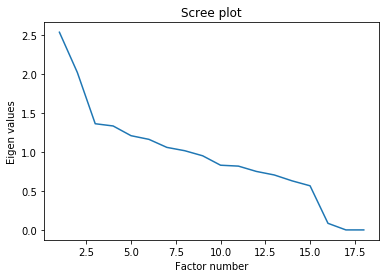

In [378]:
#scree plot
#R1+R2+R3+R4+R5+R6 +>0.5331282206 
plt.plot(numpy.arange(1,19),eigval)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()

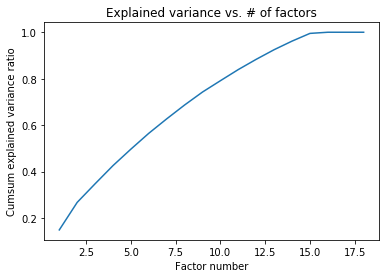

In [379]:
#cumul de variance expliquée
plt.plot(numpy.arange(1,18+1),numpy.cumsum(acp.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()
#

The "cassure" in the above graphics (Figure 2, Figure 3) are often mentioned (elbow rule) to identify the number of K * factors to remember. The solution (K *> = 16) which is almost all of the values

In [380]:
#seuils pour test des bâtons brisés
bs = 1/numpy.arange(18,0,-1)
bs = numpy.cumsum(bs)
bs = bs[::-1]


In [381]:
#test des bâtons brisés
import pandas
print(pandas.DataFrame({'Val.Propre':eigval,'Seuils':bs}))

      Val.Propre    Seuils
0   2.531552e+00  3.495108
1   2.017040e+00  2.495108
2   1.359935e+00  1.995108
3   1.331213e+00  1.661775
4   1.206673e+00  1.411775
5   1.159786e+00  1.211775
6   1.056994e+00  1.045108
7   1.014287e+00  0.902251
8   9.494127e-01  0.777251
9   8.286566e-01  0.666140
10  8.170025e-01  0.566140
11  7.490692e-01  0.475231
12  7.037424e-01  0.391897
13  6.280872e-01  0.314974
14  5.649776e-01  0.243546
15  8.448024e-02  0.176879
16  8.572451e-32  0.114379
17  5.333598e-32  0.055556


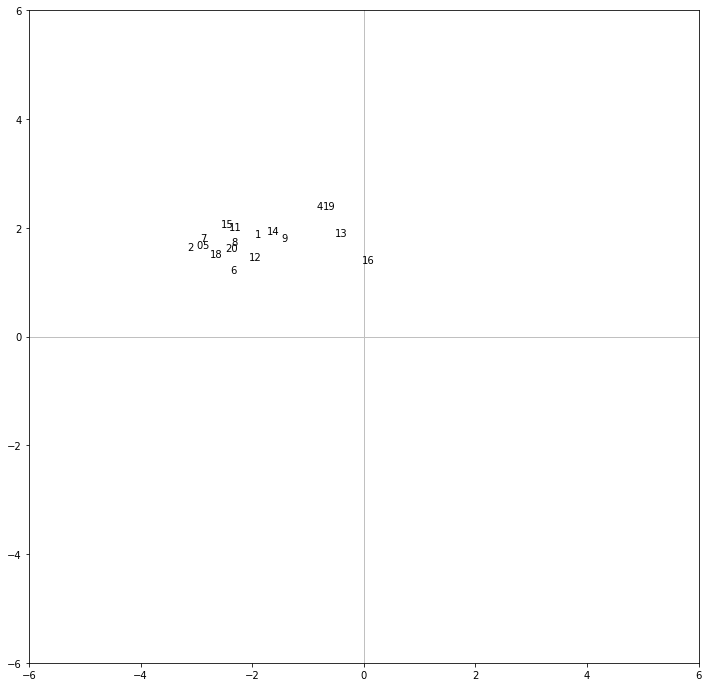

In [382]:
#positionnement des individus dans le premier plan
X= Bank_America_Final

fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-6,6) #même limites en abscisse
axes.set_ylim(-6,6) #et en ordonnée
#placement des étiquettes des observations
for i in range(n):
 plt.annotate(Bank_America_Final.index[i],(coord[i,0],coord[i,1]))
#ajouter les axes
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)
#affichage
plt.show()

In [383]:
#contribution des individus dans l'inertie totale
di = numpy.sum(Z**2,axis=1)
print(pandas.DataFrame({'ID':X.index,'d_i':di}))


        ID         d_i
0        0   14.008050
1        1   12.786111
2        2   14.760454
3        4   16.746221
4        5   13.801162
5        6   24.607231
6        7   14.588834
7        8   14.128818
8        9   64.609144
9       11   18.379991
10      12   12.341754
11      13   16.823390
12      14   10.436500
13      15   15.880095
14      16   44.405841
15      18   13.897309
16      19   17.138772
17      20   12.199392
18      21   19.763332
19      22   22.519952
20      23   43.315038
21      24   21.300001
22      25   18.558781
23      26   16.682033
24      27   14.250118
25      28   17.072540
26      29   43.056406
27      30   15.368006
28      31  220.882544
29      32   35.336306
...    ...         ...
5814  5930   49.549302
5815  5931   52.990587
5816  5932   31.234172
5817  5933   73.160498
5818  5934   73.447115
5819  5935   43.747678
5820  5936   42.360156
5821  5937   42.898245
5822  5938   43.559027
5823  5939   44.860288
5824  5940   45.259337
5825  5941 

In [ ]:
#qualité de représentation des individus - COS2
p=18
cos2 = coord**2
for j in range(18):
 cos2[:,j] = cos2[:,j]/di
print(pandas.DataFrame({'id':X.index,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1]}))

In [ ]:
#vérifions la théorie - somme en ligne des cos2 = 1
print(numpy.sum(cos2,axis=1))

In [ ]:
#contributions aux axes
ctr = coord**2
for j in range(p):
 ctr[:,j] = ctr[:,j]/(n*eigval[j])

print(pandas.DataFrame({'id':X.index,'CTR_1':ctr[:,0],'CTR_2':ctr[:,1]}))

In [ ]:
#vérifions la théorie
print(numpy.sum(ctr,axis=0))

In [ ]:
#le champ components_ de l'objet ACP
print(acp.components_)


In [ ]:
#racine carrée des valeurs propres
sqrt_eigval = numpy.sqrt(eigval)

In [ ]:
#corrélation des variables avec les axes
corvar = numpy.zeros((p,p))
for k in range(p):
 corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]

#afficher la matrice des corrélations variables x facteurs
print(corvar)

In [ ]:
#cercle des corrélations
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
#affichage des étiquettes (noms des variables)
for j in range(p):
 plt.annotate(X.columns[j],(corvar[j,0],corvar[j,1]))

#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)
#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)
#affichage
plt.show()


premier axe => present valeur de mortude and value 
tout les variable positive sauf other 
2eme Axe => HomeIMp 

In [ ]:
#cosinus carré des variables
cos2var = corvar**2
print(pandas.DataFrame({'id':X.columns,'COS2_1':cos2var[:,0],'COS2_2':cos2var[:,1]}))


In [ ]:
#contributions
#Contribution des variables aux axes (CTR). La contribution est également basée sur le
#carré de la corrélation, mais relativisée par l’importance de l’axe
ctrvar = cos2var
for k in range(p):
 ctrvar[:,k] = ctrvar[:,k]/eigval[k]
#on n'affiche que pour les deux premiers axes
print(pandas.DataFrame({'id':X.columns,'CTR_1':ctrvar[:,0],'CTR_2':ctrvar[:,1]}))

## LES Models

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [ ]:
from sklearn.model_selection import train_test_split


all_X = Bank_America_Final
all_y = cible_America

train_X, test_X, train_y, test_y = train_test_split(
   all_X, all_y, test_size=0.2,random_state=0)

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

lr = LogisticRegression()
scores = cross_val_score(lr, all_X, all_y, cv=10)
np.mean(scores)

In [ ]:
lr.fit(train_X, train_y)
predictions_lr = lr.predict(test_X)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score


f1 = f1_score(test_y, predictions_lr)
accuracy = accuracy_score(test_y, predictions_lr)
recall = recall_score(test_y, predictions_lr)
precision = precision_score(test_y, predictions_lr)
print([accuracy, recall, precision, f1])

In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(test_y, predictions_lr)
pd.DataFrame(conf_matrix, columns=['0', '1'], index=[['0', '1']])

## SVM

In [ ]:
from sklearn.svm import SVC, LinearSVC
svc = SVC(probability=True)
svc.fit(train_X, train_y)
predictions_svm = svc.predict(test_X)
acc_svc = accuracy_score(test_y, predictions_svm)
acc_svc

## knn

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
error = []
# Calculer l'erreur pour k entre 1 et 40 
#Pour chaque itération, l'erreur moyenne pour les valeurs prédites 
#de l'ensemble de test est calculée et sauvegardée ds la liste Erreur.
for i in range(1, 40):
    knn = KNeighborsClassifier(i)
    knn_model = knn.fit(train_X, train_y)
    pred_i = knn_model.predict(test_X)
    error.append(np.mean(pred_i != test_y))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Taux Erreur pour les differentes valeurs de k')
plt.xlabel('K ')
plt.ylabel('Erreur')

K optimal = 4

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(train_X, train_y)
predictions_knn = knn.predict(test_X)
acc_knn = accuracy_score(test_y, predictions_knn)
acc_knn

## Gaussian

In [ ]:
from sklearn.naive_bayes import GaussianNB

gaussian = GaussianNB()
gaussian.fit(train_X, train_y)
predictions = gaussian.predict(test_X)
acc_gaussian = accuracy_score(test_y, predictions)
acc_gaussian

## Perceptron 

In [ ]:
from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(train_X, train_y)
predictions = perceptron.predict(test_X)
acc_perceptron = accuracy_score(test_y, predictions)
acc_perceptron

## Gradient Descent

In [ ]:
# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(train_X, train_y)
predictions = sgd.predict(test_X)
acc_sgd = accuracy_score(test_y, predictions)
acc_sgd

## CART

In [ ]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(train_X, train_y)
predictions_dt = decision_tree.predict(test_X)
acc_decision_tree = accuracy_score(test_y, predictions_dt)
acc_decision_tree

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, VotingClassifier, ExtraTreesClassifier, GradientBoostingClassifier

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(train_X, train_y)
predictions_rf = random_forest.predict(test_X)
print(random_forest.score(train_X, train_y))
acc_random_forest = accuracy_score(test_y, predictions_rf)
acc_random_forest

In [ ]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','Support Vector Machines', 'KNN',
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent',
              'Decision Tree'],
    'Score': [accuracy,acc_svc, acc_knn, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
models.sort_values(by="Score",ascending=False)

In [ ]:
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
predictions_rf = pd.Series(predictions_rf, name="RF")
predictions_dt = pd.Series(predictions_dt, name="DT")
predictions_lr = pd.Series(predictions_lr, name="LR")
predictions_svm = pd.Series(predictions_svm, name="SVM")
predictions_knn = pd.Series(predictions_knn, name="KNN")

ensemble_results = pd.concat([predictions_rf, predictions_dt, predictions_lr, predictions_svm, predictions_knn  ],axis=1)


g= sns.heatmap(ensemble_results.corr(),annot=True)

on va utiliser le model de Random Forest

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)
X_train = lda.fit_transform(train_X, train_y)
X_test = lda.transform(test_X)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)

classifier.fit(X_train, train_y)
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(test_y, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(test_y, y_pred)))

lehna ma3ejbetni el LDA ELI sta3maltha bech na9es fel dimention 4a3fetli el model